# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [21]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [22]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'sample.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

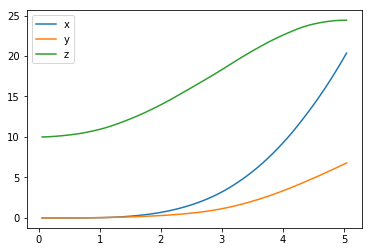

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

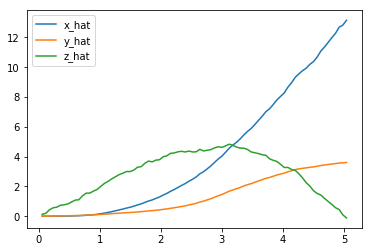

In [24]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

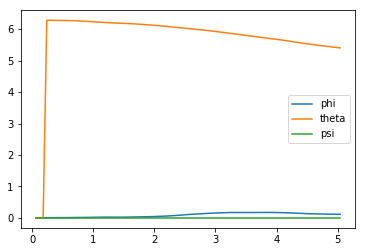

In [25]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

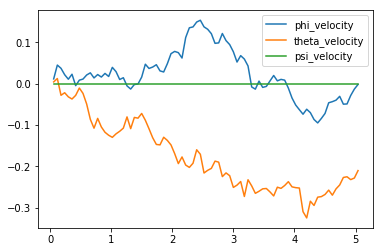

In [26]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

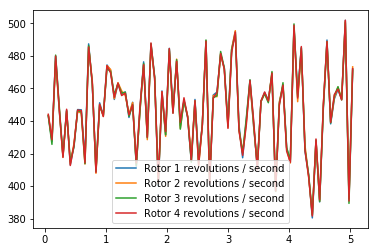

In [27]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [28]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[20.35383137  6.79051553 24.41815126  0.11493967  5.40349216  0.        ]
[13.15243831  3.60662464 -0.11737949]
[-0.00202241 -0.21026626  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [29]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action, state, w = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print(action)
            print(state.shape)
            print(w.shape)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[ 470.35385692  314.23079313 -402.14867473 -200.78676964]
(18,)
(18, 4)
Episode =    1, score =  -1.998 (best =  -1.998), noise_scale = 0.05[ 287.12198939  238.04626331 -235.87986309  -65.85736168]
(18,)
(18, 4)
Episode =    2, score =  -2.101 (best =  -1.998), noise_scale = 0.1[ 496.68529158  322.67978791 -414.30612247 -217.51639377]
(18,)
(18, 4)
Episode =    3, score =  -2.006 (best =  -1.998), noise_scale = 0.2[248.67467468 148.04467973 -89.80774319 -57.77412427]
(18,)
(18, 4)
Episode =    4, score =  -1.817 (best =  -1.817), noise_scale = 0.1[ -65.85156876  -59.64954068 -274.35039637   52.20366963]
(18,)
(18, 4)
Episode =    5, score =  -2.052 (best =  -1.817), noise_scale = 0.2[ 366.52657399  250.42544806 -257.03521491 -114.894549  ]
(18,)
(18, 4)
Episode =    6, score =  -2.456 (best =  -1.817), noise_scale = 0.4[ 623.51465082  361.14648984 -211.89804973 -232.35056636]
(18,)
(18, 4)
Episode =    7, score =  -1.883 (best =  -1.817), noise_scale = 0.8[ 488.07402533  339.10279676 -

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [30]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from landing import Landing

num_episodes = 1000
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
touching_surface = 4
threshold_velocity = 4
threshold_side_distance = 5

task = Landing(init_pose, init_velocities, init_angle_velocities, runtime, 
               touching_surface, threshold_velocity, threshold_side_distance)
agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 
          'rotor_speed4', 'x_accel', 'y_accel', 'z_accel', 'rewards']
results = {x : [] for x in labels}

episode_data = []
episode_results = []

# Run the simulation, and save the results.
data_file = open('data.txt', 'w')
results_file = open('results.txt', 'w')

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode_vars() # start a new episode
    rewards = 0
    results = {x : [] for x in labels}
    while True:        
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        
#         print(f'{task.sim.pose[2]} / {task.distance} = {task.sim.pose[2]/task.distance} | ({reward})')
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) + list(task.sim.linear_accel) + [reward]
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        agent.step(action, reward, next_state, done)
        state = next_state                 
        rewards+=reward
        if done:
            episode_data.append(results)
            episode_results.append(rewards)
            break
    sys.stdout.flush()

data_file.close()
results_file.close()

9.998966915025413 / 10.0 = 0.9998966915025413 | (-0.00034033383094933534)
9.962833193687311 / 10.0 = 0.9962833193687312 | (0.0025503193094260634)
9.896258056860459 / 10.0 = 0.9896258056860459 | (0.009228608552080964)
9.781852519381017 / 10.0 = 0.9781852519381017 | (0.021950854059529457)
9.69874103728241 / 10.0 = 0.969874103728241 | (0.03319187763941078)
9.585341671219195 / 10.0 = 0.9585341671219195 | (0.045056936487676724)
9.364938919284342 / 10.0 = 0.9364938919284341 | (0.0674671362724607)
9.06100403899369 / 10.0 = 0.9061004038993691 | (0.10288272456351633)
8.757604016595245 / 10.0 = 0.8757604016595245 | (0.14214635185011437)
8.438217949378958 / 10.0 = 0.8438217949378958 | (0.18238462174733105)
8.033726101289085 / 10.0 = 0.8033726101289085 | (0.23224505416180408)
7.542090708507889 / 10.0 = 0.7542090708507889 | (0.29637714689833694)
7.007029455943098 / 10.0 = 0.7007029455943098 | (0.3713916699277058)
6.444314124344435 / 10.0 = 0.6444314124344435 | (0.45425908178737573)
5.83953547946546

0.7863809788809792 / 10.0 = 0.07863809788809792 | (-21.868198315862493)
0.0 / 10.0 = 0.0 | (96.20314425973558)
10.023908756104193 / 10.0 = 1.0023908756104194 | (-0.0015021693948473747)
10.072639916012397 / 10.0 = 1.0072639916012398 | (-0.006941921133832407)
10.062917582706728 / 10.0 = 1.0062917582706727 | (-0.008633398156755234)
10.008238056398076 / 10.0 = 1.0008238056398076 | (-0.0032913095322748553)
9.905951408165107 / 10.0 = 0.9905951408165107 | (0.006365052728431242)
9.713330168626989 / 10.0 = 0.9713330168626989 | (0.02636472522796196)
9.451847882091826 / 10.0 = 0.9451847882091826 | (0.055190446443591945)
9.108315927923108 / 10.0 = 0.9108315927923109 | (0.09513413473544419)
8.692510792790662 / 10.0 = 0.8692510792790662 | (0.14458823269948684)
8.200483017228205 / 10.0 = 0.8200483017228205 | (0.20640711426252156)
7.628697408422693 / 10.0 = 0.7628697408422693 | (0.28029793834641836)
6.995924269530881 / 10.0 = 0.6995924269530881 | (0.3680393708827868)
6.2844471570707 / 10.0 = 0.6284447

10.291099665382767 / 10.0 = 1.0291099665382766 | (-0.03193204523693871)
10.256052338726287 / 10.0 = 1.0256052338726287 | (-0.03308082547605884)
10.172748401002174 / 10.0 = 1.0172748401002174 | (-0.023504378875228937)
10.154363033690997 / 10.0 = 1.0154363033690996 | (-0.018822651090902198)
10.080922901546662 / 10.0 = 1.0080922901546663 | (-0.013847539967302813)
9.877658850042174 / 10.0 = 0.9877658850042174 | (0.005876276732805108)
9.686695807291246 / 10.0 = 0.9686695807291246 | (0.030930466615515906)
9.538765091493074 / 10.0 = 0.9538765091493074 | (0.04978977247148708)
9.283245698463242 / 10.0 = 0.9283245698463242 | (0.07588019609658503)
8.935423146405327 / 10.0 = 0.8935423146405327 | (0.117232128039503)
8.639533816565292 / 10.0 = 0.8639533816565292 | (0.15829128582054308)
8.336891670904052 / 10.0 = 0.8336891670904052 | (0.1961365022366397)
7.902914221515387 / 10.0 = 0.7902914221515387 | (0.2484708366678876)
7.431359609641397 / 10.0 = 0.7431359609641397 | (0.3141279967911339)
7.01757207

10.10358400601547 / 10.0 = 1.0103584006015471 | (-0.012608283532798081)
10.115523794209095 / 10.0 = 1.0115523794209094 | (-0.01300274533274215)
10.092592561481162 / 10.0 = 1.0092592561481162 | (-0.013010509952911864)
9.958243764691298 / 10.0 = 0.9958243764691298 | (-0.0010227761956332904)
9.779604402398608 / 10.0 = 0.9779604402398607 | (0.019069584417651164)
9.551246460225517 / 10.0 = 0.9551246460225518 | (0.04484077306150547)
9.29723391297934 / 10.0 = 0.929723391297934 | (0.07516969951360453)
8.997144919554458 / 10.0 = 0.8997144919554458 | (0.11115576175630171)
8.67691133683153 / 10.0 = 0.867691133683153 | (0.1514625846719051)
8.30632070476406 / 10.0 = 0.830632070476406 | (0.1977522202454044)
7.861342709613828 / 10.0 = 0.7861342709613828 | (0.25397373696882974)
7.3560530128805395 / 10.0 = 0.7356053012880539 | (-99.67777974687682)
10.041622418965844 / 10.0 = 1.0041622418965843 | (-0.002680502069642099)
10.13472190900333 / 10.0 = 1.013472190900333 | (-0.01239116685670516)
10.21381122490

10.041928645749246 / 10.0 = 1.0041928645749247 | (-0.0026947875369034424)
10.136142569815114 / 10.0 = 1.0136142569815114 | (-0.012527514242276716)
10.216203965149049 / 10.0 = 1.0216203965149049 | (-0.02240388394750159)
10.232275216937504 / 10.0 = 1.0232275216937503 | (-0.02806999541794042)
10.172579387585426 / 10.0 = 1.0172579387585425 | (-0.02320254091976115)
10.115453312880472 / 10.0 = 1.0115453312880471 | (-0.016008255088783674)
10.039053607310436 / 10.0 = 1.0039053607310435 | (-0.00785705239168144)
9.997930561261759 / 10.0 = 0.9997930561261759 | (-0.0008244012099114517)
9.94996905099447 / 10.0 = 0.994996905099447 | (0.00324525956129873)
9.77803300975628 / 10.0 = 0.977803300975628 | (0.01886605302236044)
9.5532408250051 / 10.0 = 0.9553240825005099 | (0.04499348515722168)
9.283771102012292 / 10.0 = 0.9283771102012291 | (0.07604369122711285)
9.00116075671482 / 10.0 = 0.9001160756714819 | (0.11193120865128792)
8.711276155972373 / 10.0 = 0.8711276155972373 | (0.14823137301277656)
8.4312

9.048154588312864 / 10.0 = 0.9048154588312863 | (0.10661993015633953)
8.763198710670443 / 10.0 = 0.8763198710670442 | (0.14147528235002904)
8.396917996734073 / 10.0 = 0.8396917996734073 | (0.18569904998692988)
7.977781903581431 / 10.0 = 0.7977781903581431 | (0.23944169899727408)
7.48052181261772 / 10.0 = 0.748052181261772 | (0.304901840482255)
6.921779201481995 / 10.0 = 0.6921779201481996 | (0.3820574225077278)
6.279850668932565 / 10.0 = 0.6279850668932565 | (0.4752465037215228)
5.5887080614482905 / 10.0 = 0.5588708061448291 | (0.5841696579517843)
4.859638990676557 / 10.0 = 0.4859638990676557 | (0.7076257055010708)
4.096527018228504 / 10.0 = 0.4096527018228504 | (0.8494334408134318)
3.287548509194174 / 10.0 = 0.3287548509194174 | (-9.272632584968632)
2.4772548197328432 / 10.0 = 0.2477254819732843 | (-6.200591317394336)
1.6293097779244399 / 10.0 = 0.16293097779244398 | (-24.941756578323986)
0.7441532056529047 / 10.0 = 0.07441532056529046 | (-2.7941989087434793)
0.0 / 10.0 = 0.0 | (119.3

8.083886645697396 / 10.0 = 0.8083886645697396 | (0.22977508707694427)
7.7642867428742015 / 10.0 = 0.7764286742874201 | (0.2739714995538418)
7.433557723859888 / 10.0 = 0.7433557723859888 | (0.3195348356219089)
7.069114899481237 / 10.0 = 0.7069114899481237 | (0.3708217174329025)
6.719030192753606 / 10.0 = 0.6719030192753606 | (0.42342582955625774)
6.307237347025382 / 10.0 = 0.6307237347025383 | (0.48243486890913356)
5.797117090368078 / 10.0 = 0.5797117090368078 | (-99.44110221476255)
9.999885230463102 / 10.0 = 0.9999885230463101 | (-0.000386585131102013)
9.97790582344121 / 10.0 = 0.997790582344121 | (0.0016411065376165102)
9.928011671202423 / 10.0 = 0.9928011671202424 | (0.006356523957968263)
9.853084828336273 / 10.0 = 0.9853084828336274 | (0.014268968165769502)
9.727007254642965 / 10.0 = 0.9727007254642965 | (0.02750303774053331)
9.617902875065171 / 10.0 = 0.9617902875065172 | (0.04246651563088888)
9.491137640775106 / 10.0 = 0.9491137640775106 | (0.05588792899328621)
9.270225424751422 /

1.8333665997057518 / 10.0 = 0.1833366599705752 | (-25.10682295820398)
1.0725532546517558 / 10.0 = 0.10725532546517558 | (-8.846981425308345)
0.2810191416762457 / 10.0 = 0.02810191416762457 | (-28.447666356291364)
0.0 / 10.0 = 0.0 | (94.83142977253168)
10.0206374813584 / 10.0 = 1.0020637481358399 | (-0.0013573597670681892)
10.047069588775688 / 10.0 = 1.0047069588775688 | (-0.0047444437247927684)
10.068300459967846 / 10.0 = 1.0068300459967845 | (-0.00734557568605454)
10.078125342411276 / 10.0 = 1.0078125342411277 | (-0.009170602464432243)
10.069508281252967 / 10.0 = 1.0069508281252966 | (-0.008789856246053773)
10.038932643867154 / 10.0 = 1.0038932643867153 | (-0.006199471425629266)
9.945203910264102 / 10.0 = 0.9945203910264102 | (0.0023632289678896523)
9.80431007743102 / 10.0 = 0.9804310077431021 | (0.017628884808025935)
9.62235609376534 / 10.0 = 0.9622356093765341 | (0.038388024324427894)
9.430596033210048 / 10.0 = 0.9430596033210048 | (0.061247749665968576)
9.209127930403202 / 10.0 = 0

5.247726038534536 / 10.0 = 0.5247726038534536 | (0.6538456466977266)
4.790927768844767 / 10.0 = 0.4790927768844767 | (0.7376842905813134)
4.344425746957939 / 10.0 = 0.43444257469579395 | (0.8213152205953638)
3.8253866390014273 / 10.0 = 0.38253866390014274 | (-17.804724099883426)
3.256616764218292 / 10.0 = 0.3256616764218292 | (-27.420902321397854)
2.7049780465381694 / 10.0 = 0.27049780465381695 | (-45.28494584115792)
2.105624427281049 / 10.0 = 0.2105624427281049 | (-22.570251001449076)
1.4895482441222725 / 10.0 = 0.14895482441222724 | (-1.0238030318061444)
0.843536789262279 / 10.0 = 0.0843536789262279 | (-24.209012397524262)
0.14158452150709316 / 10.0 = 0.014158452150709317 | (-20.70821196494815)
0.0 / 10.0 = 0.0 | (117.32870523218115)
10.027246987393685 / 10.0 = 1.0027246987393685 | (-0.0018932717607167415)
10.015094703494432 / 10.0 = 1.0015094703494432 | (-0.002981730457964016)
9.966525169368062 / 10.0 = 0.9966525169368061 | (0.0019145556841827505)
9.887995904225331 / 10.0 = 0.988799

7.154572858938132 / 10.0 = 0.7154572858938132 | (0.3577838357126163)
6.769383933457184 / 10.0 = 0.6769383933457184 | (0.41383538358529715)
6.351702374612014 / 10.0 = 0.6351702374612014 | (0.4757056912219749)
5.882758638839413 / 10.0 = 0.5882758638839414 | (0.5479197307470547)
5.363537774354436 / 10.0 = 0.5363537774354435 | (0.6312905256297591)
4.818451067751215 / 10.0 = 0.4818451067751215 | (0.7262555013460221)
4.215648483737942 / 10.0 = 0.4215648483737942 | (0.835816035895558)
3.5702912200601653 / 10.0 = 0.35702912200601655 | (-22.278857334208293)
2.9035119654996477 / 10.0 = 0.2903511965499648 | (-5.206079887205149)
2.2202567476456476 / 10.0 = 0.22202567476456475 | (0.29630094690204967)
1.5253566743998588 / 10.0 = 0.15253566743998587 | (-0.09872630742631028)
0.7882765254648135 / 10.0 = 0.07882765254648136 | (-37.312984808614985)
0.0 / 10.0 = 0.0 | (91.24440029060953)
10.020688735527635 / 10.0 = 1.0020688735527634 | (-0.0013699337421415603)
10.053120840387978 / 10.0 = 1.005312084038797

4.531296092234566 / 10.0 = 0.4531296092234566 | (0.774047728636075)
3.8647118442503987 / 10.0 = 0.38647118442503986 | (-3.4117687091220623)
3.1603338552922606 / 10.0 = 0.31603338552922605 | (-32.93618716088199)
2.400704886469395 / 10.0 = 0.2400704886469395 | (-27.980847722560014)
1.6132984459428201 / 10.0 = 0.161329844594282 | (5.179300822672801)
0.8122598322056507 / 10.0 = 0.08122598322056507 | (-4.185569458894987)
0.0 / 10.0 = 0.0 | (78.86794613509015)
10.019586507775555 / 10.0 = 1.0019586507775555 | (-0.0013132571216376565)
10.053620425894648 / 10.0 = 1.0053620425894647 | (-0.004960357994101772)
10.088542921674268 / 10.0 = 1.0088542921674268 | (-0.009322178259832059)
10.093586870684168 / 10.0 = 1.0093586870684168 | (-0.011361995450836826)
10.051973809087897 / 10.0 = 1.0051973809087897 | (-0.00815001526265613)
9.980122371391332 / 10.0 = 0.9980122371391331 | (-0.0007366088575013752)
9.886416014479659 / 10.0 = 0.9886416014479659 | (0.009576373585431175)
9.766157837824045 / 10.0 = 0.976

2.8796985424103267 / 10.0 = 0.28796985424103266 | (-13.235076780350207)
2.1936156280966177 / 10.0 = 0.21936156280966176 | (-23.624716438006068)
1.4740512572557054 / 10.0 = 0.14740512572557055 | (-12.870378075448569)
0.7194824039175279 / 10.0 = 0.0719482403917528 | (-26.624829934633674)
0.0 / 10.0 = 0.0 | (81.04718967414155)
10.018828319139683 / 10.0 = 1.0018828319139683 | (-0.001278553029685936)
10.053143797144683 / 10.0 = 1.0053143797144684 | (-0.004783962579104184)
10.09425279326204 / 10.0 = 1.009425279326204 | (-0.009530840708029231)
10.143038305848336 / 10.0 = 1.0143038305848335 | (-0.015232991668989282)
10.205810596214892 / 10.0 = 1.0205810596214893 | (-0.021929504305514103)
10.263364239626366 / 10.0 = 1.0263364239626367 | (-0.0289866889266146)
10.340267512338578 / 10.0 = 1.0340267512338577 | (-0.037467687042476605)
10.407690180011917 / 10.0 = 1.0407690180011917 | (-0.045611332604229116)
10.4540140137969 / 10.0 = 1.04540140137969 | (-0.05226750236053701)
10.48053964965071 / 10.0 =

9.482323599560573 / 10.0 = 0.9482323599560573 | (0.056399024053235935)
9.291283223537869 / 10.0 = 0.929128322353787 | (0.07859506935886562)
9.06309286397858 / 10.0 = 0.906309286397858 | (0.10594607559878388)
8.812936925581448 / 10.0 = 0.8812936925581448 | (0.13694555342590764)
8.55159623959696 / 10.0 = 0.8551596239596959 | (0.1704016110177652)
8.267060397282373 / 10.0 = 0.8267060397282373 | (0.20706270219465606)
7.974239468214049 / 10.0 = 0.7974239468214048 | (0.24620679347945817)
7.638831786206814 / 10.0 = 0.7638831786206814 | (0.29010781495196514)
7.250044515591321 / 10.0 = 0.7250044515591321 | (0.34300543463077304)
6.82490619710564 / 10.0 = 0.682490619710564 | (0.40348772062679095)
6.35772036998615 / 10.0 = 0.635772036998615 | (0.47246866338625493)
5.872285855600968 / 10.0 = 0.5872285855600967 | (0.548939840079168)
5.366878775801059 / 10.0 = 0.5366878775801058 | (0.6316548622299292)
4.803596127457843 / 10.0 = 0.4803596127457843 | (0.7273605041324377)
4.193257697774391 / 10.0 = 0.419

10.086642461019919 / 10.0 = 1.008664246101992 | (-0.013671741036041851)
9.951605886631999 / 10.0 = 0.9951605886631999 | (-0.00043396114932658936)
9.74404587387987 / 10.0 = 0.974404587387987 | (0.022216372490774017)
9.469811067404285 / 10.0 = 0.9469811067404285 | (0.05250318525775555)
9.13076791797682 / 10.0 = 0.9130767917976821 | (0.09253414196994736)
8.717857657099549 / 10.0 = 0.8717857657099548 | (0.14159663041787662)
8.251334523779018 / 10.0 = 0.8251334523779018 | (0.2007859837943946)
7.709779607386728 / 10.0 = 0.7709779607386728 | (0.27066086201594375)
7.111459401000113 / 10.0 = 0.7111459401000113 | (0.35269633239900866)
6.441036849703837 / 10.0 = 0.6441036849703836 | (0.4491919505506905)
5.724860090790342 / 10.0 = 0.5724860090790342 | (0.5598086049018887)
4.943945009524521 / 10.0 = 0.4943945009524521 | (0.6896739413514169)
4.11837311589307 / 10.0 = 0.41183731158930703 | (0.8412539331815898)
3.2931870571526507 / 10.0 = 0.32931870571526506 | (-11.834146927772503)
2.44480842080657 / 

8.503855394525687 / 10.0 = 0.8503855394525687 | (0.16954329981697425)
8.041281570788865 / 10.0 = 0.8041281570788865 | (0.22924583433011758)
7.507308479620938 / 10.0 = 0.7507308479620938 | (0.2991456778486361)
6.933560025654679 / 10.0 = 0.6933560025654679 | (0.38004995320389356)
6.296160219144905 / 10.0 = 0.6296160219144905 | (0.47325993944507017)
5.624267162466124 / 10.0 = 0.5624267162466123 | (0.5795221698713394)
4.886704058240718 / 10.0 = 0.4886704058240718 | (0.7016900622031318)
4.104417585320437 / 10.0 = 0.41044175853204373 | (0.8469213049403754)
3.2655293506770806 / 10.0 = 0.32655293506770805 | (-40.102000722369006)
2.3632900321339916 / 10.0 = 0.23632900321339917 | (-41.38202207235446)
1.3963367397001571 / 10.0 = 0.13963367397001572 | (-35.059124355893374)
0.4249872372173513 / 10.0 = 0.04249872372173513 | (12.255845815729607)
0.0 / 10.0 = 0.0 | (73.54456165695251)
10.040795928549914 / 10.0 = 1.0040795928549913 | (-0.0026484820112095964)
10.129913183722575 / 10.0 = 1.01299131837225

10.040707147971743 / 10.0 = 1.0040707147971744 | (-0.0026439985558472934)
10.103089918217085 / 10.0 = 1.0103089918217085 | (-0.010129193548760629)
10.134945910611078 / 10.0 = 1.0134945910611077 | (-0.015333662226023392)
10.163127838609 / 10.0 = 1.0163127838609 | (-0.018764503805916544)
10.096374565457015 / 10.0 = 1.0096374565457016 | (-0.014936623631073731)
9.972818797142445 / 10.0 = 0.9972818797142444 | (-0.00210937037366854)
9.821225172069877 / 10.0 = 0.9821225172069876 | (0.015073033780982792)
9.631180368087039 / 10.0 = 0.9631180368087039 | (0.036802445879751455)
9.435927087131095 / 10.0 = 0.9435927087131095 | (0.06054577169357145)
9.192184052160345 / 10.0 = 0.9192184052160345 | (0.08831253224306346)
8.882587620964253 / 10.0 = 0.8882587620964253 | (0.1253917998389137)
8.529046080631367 / 10.0 = 0.8529046080631367 | (0.169293477154845)
8.163355590948408 / 10.0 = 0.8163355590948408 | (0.21750590796122415)
7.801597948047703 / 10.0 = 0.7801597948047703 | (0.2666707557695448)
7.426145488

4.223396728084455 / 10.0 = 0.42233967280844553 | (0.8311808741959273)
3.5624858819411407 / 10.0 = 0.3562485881941141 | (-5.478843173982373)
2.877675845739864 / 10.0 = 0.2877675845739864 | (-29.81423259548835)
2.1628877899707475 / 10.0 = 0.21628877899707474 | (-0.5501813391053458)
1.4285541387321081 / 10.0 = 0.14285541387321082 | (-18.5651265632399)
0.6567609306314501 / 10.0 = 0.06567609306314501 | (-9.444947208875027)
0.0 / 10.0 = 0.0 | (110.69604882758554)
10.039842740463893 / 10.0 = 1.0039842740463893 | (-0.0025852413388411932)
10.1137546142755 / 10.0 = 1.01137546142755 | (-0.010597730093393265)
10.15277422166142 / 10.0 = 1.015277422166142 | (-0.01736946179410981)
10.163263024311265 / 10.0 = 1.0163263024311264 | (-0.0189415878540109)
10.163111326245346 / 10.0 = 1.0163111326245347 | (-0.020100695541514835)
10.13605960833965 / 10.0 = 1.013605960833965 | (-0.01720652595618133)
10.093414872385015 / 10.0 = 1.0093414872385016 | (-0.013116575771705108)
10.042565942360788 / 10.0 = 1.00425659

8.900414935367541 / 10.0 = 0.8900414935367541 | (0.12339829895997612)
8.57951273072763 / 10.0 = 0.8579512730727631 | (0.16406384117678352)
8.170664809194864 / 10.0 = 0.8170664809194864 | (0.21382139776632048)
7.674841223691132 / 10.0 = 0.7674841223691132 | (0.27698693034248956)
7.067650380055705 / 10.0 = 0.7067650380055704 | (0.358769166741407)
6.424020799856207 / 10.0 = 0.6424020799856207 | (0.4530562055092543)
5.719700982380292 / 10.0 = 0.5719700982380292 | (0.5617539195018676)
5.016739010805242 / 10.0 = 0.5016739010805242 | (0.6818195941707236)
4.293715438785706 / 10.0 = 0.4293715438785706 | (0.8136808547794868)
3.5369349684265163 / 10.0 = 0.3536934968426516 | (-19.364412334694272)
2.734099097187593 / 10.0 = 0.27340990971875934 | (-27.663275498318114)
1.8775936038969514 / 10.0 = 0.18775936038969515 | (-25.639653478675445)
0.9871892518411706 / 10.0 = 0.09871892518411705 | (-115.21224740720436)
10.04070303201598 / 10.0 = 1.004070303201598 | (-0.0026396658262255457)
10.11813912664509 /

9.676857740839074 / 10.0 = 0.9676857740839073 | (0.03300263057040931)
9.482529049828099 / 10.0 = 0.9482529049828099 | (0.05492402258383622)
9.235782523185565 / 10.0 = 0.9235782523185565 | (0.08280467745862297)
8.966582230900842 / 10.0 = 0.8966582230900842 | (0.11716532860130979)
8.748247980703676 / 10.0 = 0.8748247980703676 | (0.14693654321201977)
8.491144473886497 / 10.0 = 0.8491144473886496 | (0.1780942911842126)
8.192573085355988 / 10.0 = 0.8192573085355989 | (0.21624578131024075)
7.839651175635401 / 10.0 = 0.7839651175635401 | (0.26141193723494505)
7.4502975283628325 / 10.0 = 0.7450297528362833 | (0.3143701469708996)
7.02994084646231 / 10.0 = 0.702994084646231 | (0.37403423622921006)
6.608988989511065 / 10.0 = 0.6608988989511065 | (0.43639387780225614)
6.1969924292611696 / 10.0 = 0.619699242926117 | (0.5011082349308399)
5.777081329073444 / 10.0 = 0.5777081329073444 | (0.5680854598086605)
5.373700121677312 / 10.0 = 0.5373700121677312 | (0.6368076082352617)
4.965315882171532 / 10.0 =

7.787623213201669 / 10.0 = 0.7787623213201669 | (0.2637888354472734)
7.254168688282371 / 10.0 = 0.7254168688282371 | (0.3354449476574053)
6.6519176604762755 / 10.0 = 0.6651917660476275 | (-99.58001409882536)
10.040072967927545 / 10.0 = 1.0040072967927545 | (-0.0026043653348051254)
10.113666351194924 / 10.0 = 1.0113666351194923 | (-0.010592033749631913)
10.151866433457553 / 10.0 = 1.0151866433457553 | (-0.01730184482178254)
10.156317460736556 / 10.0 = 1.0156317460736557 | (-0.018427142193382595)
10.126524964728244 / 10.0 = 1.0126524964728243 | (-0.017113172100569507)
10.054147995052325 / 10.0 = 1.0054147995052325 | (-0.0095140286647446)
9.928407032626454 / 10.0 = 0.9928407032626454 | (0.0029879708603994803)
9.73035443740539 / 10.0 = 0.9730354437405391 | (0.02349091559288674)
9.42389633714468 / 10.0 = 0.9423896337144679 | (0.05723839304988443)
9.069613004126431 / 10.0 = 0.9069613004126431 | (0.09932687818579367)
8.658776649203102 / 10.0 = 0.8658776649203102 | (0.15011842059196978)
8.2987

10.040641987416532 / 10.0 = 1.0040641987416532 | (-0.002638165506561929)
10.117859345084927 / 10.0 = 1.0117859345084927 | (-0.010901702157918525)
10.169299067625412 / 10.0 = 1.0169299067625412 | (-0.01840276180429279)
10.190369181139374 / 10.0 = 1.0190369181139374 | (-0.022324656292904255)
10.116362900849914 / 10.0 = 1.0116362900849913 | (-0.01775918619041117)
10.002783408989723 / 10.0 = 1.0002783408989724 | (-0.0048721615491336134)
9.849356543207083 / 10.0 = 0.9849356543207083 | (0.011549730236037337)
9.672552709401275 / 10.0 = 0.9672552709401275 | (0.032667493563790395)
9.485544839030206 / 10.0 = 0.9485544839030207 | (0.054729937718418276)
9.291810301862906 / 10.0 = 0.9291810301862906 | (0.07868073975184953)
9.066431986749015 / 10.0 = 0.9066431986749015 | (0.10566075254404883)
8.836082757488217 / 10.0 = 0.8836082757488217 | (0.13472063229762277)
8.575673557873467 / 10.0 = 0.8575673557873467 | (0.16745111561524573)
8.303537258017538 / 10.0 = 0.8303537258017538 | (0.2024523042332489)
7

8.09127315610369 / 10.0 = 0.8091273156103689 | (0.2261498814283749)
7.679958562582232 / 10.0 = 0.7679958562582232 | (0.28136773680087834)
7.2249307130500195 / 10.0 = 0.722493071305002 | (0.34289740086302734)
6.661611458528708 / 10.0 = 0.6661611458528708 | (0.4205416393509468)
6.086907508267077 / 10.0 = 0.6086907508267078 | (0.5105585853621675)
5.558537664683172 / 10.0 = 0.5558537664683172 | (0.5984092265225257)
4.951736411626283 / 10.0 = 0.4951736411626283 | (0.6972801508865754)
4.251320213314058 / 10.0 = 0.42513202133140576 | (0.8230750075255965)
3.521612812528233 / 10.0 = 0.3521612812528233 | (-34.13436625398379)
2.747687526990106 / 10.0 = 0.27476875269901063 | (-3.7680470724095807)
1.939518884200186 / 10.0 = 0.1939518884200186 | (-33.56952670442513)
1.0903939054418716 / 10.0 = 0.10903939054418717 | (-3.0166959803798976)
0.23708830732992145 / 10.0 = 0.023708830732992146 | (-0.7709578159707271)
0.0 / 10.0 = 0.0 | (108.93068411393575)
10.041036877355154 / 10.0 = 1.0041036877355154 | (-

0.8960772326942671 / 10.0 = 0.0896077232694267 | (-23.116800109111246)
0.13200579983135102 / 10.0 = 0.013200579983135102 | (-32.316784586064344)
0.0 / 10.0 = 0.0 | (-10.010393321097467)
10.03981046187812 / 10.0 = 1.003981046187812 | (-0.002581615173163021)
10.114086784986549 / 10.0 = 1.011408678498655 | (-0.010622070734826128)
10.153950876602586 / 10.0 = 1.0153950876602587 | (-0.017463877448956167)
10.166631724167763 / 10.0 = 1.0166631724167763 | (-0.01922790023197507)
10.173820461498797 / 10.0 = 1.0173820461498797 | (-0.02103494495064484)
10.15843778596265 / 10.0 = 1.015843778596265 | (-0.019373029963719146)
10.129657319501675 / 10.0 = 1.0129657319501675 | (-0.016885904512410344)
10.093497337671044 / 10.0 = 1.0093497337671045 | (-0.012533503933988221)
10.002357611360722 / 10.0 = 1.0002357611360722 | (-0.00442246882639874)
9.842148805256949 / 10.0 = 0.984214880525695 | (0.011549360504357176)
9.599671110779225 / 10.0 = 0.9599671110779224 | (0.038623417507046454)
9.374035967850741 / 10.0

10.041031853583108 / 10.0 = 1.004103185358311 | (-0.0026591073189177195)
10.132839164786008 / 10.0 = 1.0132839164786007 | (-0.011930223885604718)
10.197115232910587 / 10.0 = 1.0197115232910587 | (-0.021413465545848)
10.239626764689202 / 10.0 = 1.0239626764689203 | (-0.027040822541289478)
10.26187911550629 / 10.0 = 1.026187911550629 | (-0.030272036546380665)
10.296972559752067 / 10.0 = 1.0296972559752067 | (-0.03347647101548379)
10.354469022135198 / 10.0 = 1.0354469022135198 | (-0.04018625056707292)
10.352842317830778 / 10.0 = 1.0352842317830777 | (-0.042988854863010184)
10.249407391431848 / 10.0 = 1.0249407391431848 | (-0.03425110148768895)
10.053080377428081 / 10.0 = 1.005308037742808 | (-0.015386725175384308)
9.762545648493177 / 10.0 = 0.9762545648493177 | (0.016790332351130588)
9.48289252371488 / 10.0 = 0.9482892523714879 | (0.0515866908474385)
9.185686626185234 / 10.0 = 0.9185686626185234 | (0.08764883059672546)
8.911103765414646 / 10.0 = 0.8911103765414646 | (0.12383935516280598)


1.2686287312567368 / 10.0 = 0.12686287312567368 | (-17.643914693208398)
0.4034830161883107 / 10.0 = 0.040348301618831066 | (-47.2964616412345)
0.0 / 10.0 = 0.0 | (74.22957364932522)
10.041035537344252 / 10.0 = 1.0041035537344252 | (-0.0026591937523390285)
10.132590425571117 / 10.0 = 1.0132590425571117 | (-0.011915545746777667)
10.196618399324086 / 10.0 = 1.0196618399324087 | (-0.021360084200643392)
10.241727209603013 / 10.0 = 1.0241727209603013 | (-0.027144955593043196)
10.260695149249642 / 10.0 = 1.0260695149249641 | (-0.03034879750397601)
10.28813771555657 / 10.0 = 1.028813771555657 | (-0.03276011084290875)
10.351690339442309 / 10.0 = 1.0351690339442308 | (-0.03931894326075058)
10.371929287313693 / 10.0 = 1.0371929287313693 | (-0.04366591194376257)
10.403029653389439 / 10.0 = 1.040302965338944 | (-0.04665157391230279)
10.462482269887488 / 10.0 = 1.0462482269887488 | (-0.05176879060135997)
10.544135741114648 / 10.0 = 1.0544135741114649 | (-0.06132410386553633)
10.596301549427354 / 10.

9.949665931557822 / 10.0 = 0.9949665931557823 | (-0.0019272658748239468)
9.73666675849113 / 10.0 = 0.973666675849113 | (0.02293063821779806)
9.458157525755304 / 10.0 = 0.9458157525755304 | (0.054156580307406776)
9.125315672761406 / 10.0 = 0.9125315672761406 | (0.09309658394010989)
8.717571094766988 / 10.0 = 0.8717571094766988 | (0.14226043869477556)
8.24391042558797 / 10.0 = 0.824391042558797 | (0.2009779102940985)
7.706298350190107 / 10.0 = 0.7706298350190106 | (0.2717241040100331)
7.105415580077629 / 10.0 = 0.710541558007763 | (0.3532618344814469)
6.441665983612846 / 10.0 = 0.6441665983612845 | (0.44934864307939737)
5.700870245960905 / 10.0 = 0.5700870245960905 | (0.5624580966424148)
4.9165382722972 / 10.0 = 0.49165382722972 | (0.6941985876462875)
4.063572188160338 / 10.0 = 0.40635721881603376 | (0.8497997542229263)
3.1460512150650595 / 10.0 = 0.31460512150650594 | (-156.43966051613074)
10.04101321257479 / 10.0 = 1.004101321257479 | (-0.002658237482651149)
10.13279163717117 / 10.0 = 

10.77657745493388 / 10.0 = 1.077657745493388 | (-0.08643389472350127)
10.8894769713316 / 10.0 = 1.08894769713316 | (-0.09978853497786688)
11.02275989180352 / 10.0 = 1.102275989180352 | (-0.11398803115306633)
11.151241784618424 / 10.0 = 1.1151241784618424 | (-0.12873740554615987)
11.300821889979373 / 10.0 = 1.1300821889979373 | (-0.144855488077257)
11.44694308283845 / 10.0 = 1.144694308283845 | (-0.16099756840829893)
11.609788318017083 / 10.0 = 1.1609788318017082 | (-0.17874498007067596)
11.776089654773534 / 10.0 = 1.1776089654773534 | (-0.19638982932089233)
11.95109017617723 / 10.0 = 1.195109017617723 | (-0.21557147537854204)
12.137126932561877 / 10.0 = 1.2137126932561877 | (-0.2347348537251841)
12.324382676891334 / 10.0 = 1.2324382676891334 | (-0.2550599694221267)
12.52999478060207 / 10.0 = 1.252999478060207 | (-0.27585106371047474)
12.730684611231187 / 10.0 = 1.2730684611231187 | (-0.2971925461888272)
12.952240106240827 / 10.0 = 1.2952240106240827 | (-0.319404079054203)
13.1696373124

12.885886924082646 / 10.0 = 1.2885886924082646 | (-0.31268020540172303)
13.100723520879253 / 10.0 = 1.3100723520879254 | (-0.3347449823638198)
13.333065160835732 / 10.0 = 1.333306516083573 | (-0.35811510098128974)
13.565654250977365 / 10.0 = 1.3565654250977366 | (-0.38117028696844235)
13.809149613765026 / 10.0 = 1.3809149613765026 | (-0.4055143885880854)
14.061908698449727 / 10.0 = 1.4061908698449728 | (-0.42973210212584867)
14.316344443635623 / 10.0 = 1.4316344443635622 | (-0.45491878831525456)
14.586353189399045 / 10.0 = 1.4586353189399044 | (-0.48016591549644216)
14.853405087346355 / 10.0 = 1.4853405087346354 | (-0.5059701391289242)
15.14049927228821 / 10.0 = 1.514049927228821 | (-100.53237874018708)
10.018165512195084 / 10.0 = 1.0018165512195085 | (-0.0012480997079489242)
10.048006040628588 / 10.0 = 1.0048006040628588 | (-0.004364176380956097)
10.081054388714342 / 10.0 = 1.0081054388714343 | (-0.008294791104060728)
10.122300361848177 / 10.0 = 1.0122300361848178 | (-0.01303582992716

3.071962175956561 / 10.0 = 0.3071962175956561 | (-31.05392947213303)
2.4114929986338787 / 10.0 = 0.24114929986338787 | (-52.167105065794445)
1.7702054384568742 / 10.0 = 0.1770205438456874 | (-139.89960558033152)
10.041035260137926 / 10.0 = 1.0041035260137927 | (-0.0026596781034715633)
10.132850034491746 / 10.0 = 1.0132850034491745 | (-0.011928534032189742)
10.19673513677295 / 10.0 = 1.019673513677295 | (-0.02142939926014331)
10.257755031830222 / 10.0 = 1.0257755031830222 | (-0.028652271710931432)
10.204590299727961 / 10.0 = 1.020459029972796 | (-0.027562913691921098)
10.10788256605486 / 10.0 = 1.010788256605486 | (-0.01661824839255943)
10.020509030737418 / 10.0 = 1.002050903073742 | (-0.00596927260846658)
9.918200450972353 / 10.0 = 0.9918200450972353 | (0.005986058283260709)
9.807424231027449 / 10.0 = 0.9807424231027448 | (0.018417723234755434)
9.690273907694186 / 10.0 = 0.9690273907694186 | (0.03258227950810921)
9.535316954271925 / 10.0 = 0.9535316954271925 | (0.0501094018009679)
9.43

9.488390670530114 / 10.0 = 0.9488390670530114 | (0.05022746114380905)
9.130097386574981 / 10.0 = 0.9130097386574981 | (0.09172651485217043)
8.698451378858303 / 10.0 = 0.8698451378858303 | (0.14314967747410912)
8.198328691098546 / 10.0 = 0.8198328691098545 | (0.20665822396150835)
7.666957035140252 / 10.0 = 0.7666957035140252 | (0.2771790982091794)
7.105154049558983 / 10.0 = 0.7105154049558984 | (0.3560160273250145)
6.542934479365899 / 10.0 = 0.6542934479365898 | (0.43905717073320194)
5.926649171741749 / 10.0 = 0.5926649171741749 | (0.5323689524425179)
5.215469341574613 / 10.0 = 0.5215469341574612 | (0.6454935775570992)
4.449304576997393 / 10.0 = 0.44493045769973927 | (0.7808197542427404)
3.66980190915803 / 10.0 = 0.366980190915803 | (-4.886188264961121)
2.862019992261632 / 10.0 = 0.2862019992261632 | (-50.84697808450237)
1.9711299006095901 / 10.0 = 0.197112990060959 | (-48.29445510307877)
1.0425832129554273 / 10.0 = 0.10425832129554273 | (5.6056631177649185)
0.11460112309571559 / 10.0 =

4.831109808983391 / 10.0 = 0.4831109808983391 | (0.7185838565545032)
4.166535358427539 / 10.0 = 0.4166535358427539 | (0.8430094516491708)
3.5493143349140888 / 10.0 = 0.3549314334914089 | (-22.253238429966697)
2.8849936337774285 / 10.0 = 0.28849936337774285 | (-84.05874765108888)
2.1138277318511633 / 10.0 = 0.21138277318511633 | (-46.67576500861547)
1.314881067347155 / 10.0 = 0.1314881067347155 | (10.562482824211)
0.5046803872613194 / 10.0 = 0.05046803872613194 | (3.9314856801519964)
0.0 / 10.0 = 0.0 | (123.59827037755912)
10.041004687926486 / 10.0 = 1.0041004687926487 | (-0.0026578419872040904)
10.128352894469701 / 10.0 = 1.01283528944697 | (-0.011628033677386407)
10.195999855881801 / 10.0 = 1.01959998558818 | (-0.02094141083339429)
10.24906149811605 / 10.0 = 1.024906149811605 | (-0.027816296560220888)
10.296292339655697 / 10.0 = 1.0296292339655697 | (-0.03316449983585823)
10.305746254169224 / 10.0 = 1.0305746254169224 | (-0.0368389679662775)
10.221207349437726 / 10.0 = 1.0221207349437

8.503914773921904 / 10.0 = 0.8503914773921905 | (0.17251883416608038)
8.124049196029747 / 10.0 = 0.8124049196029747 | (0.22208397614386843)
7.761483979222628 / 10.0 = 0.7761483979222628 | (0.27247088707429135)
7.346434286929537 / 10.0 = 0.7346434286929537 | (0.32735036618721036)
6.855814035322059 / 10.0 = 0.6855814035322059 | (0.39568993376722794)
6.360753705368318 / 10.0 = 0.6360753705368318 | (0.47089596719060256)
5.825765348799948 / 10.0 = 0.5825765348799947 | (0.5535583419965036)
5.310101497809452 / 10.0 = 0.5310101497809452 | (-99.3580455206698)
10.041136774228043 / 10.0 = 1.0041136774228043 | (-0.002664036503522871)
10.131521803756886 / 10.0 = 1.0131521803756887 | (-0.011859305488564287)
10.19682261737922 / 10.0 = 1.019682261737922 | (-0.021258506294152824)
10.250629680725574 / 10.0 = 1.0250629680725574 | (-0.027897067048456625)
10.306201154004475 / 10.0 = 1.0306201154004475 | (-0.03403131840635254)
10.325340062700697 / 10.0 = 1.0325340062700696 | (-0.03865791819852937)
10.263294

7.200027709965561 / 10.0 = 0.7200027709965562 | (0.34796763999155655)
6.749025488920797 / 10.0 = 0.6749025488920797 | (0.41418306261040816)
6.27277582993296 / 10.0 = 0.627277582993296 | (0.48509049791007286)
5.765708504713001 / 10.0 = 0.5765708504713001 | (0.5651989485786165)
5.2222015494126905 / 10.0 = 0.522220154941269 | (0.6544904099231094)
4.622944402375375 / 10.0 = 0.4622944402375375 | (-99.24182365500666)
10.040773382544534 / 10.0 = 1.0040773382544534 | (-0.002647270624058562)
10.131075237817468 / 10.0 = 1.0131075237817468 | (-0.011771776440699044)
10.194922587591677 / 10.0 = 1.0194922587591677 | (-0.021147770129531507)
10.247783491765219 / 10.0 = 1.0247783491765219 | (-0.027481369078724116)
10.248737343712087 / 10.0 = 1.0248737343712087 | (-0.030503832556375565)
10.194947561209904 / 10.0 = 1.0194947561209904 | (-0.025637049235787357)
10.130110870747876 / 10.0 = 1.0130110870747875 | (-0.01834865613440062)
10.011247449925431 / 10.0 = 1.0011247449925431 | (-0.006371767175669785)
9.

4.616807860527684 / 10.0 = 0.4616807860527684 | (0.7542061131719241)
3.884411555328761 / 10.0 = 0.38844115553287606 | (2.378496726942407)
3.1200060268309286 / 10.0 = 0.3120006026830929 | (-43.04804002361364)
2.3060866474056323 / 10.0 = 0.23060866474056324 | (-9.145571650348781)
1.4511555684288886 / 10.0 = 0.14511555684288885 | (-27.643683168892622)
0.5781676338464001 / 10.0 = 0.057816763384640014 | (-5.182979233686632)
0.0 / 10.0 = 0.0 | (79.57409287923545)
10.040799496790799 / 10.0 = 1.0040799496790798 | (-0.002646426437342031)
10.116669811552645 / 10.0 = 1.0116669811552645 | (-0.010863993595157329)
10.163639012390082 / 10.0 = 1.0163639012390082 | (-0.01818678168064425)
10.164917250386095 / 10.0 = 1.0164917250386094 | (-0.019901530965257264)
10.150289853074327 / 10.0 = 1.0150289853074326 | (-0.01859051978005244)
10.116589456277554 / 10.0 = 1.0116589456277554 | (-0.015355552942863282)
10.09179049206144 / 10.0 = 1.009179049206144 | (-0.012017052710947995)
10.037273946122427 / 10.0 = 1.0

10.040781682222374 / 10.0 = 1.0040781682222373 | (-0.002647539561009493)
10.130969077221659 / 10.0 = 1.0130969077221659 | (-0.011770078430445308)
10.194308493608203 / 10.0 = 1.0194308493608202 | (-0.021100458329412763)
10.246477185421668 / 10.0 = 1.0246477185421667 | (-0.02734708648851969)
10.24618045875523 / 10.0 = 1.024618045875523 | (-0.030273674015263596)
10.185933106257732 / 10.0 = 1.0185933106257732 | (-0.024923675695405656)
10.117409171454426 / 10.0 = 1.0117409171454426 | (-0.016945855885492467)
10.00561935391081 / 10.0 = 1.0005619353910808 | (-0.00586388870823451)
9.852001110402805 / 10.0 = 0.9852001110402805 | (0.011473320382561658)
9.672931956088403 / 10.0 = 0.9672931956088403 | (0.03226993492646346)
9.477836382063563 / 10.0 = 0.9477836382063562 | (0.05533051399116473)
9.194685824758217 / 10.0 = 0.9194685824758217 | (0.0861424183248547)
8.838598110911217 / 10.0 = 0.8838598110911218 | (0.12900684444774524)
8.434306295397262 / 10.0 = 0.8434306295397261 | (0.17926059470099776)
7

10.250003634315497 / 10.0 = 1.0250003634315497 | (-0.027756248475198086)
10.247984710488454 / 10.0 = 1.0247984710488454 | (-0.03056758686536387)
10.20885377759503 / 10.0 = 1.020885377759503 | (-0.02617102988439446)
10.190588223275592 / 10.0 = 1.0190588223275592 | (-0.02379003205015695)
10.13874177319541 / 10.0 = 1.013874177319541 | (-0.018378162763462713)
10.104302704502237 / 10.0 = 1.0104302704502237 | (-0.014060689585084107)
10.066864420914102 / 10.0 = 1.0066864420914103 | (-0.009330362886501131)
10.023087863052911 / 10.0 = 1.002308786305291 | (-0.004876832639914008)
9.929397844799745 / 10.0 = 0.9929397844799744 | (0.004333996808017937)
9.793726621061095 / 10.0 = 0.9793726621061095 | (0.018951064146684016)
9.58955117748628 / 10.0 = 0.958955117748628 | (0.04085698226367651)
9.30561740920337 / 10.0 = 0.9305617409203369 | (0.0722313277585439)
8.922645962762479 / 10.0 = 0.8922645962762479 | (0.11712335151723996)
8.521130427558978 / 10.0 = 0.8521130427558978 | (0.16829156467740725)
8.0781

6.415228899083375 / 10.0 = 0.6415228899083375 | (0.46292461832668663)
5.858160076770284 / 10.0 = 0.5858160076770285 | (0.5471001292700163)
5.3067546685178835 / 10.0 = 0.5306754668517883 | (0.6397865144179735)
4.714092938881871 / 10.0 = 0.4714092938881871 | (0.7420099870993903)
4.0417825914247345 / 10.0 = 0.40417825914247346 | (0.8656641104919978)
3.3134761619575173 / 10.0 = 0.3313476161957517 | (-25.75607353376133)
2.521657313905348 / 10.0 = 0.25216573139053483 | (-42.003653881602425)
1.6897482588093848 / 10.0 = 0.16897482588093848 | (-55.074237904041276)
0.7819006725691674 / 10.0 = 0.07819006725691674 | (-27.88208364634857)
0.0 / 10.0 = 0.0 | (83.89024972541242)
10.040960515237815 / 10.0 = 1.0040960515237816 | (-0.0026561450977691248)
10.132397896193222 / 10.0 = 1.0132397896193222 | (-0.011885333920058194)
10.197132496721416 / 10.0 = 1.0197132496721415 | (-0.021376133144198173)
10.251077043702297 / 10.0 = 1.0251077043702297 | (-0.027825600748361934)
10.253034858395809 / 10.0 = 1.02530

6.56184201743681 / 10.0 = 0.656184201743681 | (0.43524550857582756)
5.972534934206668 / 10.0 = 0.5972534934206668 | (-99.47216688348158)
10.041241290174037 / 10.0 = 1.0041241290174037 | (-0.002668473716427755)
10.134288689495833 / 10.0 = 1.0134288689495832 | (-0.012060175872891099)
10.199731883719005 / 10.0 = 1.0199731883719005 | (-0.021662098241576278)
10.253926696266157 / 10.0 = 1.0253926696266158 | (-0.028143168872764912)
10.2549641033995 / 10.0 = 1.02549641033995 | (-0.03128127929614655)
10.195839219125805 / 10.0 = 1.0195839219125804 | (-0.025959956965097897)
10.12341330523438 / 10.0 = 1.0123413305234379 | (-0.017961445751668137)
10.016017156539212 / 10.0 = 1.0016017156539212 | (-0.006774876065650748)
9.900413559004285 / 10.0 = 0.9900413559004285 | (0.0072630547203355045)
9.777724011658941 / 10.0 = 0.9777724011658941 | (0.02199301987112634)
9.646466303799754 / 10.0 = 0.9646466303799753 | (0.03716875214428261)
9.460665656445844 / 10.0 = 0.9460665656445844 | (0.057648188976896164)
9.

10.205890426133962 / 10.0 = 1.0205890426133961 | (-0.023973359759805746)
10.214159123129772 / 10.0 = 1.0214159123129771 | (-0.02497038641950433)
10.205064867106653 / 10.0 = 1.0205064867106652 | (-0.025116150642331636)
10.171863291226908 / 10.0 = 1.0171863291226908 | (-0.02202469791970052)
10.07051308807131 / 10.0 = 1.0070513088071311 | (-0.013447119635687121)
9.887661432157165 / 10.0 = 0.9887661432157164 | (0.005841522523259202)
9.654826361391603 / 10.0 = 0.9654826361391603 | (0.031733011532401934)
9.36235954981211 / 10.0 = 0.936235954981211 | (0.0655848745245412)
9.066863503826216 / 10.0 = 0.9066863503826216 | (0.10273723170369098)
8.725496022741051 / 10.0 = 0.8725496022741052 | (0.14387920599287407)
8.322977367998494 / 10.0 = 0.8322977367998494 | (0.19415290932865992)
7.9063878458791335 / 10.0 = 0.7906387845879134 | (0.2500531491482536)
7.463262190690961 / 10.0 = 0.7463262190690961 | (0.3100963501546864)
6.987323778744251 / 10.0 = 0.6987323778744251 | (0.37712965941887877)
6.47693577

10.006965821931786 / 10.0 = 1.0006965821931786 | (-0.000742855133390341)
9.995932556162847 / 10.0 = 0.9995932556162848 | (0.0001150161375652603)
9.94750317977419 / 10.0 = 0.994750317977419 | (0.00377406075578246)
9.842840226155397 / 10.0 = 0.9842840226155397 | (0.014231905008815993)
9.66684545155557 / 10.0 = 0.966684545155557 | (0.03305866487550113)
9.483392962362004 / 10.0 = 0.9483392962362004 | (0.05547453616690923)
9.28993250065945 / 10.0 = 0.928993250065945 | (0.07879553799763894)
9.03459471703491 / 10.0 = 0.903459471703491 | (0.1076938814490046)
8.703486297877854 / 10.0 = 0.8703486297877854 | (0.14736751057214637)
8.332073883323869 / 10.0 = 0.8332073883323868 | (0.19410250546068208)
7.910178473128328 / 10.0 = 0.7910178473128328 | (0.24873766399399155)
7.429570882219123 / 10.0 = 0.7429570882219123 | (0.3131938882330657)
6.918676108248337 / 10.0 = 0.6918676108248337 | (0.3855843835964802)
6.38613932393708 / 10.0 = 0.638613932393708 | (0.46487041531974194)
5.8272394426342125 / 10.0 =

9.823422123821528 / 10.0 = 0.9823422123821528 | (0.014833920060945083)
9.643824791124004 / 10.0 = 0.9643824791124004 | (0.03556615905956895)
9.399295999104565 / 10.0 = 0.9399295999104564 | (0.06254693849811677)
9.10685715222428 / 10.0 = 0.9106857152224279 | (0.09759869064602045)
8.79946863166471 / 10.0 = 0.8799468631664711 | (0.13597995618755143)
8.440564800257194 / 10.0 = 0.8440564800257194 | (0.180403031198882)
8.047109875232586 / 10.0 = 0.8047109875232585 | (0.23144758254624387)
7.623998768764331 / 10.0 = 0.7623998768764331 | (0.288359142365716)
7.167612290311277 / 10.0 = 0.7167612290311277 | (0.35153899441972636)
6.656667826840245 / 10.0 = 0.6656667826840245 | (0.4244966228390522)
6.123599689180822 / 10.0 = 0.6123599689180822 | (0.5060019964999656)
5.559237770019691 / 10.0 = 0.5559237770019692 | (0.5956372200756882)
4.9261282493567595 / 10.0 = 0.49261282493567593 | (0.7011758151098387)
4.245463845438164 / 10.0 = 0.4245463845438164 | (0.8255687972126834)
3.5208192971907506 / 10.0 = 

10.069940823901932 / 10.0 = 1.0069940823901933 | (-0.004345511539920466)
10.274739394716725 / 10.0 = 1.0274739394716725 | (-0.023481595857863358)
10.605438032085068 / 10.0 = 1.0605438032085068 | (-0.05745271975127131)
11.061322455955526 / 10.0 = 1.1061322455955527 | (-0.10517693734251687)
11.640485149460563 / 10.0 = 1.1640485149460562 | (-0.1656092458971994)
12.338411687188964 / 10.0 = 1.2338411687188964 | (-0.2372889139631824)
13.148688491595829 / 10.0 = 1.3148688491595828 | (-0.3185168016091602)
14.06367740815034 / 10.0 = 1.4063677408150341 | (-0.40753311062248954)
15.075193274941824 / 10.0 = 1.5075193274941825 | (-100.50265582088012)
10.06998064283174 / 10.0 = 1.0069980642831742 | (-0.004347981916685173)
10.27916037976242 / 10.0 = 1.027916037976242 | (-0.02374764284793951)
10.567467780925298 / 10.0 = 1.05674677809253 | (-0.05612312386803686)
10.84368823021179 / 10.0 = 1.084368823021179 | (-0.08772447381407789)
11.125828550354518 / 10.0 = 1.1125828550354517 | (-0.12054925105833991)
1

3.0038723544109454 / 10.0 = 0.3003872354410945 | (-19.65358321688043)
2.337995563595741 / 10.0 = 0.2337995563595741 | (-15.108653734443362)
1.6260806085492636 / 10.0 = 0.16260806085492635 | (-46.371288002180314)
0.8558132303283003 / 10.0 = 0.08558132303283003 | (-10.697698847510102)
0.06739481974083876 / 10.0 = 0.006739481974083876 | (-88.56562651842454)
10.04086467743901 / 10.0 = 1.004086467743901 | (-0.0026514164954016817)
10.13165200461365 / 10.0 = 1.0131652004613652 | (-0.011826072954141731)
10.194663910977878 / 10.0 = 1.019466391097788 | (-0.021210109794066234)
10.247266127686489 / 10.0 = 1.024726612768649 | (-0.027688008824200194)
10.199142348570126 / 10.0 = 1.0199142348570125 | (-0.026717671158447365)
10.122001819625595 / 10.0 = 1.0122001819625595 | (-0.017163320104482516)
10.08877941492297 / 10.0 = 1.008877941492297 | (-0.011907974595976034)
10.005484539881447 / 10.0 = 1.0005484539881446 | (-0.004769309032834679)
9.845867983797682 / 10.0 = 0.9845867983797681 | (0.01177064946038

9.986706791740854 / 10.0 = 0.9986706791740854 | (-0.004068073193293054)
9.86105817969039 / 10.0 = 0.9861058179690391 | (0.011924294611693531)
9.725624439805628 / 10.0 = 0.9725624439805628 | (0.027526186584679424)
9.522995736274584 / 10.0 = 0.9522995736274584 | (0.048540938210662965)
9.248171403436487 / 10.0 = 0.9248171403436487 | (0.0808637623007753)
8.970286431232221 / 10.0 = 0.8970286431232222 | (0.11533830892155161)
8.667728461974933 / 10.0 = 0.8667728461974933 | (0.15384322432266717)
8.37210760938812 / 10.0 = 0.837210760938812 | (0.192568664045614)
8.027918240580938 / 10.0 = 0.8027918240580938 | (0.23595532656998386)
7.608559099272611 / 10.0 = 0.7608559099272612 | (0.29059214427493274)
7.203819719762133 / 10.0 = 0.7203819719762132 | (0.35000430646903824)
6.824591367762224 / 10.0 = 0.6824591367762224 | (0.40575332209285164)
6.332081208382434 / 10.0 = 0.6332081208382434 | (0.47390886154184153)
5.7623060834386495 / 10.0 = 0.576230608343865 | (0.5625112965340433)
5.227778728043838 / 10

3.9844125705488973 / 10.0 = 0.39844125705488975 | (-3.86546278148543)
3.3076959766191667 / 10.0 = 0.33076959766191666 | (-29.535454797930715)
2.595949600527388 / 10.0 = 0.2595949600527388 | (-21.620068167586993)
1.8452497644175128 / 10.0 = 0.18452497644175128 | (-35.921046212168804)
1.0172816117762555 / 10.0 = 0.10172816117762555 | (-41.604120192990365)
0.12944102059525964 / 10.0 = 0.012944102059525963 | (-24.875773479077488)
0.0 / 10.0 = 0.0 | (117.27529765669487)
10.040928203538632 / 10.0 = 1.0040928203538633 | (-0.0026537939807167454)
10.132227094698244 / 10.0 = 1.0132227094698245 | (-0.011873637293197348)
10.196832711447394 / 10.0 = 1.0196832711447394 | (-0.021343303207639552)
10.250375465397289 / 10.0 = 1.0250375465397288 | (-0.027764586799737367)
10.255823670724961 / 10.0 = 1.0255823670724962 | (-0.03112004608285246)
10.204825444331203 / 10.0 = 1.0204825444331203 | (-0.026811963979129327)
10.145025483478527 / 10.0 = 1.0145025483478527 | (-0.019870932887163573)
10.049453077735622 

10.248065374846341 / 10.0 = 1.024806537484634 | (-0.027533394006528544)
10.251624322708077 / 10.0 = 1.0251624322708077 | (-0.0307175246001663)
10.188472768191021 / 10.0 = 1.0188472768191021 | (-0.025692768972692237)
10.032828732804367 / 10.0 = 1.0032828732804366 | (-0.010673886988566084)
9.829206256752517 / 10.0 = 0.9829206256752517 | (0.011670090796876975)
9.593009270744025 / 10.0 = 0.9593009270744025 | (0.039544435617848595)
9.253092332414752 / 10.0 = 0.9253092332414752 | (0.0761741401277859)
8.821444916434766 / 10.0 = 0.8821444916434766 | (0.12823867432084501)
8.438980536117215 / 10.0 = 0.8438980536117215 | (0.1807560598957948)
8.052201751375978 / 10.0 = 0.8052201751375978 | (0.23070487644128268)
7.583181863459822 / 10.0 = 0.7583181863459821 | (0.2918931756378127)
7.105085285831315 / 10.0 = 0.7105085285831315 | (0.3602363854558893)
6.616513115754304 / 10.0 = 0.6616513115754304 | (0.43172722388042806)
6.088955511396319 / 10.0 = 0.6088955511396319 | (0.5114706258919594)
5.517106339508

10.20447159516347 / 10.0 = 1.0204471595163471 | (-0.027144935322122032)
10.123234472775424 / 10.0 = 1.0123234472775424 | (-0.017726133131841904)
10.038192799443626 / 10.0 = 1.0038192799443626 | (-0.00841157150505345)
9.945956543380882 / 10.0 = 0.9945956543380883 | (0.002998155439434047)
9.82406179597373 / 10.0 = 0.982406179597373 | (0.01589413742504564)
9.655038048907562 / 10.0 = 0.9655038048907562 | (0.03445221998124581)
9.452521622583092 / 10.0 = 0.9452521622583092 | (0.05832216351722208)
9.240118773899868 / 10.0 = 0.9240118773899868 | (0.08399943177348557)
8.97136501559439 / 10.0 = 0.897136501559439 | (0.11535687218718993)
8.606490065375352 / 10.0 = 0.8606490065375352 | (0.15807472549471258)
8.195396348419283 / 10.0 = 0.8195396348419284 | (0.21095602239658118)
7.71480751948351 / 10.0 = 0.771480751948351 | (0.2727084569314333)
7.209315978276553 / 10.0 = 0.7209315978276554 | (0.34396677712987744)
6.713118632979116 / 10.0 = 0.6713118632979116 | (0.4169769121645015)
6.19378975281811 / 1

3.2490914948789036 / 10.0 = 0.32490914948789035 | (-35.52799180386134)
2.5615221940447643 / 10.0 = 0.2561522194044764 | (-40.55025628153027)
1.8207936955874586 / 10.0 = 0.18207936955874587 | (-13.07031933267178)
1.0486955905654503 / 10.0 = 0.10486955905654502 | (-106.2051084767727)
10.040622098274776 / 10.0 = 1.0040622098274776 | (-0.002631847871568782)
10.11781513683151 / 10.0 = 1.011781513683151 | (-0.010934201585366843)
10.174377936923944 / 10.0 = 1.0174377936923944 | (-0.018796374474612687)
10.187459142391656 / 10.0 = 1.0187459142391657 | (-0.022309585741365545)
10.142493863464564 / 10.0 = 1.0142493863464563 | (-0.019306250655685364)
10.078320361232784 / 10.0 = 1.0078320361232784 | (-0.011670105655534835)
10.03241635816225 / 10.0 = 1.003241635816225 | (-0.005857662577847478)
9.985165878909926 / 10.0 = 0.9985165878909926 | (3.5300355500922365e-05)
9.901822840211384 / 10.0 = 0.9901822840211384 | (0.007996228457936905)
9.775017711701217 / 10.0 = 0.9775017711701217 | (0.021711567537157

10.124822656033977 / 10.0 = 1.0124822656033978 | (-0.015567929829531701)
10.078669697790458 / 10.0 = 1.0078669697790459 | (-0.011523693682436775)
10.016253754259607 / 10.0 = 1.0016253754259608 | (-0.0042905386388660816)
9.963804628563976 / 10.0 = 0.9963804628563976 | (0.0020654457733264575)
9.879245319918983 / 10.0 = 0.9879245319918983 | (0.010521916604379733)
9.716841308492398 / 10.0 = 0.9716841308492399 | (0.027289713648537717)
9.556593435975424 / 10.0 = 0.9556593435975425 | (0.04753333876511234)
9.38562199010137 / 10.0 = 0.938562199010137 | (0.06791672059823473)
9.23166734454797 / 10.0 = 0.923166734454797 | (0.0881367504712618)
9.069722258936196 / 10.0 = 0.9069722258936196 | (0.10806768323168892)
8.925763475439895 / 10.0 = 0.8925763475439895 | (0.1272648020810161)
8.77099015104746 / 10.0 = 0.877099015104746 | (0.1466585465253386)
8.588388140169894 / 10.0 = 0.8588388140169894 | (0.16891404427896606)
8.389826191534299 / 10.0 = 0.8389826191534299 | (0.19461324545876235)
8.1284801851753

12.049498839661073 / 10.0 = 1.2049498839661072 | (-0.23080597352014287)
12.110290541744375 / 10.0 = 1.2110290541744375 | (-0.23600665607280824)
12.221888031563907 / 10.0 = 1.2221888031563908 | (-0.24688665500446705)
12.276076930645885 / 10.0 = 1.2276076930645885 | (-0.2547146177257207)
12.289778052436953 / 10.0 = 1.2289778052436953 | (-0.2577825195021761)
12.22889149569105 / 10.0 = 1.222889149569105 | (-0.2543540074993389)
12.130104126099043 / 10.0 = 1.2130104126099044 | (-0.24402599643584777)
12.059533971645171 / 10.0 = 1.205953397164517 | (-0.23627417214767843)
11.870045192343191 / 10.0 = 1.187004519234319 | (-0.22090157910917352)
11.614809048046531 / 10.0 = 1.161480904804653 | (-0.194271379539267)
11.398229908868654 / 10.0 = 1.1398229908868653 | (-0.16901122103715682)
11.152936385446136 / 10.0 = 1.1152936385446135 | (-0.14357961438495792)
10.845834598776667 / 10.0 = 1.0845834598776667 | (-0.11104937361789258)
10.493501156801912 / 10.0 = 1.0493501156801912 | (-0.07250095390682465)
10

6.529351984517364 / 10.0 = 0.6529351984517364 | (0.44226212195934644)
5.952489453115423 / 10.0 = 0.5952489453115424 | (0.53035999707639)
5.31075631566636 / 10.0 = 0.5310756315666361 | (-99.36658166735086)
10.040888835660436 / 10.0 = 1.0040888835660435 | (-0.002652733168275301)
10.131897620834973 / 10.0 = 1.0131897620834973 | (-0.01184241421501131)
10.19538924550693 / 10.0 = 1.0195389245506932 | (-0.021270372957732153)
10.246859915772196 / 10.0 = 1.0246859915772197 | (-0.027671243285252167)
10.20205051615775 / 10.0 = 1.020205051615775 | (-0.026900846741436002)
10.13578642413887 / 10.0 = 1.0135786424138868 | (-0.018271023997563862)
10.125145206398402 / 10.0 = 1.0125145206398403 | (-0.015327713800775467)
10.051920228774922 / 10.0 = 1.0051920228774922 | (-0.010070882455214036)
9.903360589648177 / 10.0 = 0.9903360589648177 | (0.005254450775519448)
9.719558404021962 / 10.0 = 0.9719558404021962 | (0.02602135032637054)
9.483537622126697 / 10.0 = 0.9483537622126696 | (0.05305980027905233)
9.259

10.271040057700773 / 10.0 = 1.0271040057700773 | (-0.03220618977831924)
10.27689400550745 / 10.0 = 1.0276894005507449 | (-0.032239917053042966)
10.32092462356142 / 10.0 = 1.0320924623561418 | (-0.03647897225478647)
10.280502316305961 / 10.0 = 1.0280502316305962 | (-0.03624709225211786)
10.132366559145309 / 10.0 = 1.013236655914531 | (-0.02201909416495007)
10.022418588102786 / 10.0 = 1.0022418588102786 | (-0.006334422155603869)
9.931479416940926 / 10.0 = 0.9931479416940926 | (0.0040056237362666725)
9.724947460897509 / 10.0 = 0.9724947460897508 | (0.023762706378048337)
9.456374717205117 / 10.0 = 0.9456374717205117 | (0.05530086133180001)
9.182882962943951 / 10.0 = 0.9182882962943951 | (0.08874280409958168)
8.84581755976715 / 10.0 = 0.8845817559767151 | (0.12844629711360744)
8.476040128473793 / 10.0 = 0.8476040128473793 | (0.1756418361634272)
8.059784795785152 / 10.0 = 0.8059784795785152 | (0.22853973484132328)
7.594275197272025 / 10.0 = 0.7594275197272025 | (0.2906048887333271)
7.0755574

10.10972367041898 / 10.0 = 1.010972367041898 | (-0.01401787695929424)
10.094325473380815 / 10.0 = 1.0094325473380814 | (-0.012112953709061847)
10.073875848356986 / 10.0 = 1.0073875848356986 | (-0.009626119769277297)
10.03404727461687 / 10.0 = 1.003404727461687 | (-0.005862950226328101)
9.942480447648967 / 10.0 = 0.9942480447648967 | (0.002500598059326564)
9.810631493359162 / 10.0 = 0.9810631493359162 | (0.01747888425653632)
9.67719932841833 / 10.0 = 0.9677199328418331 | (0.033530208691310404)
9.529460803370055 / 10.0 = 0.9529460803370056 | (0.051225273448771036)
9.349163995028077 / 10.0 = 0.9349163995028077 | (0.07169482316459985)
9.107144756792431 / 10.0 = 0.9107144756792431 | (0.09956470520343286)
8.85215043582539 / 10.0 = 0.885215043582539 | (0.13215045603820064)
8.578817932858241 / 10.0 = 0.8578817932858241 | (0.16587338225256587)
8.230145447038515 / 10.0 = 0.8230145447038515 | (0.20870278465769543)
7.843169418094388 / 10.0 = 0.7843169418094388 | (0.2600141941700864)
7.456842425713

10.04105991158579 / 10.0 = 1.004105991158579 | (-0.0026606348079689646)
10.13288691333011 / 10.0 = 1.013288691333011 | (-0.011938355468267048)
10.196528902894775 / 10.0 = 1.0196528902894775 | (-0.021421024127723953)
10.258671829421804 / 10.0 = 1.0258671829421804 | (-0.028491471894733333)
10.250900830920303 / 10.0 = 1.0250900830920302 | (-0.031018195538524918)
10.219680495184797 / 10.0 = 1.0219680495184797 | (-0.026957308988527773)
10.232100653659655 / 10.0 = 1.0232100653659655 | (-0.027158817230957366)
10.267958474023429 / 10.0 = 1.0267958474023429 | (-0.029834857917371282)
10.346476258142939 / 10.0 = 1.0346476258142938 | (-0.03824162202458736)
10.32987299796674 / 10.0 = 1.032987299796674 | (-0.04114198280845094)
10.216071924738635 / 10.0 = 1.0216071924738634 | (-0.030387263249527674)
10.149077863092748 / 10.0 = 1.0149077863092748 | (-0.01984055257984174)
10.084100166472165 / 10.0 = 1.0084100166472165 | (-0.013295992729005723)
9.94217447718453 / 10.0 = 0.994217447718453 | (0.0008342582

10.041066750885593 / 10.0 = 1.0041066750885592 | (-0.00266070981800981)
10.101824810679508 / 10.0 = 1.0101824810679507 | (-0.01014799928651633)
10.124248510447094 / 10.0 = 1.0124248510447094 | (-0.014483901702535107)
10.086246480669168 / 10.0 = 1.0086246480669168 | (-0.012342982314657913)
10.05250880514311 / 10.0 = 1.005250880514311 | (-0.007299314485808228)
10.013825099545189 / 10.0 = 1.0013825099545188 | (-0.003148039505787903)
9.990549965479744 / 10.0 = 0.9990549965479744 | (0.00016452817521961371)
9.96735122214524 / 10.0 = 0.996735122214524 | (0.0029454555476509103)
9.9304438267045 / 10.0 = 0.99304438267045 | (0.006551808917165114)
9.87522424298267 / 10.0 = 0.987522424298267 | (0.012588534199760026)
9.781178841148193 / 10.0 = 0.9781178841148194 | (0.02245304440648299)
9.650638706812671 / 10.0 = 0.9650638706812671 | (0.036748466475804764)
9.481428335546639 / 10.0 = 0.9481428335546639 | (0.05591793157846481)
9.287536901923772 / 10.0 = 0.9287536901923772 | (0.07912520698169778)
9.0463

5.228624131971282 / 10.0 = 0.5228624131971282 | (0.6536793603908682)
4.66925745389972 / 10.0 = 0.46692574538997195 | (0.7525249794601109)
4.003410366654999 / 10.0 = 0.4003410366654999 | (0.8729671070838794)
3.2582936612200446 / 10.0 = 0.32582936612200447 | (-19.661980927103148)
2.458884239589367 / 10.0 = 0.24588842395893667 | (-30.43325064793698)
1.622259403922893 / 10.0 = 0.1622259403922893 | (-35.947899364531274)
0.7049707438455348 / 10.0 = 0.07049707438455348 | (-28.63066687853168)
0.0 / 10.0 = 0.0 | (108.63900020759625)
10.040784053042957 / 10.0 = 1.0040784053042957 | (-0.0026471857679544186)
10.131244361904793 / 10.0 = 1.0131244361904792 | (-0.011787302311838666)
10.20545701114546 / 10.0 = 1.020545701114546 | (-0.021798067922420783)
10.259226753443963 / 10.0 = 1.0259226753443964 | (-0.028782522762359708)
10.25998744676643 / 10.0 = 1.025998744676643 | (-0.03169319242651891)
10.198720341329786 / 10.0 = 1.0198720341329786 | (-0.026789242934069035)
10.056437770829437 / 10.0 = 1.005643

10.040871766816032 / 10.0 = 1.0040871766816033 | (-0.002651618799584199)
10.131631348512206 / 10.0 = 1.0131631348512207 | (-0.011823196792955404)
10.195877333148388 / 10.0 = 1.0195877333148389 | (-0.021243934137966214)
10.249115777564752 / 10.0 = 1.0249115777564752 | (-0.02763080528377082)
10.256487643024421 / 10.0 = 1.0256487643024421 | (-0.03110508463808026)
10.227929081318512 / 10.0 = 1.0227929081318512 | (-0.02815945293722466)
10.195830946310672 / 10.0 = 1.019583094631067 | (-0.025111630008312957)
10.11158310781924 / 10.0 = 1.011158310781924 | (-0.01711492370933243)
10.001946518405934 / 10.0 = 1.0001946518405933 | (-0.00482107538825427)
9.909605436940112 / 10.0 = 0.9909605436940112 | (0.007455205451151858)
9.78450521710623 / 10.0 = 0.978450521710623 | (0.020577887347546175)
9.607500979238342 / 10.0 = 0.9607500979238341 | (0.03986222886872037)
9.377115998256777 / 10.0 = 0.9377115998256776 | (0.06615472905102637)
9.151562999487876 / 10.0 = 0.9151562999487876 | (0.09501431955526085)
8

3.4288720120975116 / 10.0 = 0.34288720120975114 | (-29.744729461936327)
2.707970445989192 / 10.0 = 0.2707970445989192 | (-36.05842456883375)
1.9281329554698374 / 10.0 = 0.19281329554698373 | (-44.00202875718546)
1.1089783088011116 / 10.0 = 0.11089783088011115 | (1.3324328369503151)
0.2322299251719955 / 10.0 = 0.023222992517199552 | (-71.2018802959032)
0.0 / 10.0 = 0.0 | (70.2919706479588)
10.040963762145868 / 10.0 = 1.0040963762145867 | (-0.002655090722356368)
10.123372183885067 / 10.0 = 1.0123372183885067 | (-0.011299215700753873)
10.192107184392254 / 10.0 = 1.0192107184392254 | (-0.020357574895322417)
10.23291276323602 / 10.0 = 1.0232912763236022 | (-0.026464411675179766)
10.249294716881733 / 10.0 = 1.0249294716881734 | (-0.02911094040147555)
10.23687427859776 / 10.0 = 1.023687427859776 | (-0.029153232519774974)
10.163382929865412 / 10.0 = 1.0163382929865412 | (-0.02285664985789082)
10.039024039113349 / 10.0 = 1.003902403911335 | (-0.00999675253209098)
9.8656971393823 / 10.0 = 0.9865

9.070837252922582 / 10.0 = 0.9070837252922581 | (0.10065564523859083)
8.679857850991842 / 10.0 = 0.8679857850991842 | (0.14807727046789887)
8.28294651463535 / 10.0 = 0.828294651463535 | (0.19980381496471122)
7.8197867328782245 / 10.0 = 0.7819786732878224 | (0.25921970263780414)
7.288243747272838 / 10.0 = 0.7288243747272838 | (0.3306986752664991)
6.717702607904054 / 10.0 = 0.6717702607904055 | (0.41202829714465306)
6.08572084879999 / 10.0 = 0.6085720848799989 | (0.5061594629188727)
5.426455180936417 / 10.0 = 0.5426455180936417 | (0.6134495282253054)
4.757766565516978 / 10.0 = 0.4757766565516978 | (0.7298680759118893)
4.057593886633872 / 10.0 = 0.4057593886633872 | (0.8615260051053105)
3.2940935507687454 / 10.0 = 0.3294093550768745 | (-44.078427071651134)
2.4484762778572873 / 10.0 = 0.24484762778572872 | (-69.50101454627094)
1.5650531652257555 / 10.0 = 0.15650531652257554 | (-125.19335941505739)
10.020737696780627 / 10.0 = 1.0020737696780626 | (-0.00137477835365174)
10.073087528730998 / 

3.4429305952682046 / 10.0 = 0.34429305952682043 | (-28.022707732785683)
2.8276068516684387 / 10.0 = 0.2827606851668439 | (-21.785985286236276)
2.1696239557699135 / 10.0 = 0.21696239557699135 | (-62.22644220514257)
1.43759534303395 / 10.0 = 0.143759534303395 | (-21.06439378275185)
0.6778131394620077 / 10.0 = 0.06778131394620077 | (-4.903378613131491)
0.0 / 10.0 = 0.0 | (105.50900018970194)
10.033319601422782 / 10.0 = 1.0033319601422783 | (-0.00220665866177594)
10.047999740714552 / 10.0 = 1.0047999740714553 | (-0.005938066051185409)
10.006906752585408 / 10.0 = 1.0006906752585407 | (-0.0030338947064667554)
9.920331392118797 / 10.0 = 0.9920331392118797 | (0.005646843495857867)
9.787924465654967 / 10.0 = 0.9787924465654967 | (0.020093028194885343)
9.660303040711174 / 10.0 = 0.9660303040711173 | (0.03579132607229685)
9.481405533771303 / 10.0 = 0.9481405533771303 | (0.05541314341685766)
9.27894375317192 / 10.0 = 0.927894375317192 | (0.07954743524759789)
9.028737989326507 / 10.0 = 0.9028737989

10.040877598808498 / 10.0 = 1.0040877598808498 | (-0.0026518701492259655)
10.130426369289335 / 10.0 = 1.0130426369289336 | (-0.01174865434252892)
10.194066008288315 / 10.0 = 1.0194066008288316 | (-0.021027776457116287)
10.247100963797267 / 10.0 = 1.0247100963797267 | (-0.027461012233258808)
10.301083021503828 / 10.0 = 1.0301083021503827 | (-0.03356885721801239)
10.341205292802368 / 10.0 = 1.0341205292802367 | (-0.03894771096390515)
10.39291768450873 / 10.0 = 1.039291768450873 | (-0.04465464386708029)
10.417960866171079 / 10.0 = 1.0417960866171079 | (-0.0488227329546862)
10.448003826748584 / 10.0 = 1.0448003826748584 | (-0.05190430935001)
10.453613394190658 / 10.0 = 1.0453613394190657 | (-0.05388874134077004)
10.447984924968544 / 10.0 = 1.0447984924968545 | (-0.053447034957319506)
10.43475828756818 / 10.0 = 1.043475828756818 | (-0.05207820526743223)
10.444874355502387 / 10.0 = 1.0444874355502387 | (-0.052284655230534716)
10.429088922629026 / 10.0 = 1.0429088922629026 | (-0.0511946367362

13.723112702196627 / 10.0 = 1.3723112702196627 | (-0.3996232144857206)
13.854826933088583 / 10.0 = 1.3854826933088584 | (-0.41382281956521205)
13.956854836013262 / 10.0 = 1.3956854836013262 | (-0.4248093846901213)
14.03564767387708 / 10.0 = 1.4035647673877079 | (-0.43326911885557906)
14.094351166357153 / 10.0 = 1.4094351166357153 | (-0.43966614345238697)
14.13059943579487 / 10.0 = 1.413059943579487 | (-100.44397636964923)
10.041414757234968 / 10.0 = 1.0041414757234968 | (-0.0026714420454214682)
10.133863839642748 / 10.0 = 1.0133863839642747 | (-0.012301909008287204)
10.228631482612954 / 10.0 = 1.0228631482612953 | (-0.022967493273978068)
10.365324966589306 / 10.0 = 1.0365324966589307 | (-0.03747723706193162)
10.575034883063381 / 10.0 = 1.0575034883063381 | (-0.05928568266329348)
10.795470218347424 / 10.0 = 1.0795470218347423 | (-0.08477353521742548)
11.065902232277082 / 10.0 = 1.1065902232277083 | (-0.11309654486469367)
11.380677155376814 / 10.0 = 1.1380677155376815 | (-0.1477929657299

10.041578375751099 / 10.0 = 1.00415783757511 | (-0.002678737751275362)
10.134529340182828 / 10.0 = 1.0134529340182827 | (-0.012371255610342358)
10.232881465570316 / 10.0 = 1.0232881465570316 | (-0.023079075665553672)
10.418767535873457 / 10.0 = 1.0418767535873457 | (-0.04174337782063264)
10.676228362138577 / 10.0 = 1.0676228362138578 | (-0.06888896535323896)
10.999115563613808 / 10.0 = 1.0999115563613808 | (-0.10406608622450508)
11.273203696582408 / 10.0 = 1.1273203696582408 | (-0.13759491372059296)
11.480003757369651 / 10.0 = 1.1480003757369652 | (-0.16357155020038494)
11.537200548005668 / 10.0 = 1.1537200548005668 | (-0.17581597158380902)
11.467498645311933 / 10.0 = 1.1467498645311933 | (-0.17203719341691093)
11.4113589492266 / 10.0 = 1.14113589492266 | (-0.16409291788977454)
11.405774269281018 / 10.0 = 1.1405774269281017 | (-0.16240537467724492)
11.300662680436474 / 10.0 = 1.1300662680436475 | (-0.15556256324020068)
11.093264194854882 / 10.0 = 1.1093264194854882 | (-0.13505792282134

14.513378645522995 / 10.0 = 1.4513378645522994 | (-0.4862807985869202)
14.27564755328372 / 10.0 = 1.4275647553283721 | (-0.46763936688846663)
13.988429053452137 / 10.0 = 1.3988429053452136 | (-0.4401850095428925)
13.752513458417152 / 10.0 = 1.3752513458417153 | (-0.4153400398239373)
13.4677261850802 / 10.0 = 1.34677261850802 | (-0.3897914140797232)
13.067740554014687 / 10.0 = 1.3067740554014686 | (-0.352996767412711)
12.66924787451012 / 10.0 = 1.266924787451012 | (-0.3110865200499091)
12.300599034679845 / 10.0 = 1.2300599034679844 | (-0.27223160012523406)
11.841930854136285 / 10.0 = 1.1841930854136284 | (-0.22737112718025543)
11.302934922638405 / 10.0 = 1.1302934922638406 | (-0.17061573360979287)
10.79517886696049 / 10.0 = 1.0795178866960489 | (-0.11209095839700467)
10.276264752472466 / 10.0 = 1.0276264752472466 | (-0.05381363558088692)
9.654755765275006 / 10.0 = 0.9654755765275006 | (0.015867555748526274)
8.982855299024818 / 10.0 = 0.8982855299024818 | (0.09750523961004842)
8.29558121

6.981534343938654 / 10.0 = 0.6981534343938655 | (0.37705964914131374)
6.411942251466853 / 10.0 = 0.6411942251466853 | (0.4586460588980039)
5.768204060692165 / 10.0 = 0.5768204060692165 | (0.5561484046325231)
5.004088700664754 / 10.0 = 0.5004088700664754 | (0.6794535360316467)
4.2130811486804545 / 10.0 = 0.4213081148680454 | (0.8245259437832406)
3.3511607201846094 / 10.0 = 0.33511607201846094 | (-33.096654482382135)
2.4817061418394775 / 10.0 = 0.24817061418394776 | (1.854671826816606)
1.6009499480757705 / 10.0 = 0.16009499480757705 | (8.44028828801358)
0.7107900742939415 / 10.0 = 0.07107900742939414 | (-23.206638680085398)
0.0 / 10.0 = 0.0 | (90.15514471605842)
10.041924494551068 / 10.0 = 1.0041924494551069 | (-0.002694834416165248)
10.13440900547857 / 10.0 = 1.013440900547857 | (-0.012423922425913725)
10.230867595770215 / 10.0 = 1.0230867595770214 | (-0.022795451746489226)
10.39854234327244 / 10.0 = 1.039854234327244 | (-0.040932975448645825)
10.511560812086733 / 10.0 = 1.0511560812086

10.041734471121787 / 10.0 = 1.0041734471121786 | (-0.0026866030239784955)
10.135244263096283 / 10.0 = 1.0135244263096284 | (-0.012437771782182194)
10.24637915839611 / 10.0 = 1.024637915839611 | (-0.02396944979213389)
10.411085784327804 / 10.0 = 1.0411085784327805 | (-0.04237016050698039)
10.533656519325664 / 10.0 = 1.0533656519325665 | (-0.059292784453829794)
10.669132754672745 / 10.0 = 1.0669132754672745 | (-0.07248182570095918)
10.937678489851852 / 10.0 = 1.0937678489851852 | (-0.09812487219869559)
11.289453674623921 / 10.0 = 1.1289453674623922 | (-0.1361015249500277)
11.621796549772903 / 10.0 = 1.1621796549772903 | (-0.1731312293453411)
12.061293958108736 / 10.0 = 1.2061293958108736 | (-0.21688236097060987)
12.563008128726551 / 10.0 = 1.2563008128726552 | (-0.269084675049305)
13.024447801560507 / 10.0 = 1.3024447801560508 | (-0.318409966343161)
13.579365427251696 / 10.0 = 1.3579365427251697 | (-0.3711914360788615)
14.192782794615157 / 10.0 = 1.4192782794615157 | (-0.4310050669777145

1.581421944555271 / 10.0 = 0.1581421944555271 | (-11.320632955362363)
0.2844086276426038 / 10.0 = 0.028440862764260378 | (-59.99341857637445)
0.0 / 10.0 = 0.0 | (77.66036230934469)
10.04190443502007 / 10.0 = 1.004190443502007 | (-0.002694089805258537)
10.126121258133768 / 10.0 = 1.012612125813377 | (-0.011854086067145886)
10.11827549124273 / 10.0 = 1.011827549124273 | (-0.01604729710765529)
9.98713892988357 / 10.0 = 0.9987138929883571 | (-0.004355158364513834)
9.790964481949029 / 10.0 = 0.9790964481949029 | (0.016734808534920265)
9.511997855455435 / 10.0 = 0.9511997855455435 | (0.04707152614822563)
9.11120692710081 / 10.0 = 0.911120692710081 | (0.09150958131079401)
8.556234764667396 / 10.0 = 0.8556234764667396 | (0.1556878677383262)
7.851956085579847 / 10.0 = 0.7851956085579846 | (0.24329017739523584)
7.112619760169781 / 10.0 = 0.711261976016978 | (0.3465168276283327)
6.300577799383163 / 10.0 = 0.6300577799383162 | (0.4627353724776271)
5.39169631720491 / 10.0 = 0.539169631720491 | (0.6

12.406692122316581 / 10.0 = 1.240669212231658 | (-0.24403412188200946)
13.2275986918435 / 10.0 = 1.32275986918435 | (-0.32632943373155365)
14.140733774596649 / 10.0 = 1.414073377459665 | (-0.41535822905338593)
15.10550480063365 / 10.0 = 1.510550480063365 | (-100.50758236418409)
10.068600591853288 / 10.0 = 1.0068600591853287 | (-0.00426274836966245)
10.27452223071533 / 10.0 = 1.027452223071533 | (-0.023335415855592956)
10.615792599110671 / 10.0 = 1.0615792599110672 | (-0.05817823382018994)
11.087270039045658 / 10.0 = 1.1087270039045658 | (-0.1075175562747428)
11.682059475401202 / 10.0 = 1.16820594754012 | (-0.16964421299790233)
12.39191996738464 / 10.0 = 1.239191996738464 | (-0.24262337760717956)
13.207649335801792 / 10.0 = 1.3207649335801792 | (-0.3244606156564127)
14.119426328420232 / 10.0 = 1.4119426328420233 | (-0.4132312414364707)
15.117210322712808 / 10.0 = 1.5117210322712809 | (-100.50716874514981)
10.068514485966308 / 10.0 = 1.0068514485966307 | (-0.004257498180000985)
10.274157

6.919936131527913 / 10.0 = 0.6919936131527913 | (0.3903639882552442)
6.515437920775658 / 10.0 = 0.6515437920775657 | (0.45186392931728403)
6.107440010944062 / 10.0 = 0.6107440010944062 | (0.5150538739512405)
5.658213694635632 / 10.0 = 0.5658213694635632 | (0.5854254066008042)
5.135023237443205 / 10.0 = 0.5135023237443205 | (0.6702654464082636)
4.521712054079524 / 10.0 = 0.4521712054079524 | (0.7761251915691408)
3.8165111463362513 / 10.0 = 0.3816511146336251 | (-19.655095668578806)
3.030319093810793 / 10.0 = 0.30303190938107927 | (-49.54281588515848)
2.1812395583183566 / 10.0 = 0.21812395583183566 | (-32.02980115764302)
1.2846573370475884 / 10.0 = 0.12846573370475883 | (-19.854545604937204)
0.34654008212851956 / 10.0 = 0.03465400821285196 | (-114.86500761083707)
10.040748724464176 / 10.0 = 1.0040748724464177 | (-0.002646430567150526)
10.108137610432387 / 10.0 = 1.0108137610432386 | (-0.010419507879031897)
10.127472346519076 / 10.0 = 1.0127472346519075 | (-0.014996454438072737)
10.108757

9.830815851056157 / 10.0 = 0.9830815851056156 | (0.01463146784188818)
9.61093426474336 / 10.0 = 0.961093426474336 | (0.03730992379841369)
9.326999416913546 / 10.0 = 0.9326999416913546 | (0.07041585813952267)
9.022577200540137 / 10.0 = 0.9022577200540137 | (0.10754070802976501)
8.620712888276602 / 10.0 = 0.8620712888276602 | (0.15439064266230718)
8.111452858317765 / 10.0 = 0.8111452858317765 | (0.21707769793338139)
7.5046940402690625 / 10.0 = 0.7504694040269062 | (0.2960144779526759)
6.8114907127001025 / 10.0 = 0.6811490712700102 | (0.39193408501442795)
6.049666224603544 / 10.0 = 0.6049666224603544 | (0.5053073799942948)
5.241319935932942 / 10.0 = 0.5241319935932942 | (0.6362312499739798)
4.4056204719530125 / 10.0 = 0.44056204719530123 | (0.7853403673981803)
3.552017988869413 / 10.0 = 0.35520179888694126 | (-2.863509454650843)
2.6779124787955726 / 10.0 = 0.26779124787955727 | (-9.553102729655095)
1.771233210237393 / 10.0 = 0.17712332102373932 | (-19.55783508636275)
0.8168001998129177 / 

10.231062598571317 / 10.0 = 1.0231062598571317 | (-0.027349579460915097)
10.149914855743473 / 10.0 = 1.0149914855743474 | (-0.022250941671461577)
9.98771417499393 / 10.0 = 0.9987714174993931 | (-0.005093046066223295)
9.87139807992454 / 10.0 = 0.987139807992454 | (0.011435386465064035)
9.750133844690412 / 10.0 = 0.9750133844690412 | (0.024447997366474294)
9.4960949931888 / 10.0 = 0.94960949931888 | (0.04979370025021301)
9.202552658484443 / 10.0 = 0.9202552658484443 | (0.08627725432539879)
8.969232354740612 / 10.0 = 0.8969232354740612 | (0.11808517442671318)
8.677205094619918 / 10.0 = 0.8677205094619918 | (0.1516669490402145)
8.247963461522454 / 10.0 = 0.8247963461522454 | (0.20207604913744937)
7.757570602296982 / 10.0 = 0.7757570602296983 | (0.2671704635751454)
7.207606381837 / 10.0 = 0.7207606381837001 | (0.3413195170578309)
6.661705427453661 / 10.0 = 0.6661705427453661 | (0.4227326395668991)
6.074294230954201 / 10.0 = 0.60742942309542 | (0.509772760545055)
5.3251594530106665 / 10.0 = 

6.291391461770123 / 10.0 = 0.6291391461770124 | (0.47679665233778723)
5.623633467143329 / 10.0 = 0.562363346714333 | (0.5781454153988569)
4.894770244509338 / 10.0 = 0.48947702445093383 | (0.7023512157996982)
4.190816145355065 / 10.0 = 0.41908161453550646 | (0.8351973797617417)
3.490862960846882 / 10.0 = 0.3490862960846882 | (-29.204920434777005)
2.7626638548661338 / 10.0 = 0.27626638548661336 | (-55.947807980534215)
1.9731155568892522 / 10.0 = 0.19731155568892522 | (-133.90058530976168)
10.035984865399232 / 10.0 = 1.0035984865399232 | (-0.0023503114436573824)
10.094014051520896 / 10.0 = 1.0094014051520896 | (-0.009064266347726946)
10.11945855005917 / 10.0 = 1.011945855005917 | (-0.01362463628739885)
10.13590055205261 / 10.0 = 1.013590055205261 | (-0.015512316969448436)
10.105999740256461 / 10.0 = 1.0105999740256462 | (-0.014433867665496258)
10.064600620100276 / 10.0 = 1.0064600620100275 | (-0.009016639159892037)
10.06106512918589 / 10.0 = 1.0061065129185889 | (-0.0073740146360310455)
1

4.907277683798243 / 10.0 = 0.49072776837982424 | (0.6988013713028931)
4.091066508543821 / 10.0 = 0.4091066508543821 | (0.8463451495745765)
3.1975580893373667 / 10.0 = 0.3197558089337367 | (-38.63177492668472)
2.2652269469582893 / 10.0 = 0.22652269469582892 | (-3.237431096218764)
1.3291363640317775 / 10.0 = 0.13291363640317774 | (8.807666553418901)
0.4051909971327979 / 10.0 = 0.040519099713279785 | (7.698880187547722)
0.0 / 10.0 = 0.0 | (112.03928998002812)
10.04106589673151 / 10.0 = 1.004106589673151 | (-0.002661037665899979)
10.113077521692365 / 10.0 = 1.0113077521692364 | (-0.010805920351417475)
10.119525976573739 / 10.0 = 1.0119525976573738 | (-0.014594829939563736)
10.080835304825898 / 10.0 = 1.00808353048259 | (-0.011864794139945012)
9.989778383840907 / 10.0 = 0.9989778383840907 | (-0.0029113104932485534)
9.850683295804243 / 10.0 = 0.9850683295804243 | (0.012248073737415321)
9.755723123081822 / 10.0 = 0.9755723123081822 | (0.026433105278111046)
9.683171744248444 / 10.0 = 0.9683171

2.3845250917597496 / 10.0 = 0.23845250917597496 | (-45.31698883211731)
1.5659546282038994 / 10.0 = 0.15659546282038994 | (-1.0358006249447014)
0.7503259442089195 / 10.0 = 0.07503259442089195 | (3.049404361516402)
0.0 / 10.0 = 0.0 | (107.85471607513358)
10.044180388134198 / 10.0 = 1.0044180388134198 | (-0.0027990200339003124)
10.157487152979662 / 10.0 = 1.0157487152979663 | (-0.01390512093928975)
10.27752570821911 / 10.0 = 1.027752570821911 | (-0.02848780512913618)
10.35180679729511 / 10.0 = 1.0351806797295109 | (-0.039622573733417266)
10.374335137064868 / 10.0 = 1.0374335137064867 | (-0.04374953191454267)
10.329934666613115 / 10.0 = 1.0329934666613114 | (-0.04200683056186039)
10.153214172450294 / 10.0 = 1.0153214172450293 | (-0.02624667971924488)
9.933365337817547 / 10.0 = 0.9933365337817547 | (-0.0006844016592340019)
9.716668391400214 / 10.0 = 0.9716668391400214 | (0.02533336113391471)
9.47113557228982 / 10.0 = 0.9471135572289819 | (0.054171176157648104)
9.206437477248514 / 10.0 = 0.9

8.627788077763896 / 10.0 = 0.8627788077763896 | (0.16053486316201326)
8.278118162137563 / 10.0 = 0.8278118162137563 | (0.20173475031336363)
7.8198453001272945 / 10.0 = 0.7819845300127295 | (0.258969066253507)
7.26631296339635 / 10.0 = 0.7266312963396351 | (0.3323438447750334)
6.636976275558293 / 10.0 = 0.6636976275558293 | (-99.5787144330035)
10.040678053995245 / 10.0 = 1.0040678053995244 | (-0.0026393280412735365)
10.11881829097464 / 10.0 = 1.0118818290974638 | (-0.011077842652828185)
10.161772011732698 / 10.0 = 1.0161772011732697 | (-0.01796764441561849)
10.152853640602629 / 10.0 = 1.0152853640602628 | (-0.01946619656316173)
10.12128854354248 / 10.0 = 1.012128854354248 | (-0.015546030791080412)
10.072799953223383 / 10.0 = 1.0072799953223384 | (-0.01124205010105106)
9.93770077601853 / 10.0 = 0.9937700776018531 | (0.0013440458797171484)
9.747631859507743 / 10.0 = 0.9747631859507744 | (0.02247434461201836)
9.50424684325873 / 10.0 = 0.950424684325873 | (0.04981487565389342)
9.22815499556

9.59330231288757 / 10.0 = 0.9593302312887569 | (0.04184325271646361)
9.334683602946438 / 10.0 = 0.9334683602946438 | (0.0701089680735576)
9.054873214218498 / 10.0 = 0.9054873214218497 | (0.10516435566181792)
8.781944916487713 / 10.0 = 0.8781944916487714 | (0.1399383045023329)
8.454955441011908 / 10.0 = 0.8454955441011908 | (0.17968996653422853)
8.071646625279158 / 10.0 = 0.8071646625279157 | (0.22875599739850394)
7.672991027808682 / 10.0 = 0.7672991027808682 | (0.2829644667771244)
7.251622528325855 / 10.0 = 0.7251622528325855 | (0.3412487043691981)
6.792353476061169 / 10.0 = 0.6792353476061168 | (0.4067188306743492)
6.309132291368226 / 10.0 = 0.6309132291368227 | (0.47961004799983065)
5.8463207841537175 / 10.0 = 0.5846320784153718 | (0.5546267538239311)
5.341137223268163 / 10.0 = 0.5341137223268163 | (0.6355739629258937)
4.754485029595982 / 10.0 = 0.47544850295959823 | (-99.26467650409147)
10.041977022048327 / 10.0 = 1.0041977022048327 | (-0.002696902890312103)
10.136389680280994 / 10.

10.041860723710103 / 10.0 = 1.0041860723710103 | (-0.00269173124808475)
10.13586957035973 / 10.0 = 1.013586957035973 | (-0.012499432591297488)
10.215736452188981 / 10.0 = 1.0215736452188982 | (-0.022366672804735366)
10.229519792792967 / 10.0 = 1.0229519792792967 | (-0.027854206991417163)
10.16652262680725 / 10.0 = 1.016652262680725 | (-0.022505825300800364)
10.151262207450385 / 10.0 = 1.0151262207450384 | (-0.017924262072446462)
10.15926047015399 / 10.0 = 1.015926047015399 | (-0.019252453116340718)
10.043607302642592 / 10.0 = 1.0043607302642592 | (-0.011129226453508334)
9.859332056044858 / 10.0 = 0.9859332056044858 | (0.009750020630625467)
9.736304714341808 / 10.0 = 0.9736304714341808 | (0.027410417767027906)
9.580458876523727 / 10.0 = 0.9580458876523726 | (0.043496168148532965)
9.29167941805037 / 10.0 = 0.9291679418050369 | (0.07394333818439203)
8.993225737651402 / 10.0 = 0.8993225737651402 | (0.11267992575212804)
8.746118194696942 / 10.0 = 0.8746118194696942 | (0.14583149364149395)
8

8.765592275199719 / 10.0 = 0.8765592275199718 | (0.14230060528918842)
8.486126981348283 / 10.0 = 0.8486126981348283 | (0.17892493674002508)
8.225381723480966 / 10.0 = 0.8225381723480967 | (0.2136709386817437)
7.974989710198327 / 10.0 = 0.7974989710198327 | (0.24842541388025818)
7.746200382027207 / 10.0 = 0.7746200382027207 | (0.2805377706314631)
7.449908205054633 / 10.0 = 0.7449908205054633 | (0.3181669313952892)
7.051042927566549 / 10.0 = 0.7051042927566549 | (-99.62928478043806)
10.041807147830173 / 10.0 = 1.0041807147830173 | (-0.0026897186586096744)
10.135329391557654 / 10.0 = 1.0135329391557655 | (-0.012452379869267283)
10.215126509826323 / 10.0 = 1.0215126509826322 | (-0.022303856688889123)
10.227433679276697 / 10.0 = 1.0227433679276696 | (-0.027677196080299726)
10.161467502622799 / 10.0 = 1.0161467502622799 | (-0.022037836999061033)
10.142253113847987 / 10.0 = 1.0142253113847988 | (-0.017008506867309592)
10.147449053071705 / 10.0 = 1.0147449053071704 | (-0.017943394066634477)
10

7.733339790277079 / 10.0 = 0.773333979027708 | (0.2733378135461654)
7.3073449637249945 / 10.0 = 0.7307344963724994 | (0.33393009200469437)
6.9321704815162555 / 10.0 = 0.6932170481516255 | (0.3909320550139789)
6.578073463839286 / 10.0 = 0.6578073463839286 | (0.4445422039234822)
6.184791422030328 / 10.0 = 0.6184791422030328 | (0.5031858570632997)
5.756572123860521 / 10.0 = 0.5756572123860522 | (0.5708096352356329)
5.3114397904953785 / 10.0 = 0.5311439790495378 | (0.6448536273016099)
4.8365258255199395 / 10.0 = 0.48365258255199395 | (0.7267244465399565)
4.278363944754551 / 10.0 = 0.4278363944754551 | (0.8261024879459856)
3.621844790909683 / 10.0 = 0.3621844790909683 | (-48.80507424683138)
2.867465537799925 / 10.0 = 0.28674655377999253 | (-67.05301603609446)
2.02626651799897 / 10.0 = 0.202626651799897 | (-53.0281000721361)
1.1105432609048238 / 10.0 = 0.11105432609048238 | (-42.69304988906329)
0.12570888579832853 / 10.0 = 0.012570888579832854 | (-34.48568408891474)
0.0 / 10.0 = 0.0 | (-19.6

9.151874317571666 / 10.0 = 0.9151874317571667 | (0.0960562509183367)
8.88148971493934 / 10.0 = 0.888148971493934 | (0.1261172060718292)
8.486312269966664 / 10.0 = 0.8486312269966664 | (0.17266561172961137)
8.1076015716826 / 10.0 = 0.8107601571682601 | (0.22517230510269903)
7.761448942534767 / 10.0 = 0.7761448942534768 | (0.27277664737483154)
7.333422353629339 / 10.0 = 0.7333422353629339 | (0.32885115956689115)
6.8738397290767965 / 10.0 = 0.6873839729076796 | (0.3947670605776358)
6.365265352308425 / 10.0 = 0.6365265352308425 | (0.46883701395915856)
5.815050744619365 / 10.0 = 0.5815050744619364 | (0.5543122954141192)
5.210405159870638 / 10.0 = 0.5210405159870638 | (0.6529118216727645)
4.566970448765689 / 10.0 = 0.4566970448765689 | (-99.23349717978971)
10.047046979504728 / 10.0 = 1.0047046979504728 | (-0.0029277193633883147)
10.170176365921513 / 10.0 = 1.0170176365921513 | (-0.014860554972641493)
10.35598691486527 / 10.0 = 1.035598691486527 | (-0.03452580285926832)
10.564644375362413 / 1

8.616961162980301 / 10.0 = 0.8616961162980301 | (0.15657292361385255)
8.25527546736537 / 10.0 = 0.825527546736537 | (0.20605967332265263)
7.927477929127252 / 10.0 = 0.7927477929127252 | (0.25080996677619727)
7.492671110800434 / 10.0 = 0.7492671110800434 | (0.305116082630871)
6.9703157216988 / 10.0 = 0.69703157216988 | (0.3776460402423376)
6.467717168799649 / 10.0 = 0.6467717168799649 | (0.45385350035295335)
5.934737816385753 / 10.0 = 0.5934737816385753 | (0.5364079130376644)
5.375719846681189 / 10.0 = 0.537571984668119 | (0.6271815199471068)
4.757891089347495 / 10.0 = 0.47578910893474946 | (0.7319209111508267)
4.057230575668015 / 10.0 = 0.4057230575668015 | (-99.13875258613022)
10.041913380328316 / 10.0 = 1.0041913380328316 | (-0.002693841327239266)
10.136245487996476 / 10.0 = 1.0136245487996476 | (-0.01253190142365379)
10.185769059127702 / 10.0 = 1.0185769059127703 | (-0.020717253816342263)
10.220712031859788 / 10.0 = 1.0220712031859789 | (-0.024678512810434317)
10.251731080589664 / 1

9.67676931944222 / 10.0 = 0.967676931944222 | (0.03403452884507485)
9.540705486358666 / 10.0 = 0.9540705486358666 | (0.049828444505704894)
9.299729585415996 / 10.0 = 0.9299729585415996 | (0.07456097850339538)
8.956456335325955 / 10.0 = 0.8956456335325955 | (0.11440799890816389)
8.642271267619453 / 10.0 = 0.8642271267619452 | (0.1572273557955386)
8.363473661801674 / 10.0 = 0.8363473661801674 | (0.1942193855041059)
8.00127549891766 / 10.0 = 0.800127549891766 | (0.23879824798163352)
7.576541812482072 / 10.0 = 0.7576541812482072 | (0.294245288941996)
7.059825494271405 / 10.0 = 0.7059825494271406 | (0.3640795174284348)
6.484262254375304 / 10.0 = 0.6484262254375304 | (0.44728752550978845)
5.8531519648509605 / 10.0 = 0.585315196485096 | (0.5436172959589615)
5.156068566265839 / 10.0 = 0.5156068566265839 | (0.6567984228815794)
4.383365584631671 / 10.0 = 0.43833655846316705 | (-99.20736028827562)
10.026161687597993 / 10.0 = 1.0026161687597992 | (-0.0016269478207526777)
10.118972158971573 / 10.0 

11.412519129785158 / 10.0 = 1.141251912978516 | (-0.15301528423447341)
11.64647615465271 / 10.0 = 1.164647615465271 | (-0.1805656179379953)
11.823656179050955 / 10.0 = 1.1823656179050954 | (-0.20180657718144257)
11.95040151027463 / 10.0 = 1.195040151027463 | (-0.2176445969140124)
11.999883759804433 / 10.0 = 1.1999883759804433 | (-0.2256229351367811)
12.057351939714726 / 10.0 = 1.2057351939714727 | (-0.23056245570129752)
12.145480132225593 / 10.0 = 1.2145480132225592 | (-0.23969371057429667)
12.123027187612058 / 10.0 = 1.2123027187612059 | (-0.24217578011302976)
12.012279830726625 / 10.0 = 1.2012279830726624 | (-0.2322412811754595)
11.930105868940432 / 10.0 = 1.1930105868940433 | (-0.22232646065017714)
11.842025572681838 / 10.0 = 1.1842025572681838 | (-0.2128368695762919)
11.769371252803829 / 10.0 = 1.1769371252803829 | (-0.20468461330862642)
11.68158955658141 / 10.0 = 1.1681589556581409 | (-0.19578188030734478)
11.556265438554432 / 10.0 = 1.1556265438554432 | (-0.18363300848062658)
11.

10.551475623516266 / 10.0 = 1.0551475623516267 | (-0.058944693083355704)
10.667148652130463 / 10.0 = 1.0667148652130463 | (-0.07475120355489073)
10.690806093956803 / 10.0 = 1.0690806093956804 | (-0.08085130480425762)
10.660196625417163 / 10.0 = 1.0660196625417162 | (-0.07972376441774887)
10.607985481313433 / 10.0 = 1.0607985481313433 | (-0.07350192633257846)
10.544858023940238 / 10.0 = 1.0544858023940238 | (-0.06718977770971302)
10.42939490322581 / 10.0 = 1.042939490322581 | (-0.05575241723818336)
10.27823457074448 / 10.0 = 1.027823457074448 | (-0.03935286134210325)
10.096848961105428 / 10.0 = 1.0096848961105427 | (-0.019372422536010347)
9.865316334894459 / 10.0 = 0.9865316334894458 | (0.0067909919566057075)
9.596224429993313 / 10.0 = 0.9596224429993313 | (0.03733163657226535)
9.201190560491808 / 10.0 = 0.9201190560491808 | (0.0804412699699919)
8.719804881180846 / 10.0 = 0.8719804881180846 | (0.13893120799653902)
8.224057221679374 / 10.0 = 0.8224057221679374 | (0.20338809641870648)
7.6

5.344289894254694 / 10.0 = 0.5344289894254695 | (0.6304612701778066)
4.704772032340606 / 10.0 = 0.4704772032340606 | (0.7413263841961258)
4.021385867776244 / 10.0 = 0.40213858677762443 | (0.8701970936254131)
3.318436406739384 / 10.0 = 0.3318436406739384 | (-30.617371701831928)
2.6150343272953522 / 10.0 = 0.26150343272953525 | (-0.30046653939588985)
1.9051565760050537 / 10.0 = 0.19051565760050537 | (-7.097935963409298)
1.167022609893625 / 10.0 = 0.1167022609893625 | (-5.94307716198065)
0.40870992671434664 / 10.0 = 0.04087099267143467 | (8.723122204828226)
0.0 / 10.0 = 0.0 | (122.3208402566184)
10.026164957015366 / 10.0 = 1.0026164957015367 | (-0.0016271510251937293)
10.104532642902665 / 10.0 = 1.0104532642902666 | (-0.00892458634301363)
10.210491662836946 / 10.0 = 1.0210491662836945 | (-0.020917132742420685)
10.314856507435731 / 10.0 = 1.0314856507435732 | (-0.033400549010288216)
10.389768259371024 / 10.0 = 1.0389768259371024 | (-0.04345943428143206)
10.431963788349096 / 10.0 = 1.043196

11.01882634043871 / 10.0 = 1.101882634043871 | (-0.11660052801263165)
11.060876203003444 / 10.0 = 1.1060876203003445 | (-0.1217188483376559)
11.070612903567257 / 10.0 = 1.1070612903567256 | (-0.12445890490967226)
11.054905588399645 / 10.0 = 1.1054905588399646 | (-0.1236126778128015)
10.94592992384582 / 10.0 = 1.094592992384582 | (-0.1158204226785482)
10.686623794387563 / 10.0 = 1.0686623794387562 | (-0.09180764233515593)
10.364656781598441 / 10.0 = 1.036465678159844 | (-0.05574264006133789)
10.06640276336766 / 10.0 = 1.0066402763367661 | (-0.01969626316201456)
9.745026926969535 / 10.0 = 0.9745026926969536 | (0.017489085296968798)
9.396744677867478 / 10.0 = 0.9396744677867478 | (0.059193934284118566)
8.993417191656459 / 10.0 = 0.8993417191656459 | (0.1066616712436318)
8.491425978679334 / 10.0 = 0.8491425978679334 | (0.1673560717109639)
7.995606996963424 / 10.0 = 0.7995606996963425 | (0.2349813777055293)
7.535021355714777 / 10.0 = 0.7535021355714777 | (0.2991896786796818)
6.9991914211302

11.12071177007916 / 10.0 = 1.112071177007916 | (-0.13434691764225049)
10.927309906842844 / 10.0 = 1.0927309906842844 | (-0.11623090413519965)
10.728778191979519 / 10.0 = 1.0728778191979518 | (-0.0926997508671894)
10.550201618003435 / 10.0 = 1.0550201618003434 | (-0.07200574008824545)
10.344624300217879 / 10.0 = 1.034462430021788 | (-0.049519077382997656)
10.066617295942711 / 10.0 = 1.006661729594271 | (-0.019625099166466153)
9.72628341681675 / 10.0 = 0.972628341681675 | (0.018874415342983175)
9.34015315731173 / 10.0 = 0.934015315731173 | (0.06448230326885585)
8.924495230734516 / 10.0 = 0.8924495230734516 | (0.11561047549765957)
8.492122582853604 / 10.0 = 0.8492122582853604 | (0.170822157914721)
8.047463641241979 / 10.0 = 0.8047463641241979 | (0.22945673245820009)
7.584315632675082 / 10.0 = 0.7584315632675083 | (0.2922064912596438)
7.087317987676289 / 10.0 = 0.7087317987676289 | (0.3613204220702493)
6.536084513469886 / 10.0 = 0.6536084513469886 | (0.44046230119385044)
5.911072982320224 

6.986487091910492 / 10.0 = 0.6986487091910492 | (0.36805983955640587)
6.238848901027365 / 10.0 = 0.6238848901027365 | (0.4759072185244526)
5.3955663484584875 / 10.0 = 0.5395566348458487 | (0.6073259430655956)
4.462072991635816 / 10.0 = 0.4462072991635816 | (0.7678525318343529)
3.4535556510401273 / 10.0 = 0.3453555651040127 | (-26.04303226374337)
2.3948177826805663 / 10.0 = 0.23948177826805664 | (-18.456870046848955)
1.3109512996676265 / 10.0 = 0.13109512996676265 | (2.8125636395177134)
0.21764104139155968 / 10.0 = 0.021764104139155967 | (15.896031868838726)
0.0 / 10.0 = 0.0 | (122.34598101328905)
10.026171805011376 / 10.0 = 1.0026171805011377 | (-0.001627576656034746)
10.104393689316291 / 10.0 = 1.0104393689316291 | (-0.008916621290212756)
10.210039372436885 / 10.0 = 1.0210039372436885 | (-0.0208759169381858)
10.31500226478063 / 10.0 = 1.0315002264780628 | (-0.03337768046578726)
10.37687848877894 / 10.0 = 1.037687848877894 | (-0.04297525727122187)
10.32545872753121 / 10.0 = 1.032545872

10.0261405991419 / 10.0 = 1.00261405991419 | (-0.001625637085106879)
10.120003855624555 / 10.0 = 1.0120003855624555 | (-0.009967938493659068)
10.267427187710297 / 10.0 = 1.0267427187710296 | (-0.025618411729002366)
10.46310234380142 / 10.0 = 1.046310234380142 | (-0.04674163237210571)
10.707609843413708 / 10.0 = 1.0707609843413708 | (-0.0733546498752673)
10.973035022847075 / 10.0 = 1.0973035022847075 | (-0.10349611453513097)
11.230767405263398 / 10.0 = 1.1230767405263398 | (-0.13302125842176848)
11.45881489130993 / 10.0 = 1.145881489130993 | (-0.15984426410312746)
11.650189426960447 / 10.0 = 1.1650189426960447 | (-0.18222917457507593)
11.834129463632799 / 10.0 = 1.1834129463632799 | (-0.20220417215595865)
12.016993674692726 / 10.0 = 1.2016993674692726 | (-0.2226906771572521)
12.17217266978179 / 10.0 = 1.2172172669781791 | (-0.23969497989740285)
12.332460200395376 / 10.0 = 1.2332460200395376 | (-0.25689615610592)
12.461376203191163 / 10.0 = 1.2461376203191163 | (-0.27177408318979523)
12.

10.026147183243314 / 10.0 = 1.0026147183243315 | (-0.0016260463161286154)
10.07253113713674 / 10.0 = 1.007253113713674 | (-0.007209219868136163)
10.121697362873736 / 10.0 = 1.0121697362873736 | (-0.011956001714157782)
10.205508253333512 / 10.0 = 1.0205508253333513 | (-0.0215170245070484)
10.245268469454006 / 10.0 = 1.0245268469454005 | (-0.02796240317133658)
10.252086613313024 / 10.0 = 1.0252086613313023 | (-0.030008253241527116)
10.227033392187508 / 10.0 = 1.0227033392187508 | (-0.028293476550089958)
10.17994577685274 / 10.0 = 1.0179945776852741 | (-0.024102337334569013)
10.073112561839661 / 10.0 = 1.007311256183966 | (-0.013262737243490141)
9.929968400780137 / 10.0 = 0.9929968400780137 | (0.0024781322889496638)
9.759766572970305 / 10.0 = 0.9759766572970305 | (0.02196956166069619)
9.551878851897543 / 10.0 = 0.9551878851897543 | (0.045468888906103566)
9.265512803111282 / 10.0 = 0.9265512803111282 | (0.07775110162343357)
8.975225246217498 / 10.0 = 0.8975225246217498 | (0.114616954023808

9.885268299701991 / 10.0 = 0.9885268299701991 | (0.012260595147514652)
9.818171290849598 / 10.0 = 0.9818171290849598 | (0.018712534956901394)
9.745879970433089 / 10.0 = 0.9745879970433089 | (0.028346957002246764)
9.736165356999763 / 10.0 = 0.9736165356999763 | (0.031741033900789306)
9.676677116085404 / 10.0 = 0.9676677116085404 | (0.03582387916045293)
9.535912304837842 / 10.0 = 0.9535912304837841 | (0.05026231983648788)
9.349003518861041 / 10.0 = 0.9349003518861041 | (0.07140278008972956)
9.10528466748746 / 10.0 = 0.910528466748746 | (0.09982083313231294)
8.858407267911277 / 10.0 = 0.8858407267911277 | (0.13137121688834763)
8.602920574809115 / 10.0 = 0.8602920574809115 | (0.16420221440260396)
8.29973447563787 / 10.0 = 0.829973447563787 | (0.20112543957175744)
7.89741257562475 / 10.0 = 0.7897412575624749 | (0.25088981600042404)
7.400262785128156 / 10.0 = 0.7400262785128155 | (0.31591133044081776)
6.828225668390017 / 10.0 = 0.6828225668390017 | (0.395544450180068)
6.206440177333852 / 10.

10.001997555995539 / 10.0 = 1.0001997555995539 | (-0.012977734649900707)
9.67311239005888 / 10.0 = 0.9673112390058879 | (0.025993956662099804)
9.265505647254479 / 10.0 = 0.9265505647254478 | (0.07229228615058703)
8.763536156787348 / 10.0 = 0.8763536156787348 | (0.13192382914667344)
8.183388364504962 / 10.0 = 0.8183388364504962 | (0.20463285597495495)
7.544211157995593 / 10.0 = 0.7544211157995593 | (0.2894418327070324)
6.866011451798271 / 10.0 = 0.6866011451798271 | (0.3851355419511361)
6.163997036490262 / 10.0 = 0.6163997036490262 | (0.49082888230826793)
5.443665250854031 / 10.0 = 0.5443665250854031 | (0.6069226687748372)
4.699767154230238 / 10.0 = 0.46997671542302377 | (-99.26397070671592)
10.026160503173186 / 10.0 = 1.0026160503173185 | (-0.0016268742021905425)
10.074359996374934 / 10.0 = 1.0074359996374933 | (-0.007228327329004802)
10.061581707069111 / 10.0 = 1.0061581707069112 | (-0.008591110532132573)
9.966489953810761 / 10.0 = 0.9966489953810761 | (-2.690525306869862e-05)
9.83195

10.291700605468847 / 10.0 = 1.0291700605468848 | (-0.039159304089773306)
10.082568667805567 / 10.0 = 1.0082568667805567 | (-0.019176134188861216)
9.811137235998961 / 10.0 = 0.9811137235998961 | (0.011719150374381426)
9.48770356886743 / 10.0 = 0.9487703568867429 | (0.04865695298978123)
9.143296284108457 / 10.0 = 0.9143296284108458 | (0.09127342233282743)
8.789433797980553 / 10.0 = 0.8789433797980554 | (0.1355300639767949)
8.417727903694816 / 10.0 = 0.8417727903694816 | (0.18316100540142144)
8.014270400656162 / 10.0 = 0.8014270400656163 | (0.23555191942850107)
7.576518904846419 / 10.0 = 0.7576518904846419 | (0.2943551956077314)
7.08565426466895 / 10.0 = 0.708565426466895 | (0.36162406007272774)
6.525122028117473 / 10.0 = 0.6525122028117474 | (0.4415764129464175)
5.891101578103531 / 10.0 = 0.5891101578103531 | (0.5371671748388881)
5.183370107533071 / 10.0 = 0.5183370107533072 | (0.651421788923602)
4.401610735566311 / 10.0 = 0.4401610735566311 | (0.7886919721328529)
3.549272615151418 / 10.

9.960846566123704 / 10.0 = 0.9960846566123704 | (0.0009790518784364988)
9.86641320877759 / 10.0 = 0.986641320877759 | (0.01226587596451345)
9.746207382573944 / 10.0 = 0.9746207382573944 | (0.025651575311113284)
9.576643841338077 / 10.0 = 0.9576643841338077 | (0.04411035184217993)
9.347187360349963 / 10.0 = 0.9347187360349963 | (0.06977052079162693)
9.021696531685738 / 10.0 = 0.9021696531685738 | (0.10636553571762053)
8.630388643188073 / 10.0 = 0.8630388643188074 | (0.1543401337090693)
8.232649819921887 / 10.0 = 0.8232649819921887 | (0.20698910783946767)
7.870530261940969 / 10.0 = 0.7870530261940969 | (0.2578844111154234)
7.54992775673633 / 10.0 = 0.754992775673633 | (0.30426806342473456)
7.250277186713758 / 10.0 = 0.7250277186713758 | (0.34771420042748535)
6.944565833030929 / 10.0 = 0.6944565833030929 | (-99.60818376333705)
10.026177169467688 / 10.0 = 1.002617716946769 | (-0.0016279100773073374)
10.120247407627469 / 10.0 = 1.012024740762747 | (-0.009988052508663525)
10.266284651659648 

0.0 / 10.0 = 0.0 | (-16.552219062617667)
10.026182483778562 / 10.0 = 1.0026182483778563 | (-0.001628240388607427)
10.080398603751123 / 10.0 = 1.0080398603751122 | (-0.007467352787998038)
10.127991455467466 / 10.0 = 1.0127991455467467 | (-0.013517289002938693)
10.135818178260308 / 10.0 = 1.0135818178260307 | (-0.01667935870658721)
10.103385227061175 / 10.0 = 1.0103385227061175 | (-0.01380234039387207)
10.035345653489694 / 10.0 = 1.0035345653489693 | (-0.007181197587882382)
9.967372367486497 / 10.0 = 0.9967372367486498 | (0.0012030046149523743)
9.866361138618418 / 10.0 = 0.9866361138618418 | (0.01164500468011831)
9.751445336541044 / 10.0 = 0.9751445336541045 | (0.025103120371259946)
9.568659138501296 / 10.0 = 0.9568659138501296 | (0.04457469921986723)
9.312005742547715 / 10.0 = 0.9312005742547715 | (0.07258239193343197)
8.989212765661136 / 10.0 = 0.8989212765661136 | (0.11160485834162392)
8.686252884530646 / 10.0 = 0.8686252884530645 | (0.15118054038575146)
8.35004639150003 / 10.0 = 0.83

0.004980352907931062 / 10.0 = 0.0004980352907931063 | (-8.4928235451918)
0.0 / 10.0 = 0.0 | (67.2047336333139)
10.02617830951468 / 10.0 = 1.002617830951468 | (-0.0016279809383454857)
10.081895125110007 / 10.0 = 1.0081895125110008 | (-0.007540441147707355)
10.136625593950631 / 10.0 = 1.0136625593950632 | (-0.014294668503454844)
10.160279284999316 / 10.0 = 1.0160279284999316 | (-0.01886667534148212)
10.12825919267005 / 10.0 = 1.012825919267005 | (-0.016882379113882795)
10.06366278139929 / 10.0 = 1.006366278139929 | (-0.01018225627772762)
9.993651875351137 / 10.0 = 0.9993651875351137 | (-0.0019120810196829874)
9.918310348370898 / 10.0 = 0.9918310348370898 | (0.0063222937283835545)
9.733386257382383 / 10.0 = 0.9733386257382384 | (0.02352756501908293)
9.462310611032873 / 10.0 = 0.9462310611032873 | (0.054157549075247835)
9.165739620734616 / 10.0 = 0.9165739620734616 | (0.08995669468315026)
8.829166502824656 / 10.0 = 0.8829166502824656 | (0.13099345650385863)
8.40237707822679 / 10.0 = 0.8402

4.496609588983992 / 10.0 = 0.4496609588983992 | (0.7820713868598903)
3.874372559543078 / 10.0 = 0.3874372559543078 | (-13.229349110124598)
3.224289343183108 / 10.0 = 0.32242893431831077 | (-9.4389826467626)
2.566861425120509 / 10.0 = 0.2566861425120509 | (-121.90277207871851)
10.025799812424738 / 10.0 = 1.0025799812424738 | (-0.0016044571641193883)
10.079207788928679 / 10.0 = 1.007920778892868 | (-0.0073578692455442685)
10.12605426478142 / 10.0 = 1.012605426478142 | (-0.01332716058803829)
10.137707811232213 / 10.0 = 1.0137707811232213 | (-0.01671712037946893)
10.105311255103686 / 10.0 = 1.0105311255103686 | (-0.01398364158115828)
10.015941171898397 / 10.0 = 1.0015941171898397 | (-0.006186451464786913)
9.855859553957583 / 10.0 = 0.9855859553957582 | (0.010145015031964855)
9.626578399188022 / 10.0 = 0.9626578399188022 | (0.03563746036807269)
9.356613980372648 / 10.0 = 0.9356613980372648 | (0.06754985555616055)
9.061902271490883 / 10.0 = 0.9061902271490883 | (0.10316513844008801)
8.696203

6.715112894554765 / 10.0 = 0.6715112894554764 | (0.4139146583824993)
6.110616223185787 / 10.0 = 0.6110616223185786 | (0.5038396639336646)
5.457286391080574 / 10.0 = 0.5457286391080574 | (0.6080797978833807)
4.773934516821836 / 10.0 = 0.47739345168218356 | (0.7262101521870562)
4.075980748116272 / 10.0 = 0.40759807481162724 | (0.8581798291136152)
3.370008617075413 / 10.0 = 0.3370008617075413 | (-96.85994882516424)
10.001841082327658 / 10.0 = 1.0001841082327658 | (-0.00015187245228975854)
10.011417181953595 / 10.0 = 1.0011417181953595 | (-0.0009678811633195838)
9.985018182678361 / 10.0 = 0.9985018182678361 | (0.0003769051757909203)
9.9072143709687 / 10.0 = 0.9907214370968701 | (0.007268044248010197)
9.827311541997576 / 10.0 = 0.9827311541997575 | (0.018030213249044857)
9.754099139453581 / 10.0 = 0.9754099139453581 | (0.026342086109311658)
9.603833606543924 / 10.0 = 0.9603833606543924 | (0.04120591925226491)
9.395093429279214 / 10.0 = 0.9395093429279214 | (0.06494956978851352)
9.1316711080

3.882731650052701 / 10.0 = 0.3882731650052701 | (-21.012349422873072)
3.192376985149969 / 10.0 = 0.3192376985149969 | (-63.69434493086257)
2.413145664691366 / 10.0 = 0.2413145664691366 | (-61.728478571115204)
1.5448484752316427 / 10.0 = 0.15448484752316427 | (-59.76724670709994)
0.5861977337161834 / 10.0 = 0.05861977337161835 | (-57.608230625280726)
0.0 / 10.0 = 0.0 | (48.62976313977225)
10.026151856229474 / 10.0 = 1.0026151856229473 | (-0.001626336759191327)
10.120418369222188 / 10.0 = 1.0120418369222188 | (-0.009992046831724721)
10.255164846697673 / 10.0 = 1.0255164846697673 | (-0.02512736919685543)
10.369243466688946 / 10.0 = 1.0369243466688947 | (-0.03939895821718542)
10.45788256439169 / 10.0 = 1.045788256439169 | (-0.051133407783941376)
10.497296543257567 / 10.0 = 1.0497296543257568 | (-0.05773913870441816)
10.477047255664395 / 10.0 = 1.0477047255664396 | (-0.05779755555975541)
10.392388557039466 / 10.0 = 1.0392388557039465 | (-0.050369842821791355)
10.260569056776088 / 10.0 = 1.0

7.644837913803842 / 10.0 = 0.7644837913803842 | (0.28272451390456466)
7.128498539693862 / 10.0 = 0.7128498539693862 | (0.35443997401702243)
6.558886242895931 / 10.0 = 0.6558886242895932 | (0.4360735704020414)
5.9362305416090555 / 10.0 = 0.5936230541609055 | (0.5313407514250523)
5.336427116510762 / 10.0 = 0.5336427116510762 | (0.6323714473749014)
4.761158805928204 / 10.0 = 0.4761158805928204 | (0.7356277192839965)
4.208284280861617 / 10.0 = 0.4208284280861617 | (0.8417719861182277)
3.663703328450891 / 10.0 = 0.3663703328450891 | (3.9530578449294413)
3.1080925150888326 / 10.0 = 0.3108092515088833 | (-5.341654180376967)
2.5284868996993617 / 10.0 = 0.25284868996993615 | (-10.38303967232548)
1.921903977279141 / 10.0 = 0.1921903977279141 | (-7.672948287702418)
1.292631793759301 / 10.0 = 0.1292631793759301 | (0.3066743919138011)
0.6502078617691176 / 10.0 = 0.06502078617691176 | (-86.89879042152052)
10.026151956814198 / 10.0 = 1.0026151956814198 | (-0.001626343011546183)
10.12018140035259 / 10

14.148466859400951 / 10.0 = 1.4148466859400952 | (-0.4274520202624217)
14.764282203595874 / 10.0 = 1.4764282203595873 | (-0.4860767861662607)
15.4130112286617 / 10.0 = 1.54130112286617 | (-100.54639905753669)
10.026165442472939 / 10.0 = 1.0026165442472939 | (-0.0016271811989994056)
10.120084167879378 / 10.0 = 1.0120084167879377 | (-0.009978608935285349)
10.253411624607514 / 10.0 = 1.0253411624607514 | (-0.024965230200277855)
10.36582501989835 / 10.0 = 1.0365825019898351 | (-0.03911692491244012)
10.444754905185631 / 10.0 = 1.0444754905185631 | (-0.049996793168707976)
10.477738199646275 / 10.0 = 1.0477738199646276 | (-0.05565267872958368)
10.455972273933478 / 10.0 = 1.0455972273933478 | (-0.055380088933489446)
10.364527273628978 / 10.0 = 1.0364527273628978 | (-0.04749082678962324)
10.202107862428699 / 10.0 = 1.02021078624287 | (-0.03108052056931432)
9.986128145532597 / 10.0 = 0.9986128145532597 | (-0.007306671996964109)
9.744567845914096 / 10.0 = 0.9744567845914096 | (0.02101581612282577

9.189787437694756 / 10.0 = 0.9189787437694756 | (0.08339190596182389)
8.767834242729936 / 10.0 = 0.8767834242729936 | (0.13535289537554396)
8.31706610122571 / 10.0 = 0.831706610122571 | (0.19272924403219316)
7.798365056321985 / 10.0 = 0.7798365056321985 | (0.25941279957020813)
7.198295147232753 / 10.0 = 0.7198295147232753 | (0.3399547226631847)
6.520814668074658 / 10.0 = 0.6520814668074658 | (0.4363741924192145)
5.778450205736091 / 10.0 = 0.5778450205736091 | (0.5498703823373663)
4.993083785988482 / 10.0 = 0.4993083785988482 | (0.6808404667912865)
4.192557846061396 / 10.0 = 0.4192557846061396 | (0.8287416226103863)
3.400805081380874 / 10.0 = 0.34008050813808743 | (-4.530025464301385)
2.6303990882354884 / 10.0 = 0.26303990882354883 | (-7.769416871963202)
1.881523416514614 / 10.0 = 0.18815234165146139 | (-101.3246617964859)
10.026171885123249 / 10.0 = 1.002617188512325 | (-0.0016275816345046046)
10.1045032582942 / 10.0 = 1.01045032582942 | (-0.008923411264551762)
10.2105114302362 / 10.0 

9.73693839998446 / 10.0 = 0.973693839998446 | (0.02150245006169138)
9.396731798868775 / 10.0 = 0.9396731798868775 | (0.05868616303302798)
8.943508214720298 / 10.0 = 0.8943508214720298 | (0.11074991150359859)
8.376452716347448 / 10.0 = 0.8376452716347448 | (0.17918893487285859)
7.697130109274227 / 10.0 = 0.7697130109274226 | (0.2657403723493398)
6.908865952524394 / 10.0 = 0.6908865952524395 | (0.37269241602866643)
6.0166364150810105 / 10.0 = 0.601663641508101 | (0.5032791932221824)
5.0272002828021165 / 10.0 = 0.5027200282802117 | (0.662356438355938)
3.9492321748048447 / 10.0 = 0.3949232174804845 | (-18.574546718106735)
2.79328059138154 / 10.0 = 0.279328059138154 | (-49.0877405515221)
1.5714401024203488 / 10.0 = 0.1571440102420349 | (-35.233439026626776)
0.29664604872786027 / 10.0 = 0.029664604872786028 | (-18.840139034013717)
0.0 / 10.0 = 0.0 | (101.6987167820012)
10.02614943921908 / 10.0 = 1.002614943921908 | (-0.0016261865310720491)
10.080250619542722 / 10.0 = 1.0080250619542723 | (-0

4.457901031389377 / 10.0 = 0.4457901031389377 | (0.7733512809237643)
3.5687674783007477 / 10.0 = 0.3568767478300748 | (-2.0893078790331447)
2.6615282423235858 / 10.0 = 0.2661528242323586 | (-6.491694959020772)
1.7255459970278073 / 10.0 = 0.17255459970278073 | (-16.474892788942054)
0.7443210341385478 / 10.0 = 0.07443210341385478 | (-26.53693812618341)
0.0 / 10.0 = 0.0 | (73.99003977021427)
10.026163954617239 / 10.0 = 1.002616395461724 | (-0.0016270887229730135)
10.104544338969383 / 10.0 = 1.0104544338969383 | (-0.008925217204941216)
10.234754987772563 / 10.0 = 1.0234754987772563 | (-0.022373644808343585)
10.416167015396583 / 10.0 = 1.0416167015396582 | (-0.04178497647036883)
10.62412496080947 / 10.0 = 1.062412496080947 | (-0.06549889075861026)
10.820616741285276 / 10.0 = 1.0820616741285276 | (-0.08886704808278512)
10.974495243155717 / 10.0 = 1.0974495243155717 | (-0.10811563707963545)
11.088711172746413 / 10.0 = 1.1088711172746413 | (-0.12241037434154278)
11.185446707844122 / 10.0 = 1.1

10.026164753032731 / 10.0 = 1.0026164753032731 | (-0.0016271383497552527)
10.080279755356372 / 10.0 = 1.0080279755356372 | (-0.007459207987625005)
10.126767147049208 / 10.0 = 1.0126767147049207 | (-0.013444179143031754)
10.139030075055365 / 10.0 = 1.0139030075055364 | (-0.0167806010461915)
10.107305987923246 / 10.0 = 1.0107305987923245 | (-0.013824378776151391)
10.111361760201003 / 10.0 = 1.0111361760201003 | (-0.013283371769098773)
10.079326662576344 / 10.0 = 1.0079326662576344 | (-0.011282427939891315)
9.95379197364127 / 10.0 = 0.9953791973641269 | (-0.0004839834085641481)
9.726063198292671 / 10.0 = 0.9726063198292672 | (0.023386049505820794)
9.474665636073148 / 10.0 = 0.9474665636073147 | (0.05370707326837043)
9.18613969811008 / 10.0 = 0.9186139698110081 | (0.08765267335031846)
8.85181330900156 / 10.0 = 0.885181330900156 | (0.12798474262806714)
8.430655428258913 / 10.0 = 0.8430655428258913 | (0.1785204244124302)
7.953842583521148 / 10.0 = 0.7953842583521148 | (0.24078793378962848)
7

10.026137348511693 / 10.0 = 1.0026137348511692 | (-0.001625435046488155)
10.10444843577964 / 10.0 = 1.010444843577964 | (-0.00891680743537071)
10.23458142853628 / 10.0 = 1.023458142853628 | (-0.022355990492386457)
10.415915883693275 / 10.0 = 1.0415915883693274 | (-0.041758638098934764)
10.647608541498757 / 10.0 = 1.0647608541498756 | (-0.06686554509911624)
10.92858578753166 / 10.0 = 1.092858578753166 | (-0.097355739235224)
11.257549172009263 / 10.0 = 1.1257549172009262 | (-0.13285492875304672)
11.633017260257429 / 10.0 = 1.1633017260257428 | (-0.17295347572086972)
12.05334978521861 / 10.0 = 1.205334978521861 | (-0.2172194059835546)
12.516756896740775 / 10.0 = 1.2516756896740775 | (-0.2652116875312873)
13.021352212167841 / 10.0 = 1.302135221216784 | (-0.31649034593220815)
13.565188609484881 / 10.0 = 1.3565188609484882 | (-0.37063058982147656)
14.146210118965543 / 10.0 = 1.4146210118965543 | (-0.42722296766222523)
14.762335420303819 / 10.0 = 1.4762335420303818 | (-0.48587940710113786)
15

7.9409585400963305 / 10.0 = 0.794095854009633 | (0.23916917580369867)
7.353949009601016 / 10.0 = 0.7353949009601016 | (0.31868640100456913)
6.726447754316899 / 10.0 = 0.6726447754316899 | (0.4083221495349394)
6.062873495184172 / 10.0 = 0.6062873495184171 | (0.5084687112631217)
5.344070353431643 / 10.0 = 0.5344070353431644 | (0.623458937033022)
4.606920953672006 / 10.0 = 0.46069209536720057 | (0.7540130411991536)
3.8836995985141964 / 10.0 = 0.38836995985141964 | (-2.6554341481452988)
3.184159263994189 / 10.0 = 0.3184159263994189 | (-11.574569446682109)
2.511204978453374 / 10.0 = 0.2511204978453374 | (-8.904517421765746)
1.8580143599552814 / 10.0 = 0.18580143599552815 | (3.821574923759011)
1.205097412434967 / 10.0 = 0.1205097412434967 | (5.387726035583868)
0.524962301732749 / 10.0 = 0.052496230173274906 | (-14.415082660086394)
0.0 / 10.0 = 0.0 | (-21.15589715682742)
10.026160997065135 / 10.0 = 1.0026160997065134 | (-0.0016269048984129952)
10.08034597884406 / 10.0 = 1.0080345978844059 | (

3.8241575911863093 / 10.0 = 0.3824157591186309 | (-4.497255640840568)
3.120017770043372 / 10.0 = 0.3120017770043372 | (-26.83451661527955)
2.3607586830164586 / 10.0 = 0.23607586830164587 | (-41.0700138447053)
1.5316992782571677 / 10.0 = 0.15316992782571676 | (-46.46824261715224)
0.6306459364998744 / 10.0 = 0.06306459364998744 | (-38.90529931690493)
0.0 / 10.0 = 0.0 | (92.87624593078704)
10.026169970124236 / 10.0 = 1.0026169970124237 | (-0.001627462609417929)
10.12091605886803 / 10.0 = 1.012091605886803 | (-0.01001710259739097)
10.269744208008307 / 10.0 = 1.0269744208008307 | (-0.026250165192026387)
10.403826480369746 / 10.0 = 1.0403826480369747 | (-0.04243528756799364)
10.472735570334597 / 10.0 = 1.0472735570334597 | (-0.0542833928873363)
10.47115070371831 / 10.0 = 1.047115070371831 | (-0.05596750747685242)
10.425946976475206 / 10.0 = 1.0425946976475207 | (-0.0522794132597626)
10.390988693559319 / 10.0 = 1.0390988693559318 | (-0.04775451346800974)
10.35448932042963 / 10.0 = 1.035448932

12.821181885857078 / 10.0 = 1.2821181885857078 | (-0.31601134449540935)
12.728530576552906 / 10.0 = 1.2728530576552906 | (-0.30715485821305144)
12.639241183141486 / 10.0 = 1.2639241183141485 | (-0.2977875349245278)
12.578494001371693 / 10.0 = 1.2578494001371694 | (-0.28987485777460753)
12.565491380615011 / 10.0 = 1.256549138061501 | (-0.28746666457606107)
12.511488863595426 / 10.0 = 1.2511488863595426 | (-0.283464529532113)
12.451661575332745 / 10.0 = 1.2451661575332744 | (-0.27687460355539617)
12.417371000303625 / 10.0 = 1.2417371000303625 | (-0.2726319953102949)
12.332545057725172 / 10.0 = 1.2332545057725173 | (-0.2661338367526416)
12.144963640614693 / 10.0 = 1.2144963640614692 | (-0.24999051720419496)
11.865756204509733 / 10.0 = 1.1865756204509732 | (-0.2231112957572925)
11.526916387178957 / 10.0 = 1.1526916387178958 | (-0.18821845917581226)
11.146798265883904 / 10.0 = 1.1146798265883904 | (-0.1476424423808076)
10.72155798737406 / 10.0 = 1.072155798737406 | (-0.10142970421543196)
10

5.491730179777587 / 10.0 = 0.5491730179777587 | (0.5995393346150467)
4.708889226451759 / 10.0 = 0.4708889226451759 | (0.7313044580561732)
3.865966728731325 / 10.0 = 0.3865966728731325 | (-19.012169699179164)
2.9990752680080712 / 10.0 = 0.2999075268008071 | (-17.446440350195168)
2.066068395086494 / 10.0 = 0.20660683950864941 | (-56.52984727384883)
1.0620763466749765 / 10.0 = 0.10620763466749765 | (-31.046993995637123)
0.011936613904692946 / 10.0 = 0.0011936613904692946 | (-7.244895104637603)
0.0 / 10.0 = 0.0 | (116.5828546448017)
10.026163405881631 / 10.0 = 1.0026163405881632 | (-0.0016270546169592226)
10.10456380155636 / 10.0 = 1.0104563801556359 | (-0.00892637109872596)
10.234877041927604 / 10.0 = 1.0234877041927604 | (-0.02238298272615169)
10.416499256024322 / 10.0 = 1.041649925602432 | (-0.04181496618028957)
10.648559760489237 / 10.0 = 1.0648559760489236 | (-0.06696124411471582)
10.92992999086306 / 10.0 = 1.092992999086306 | (-0.09749447714172743)
11.259280074616939 / 10.0 = 1.12592

9.780747904705528 / 10.0 = 0.9780747904705528 | (0.014962492357464607)
9.474741078044206 / 10.0 = 0.9474741078044205 | (0.05127921568074478)
9.143872343935449 / 10.0 = 0.9143872343935449 | (0.09135166777261894)
8.781583930400496 / 10.0 = 0.8781583930400496 | (0.13606400964840315)
8.390952447160581 / 10.0 = 0.8390952447160581 | (0.18585442331318303)
7.987552660148914 / 10.0 = 0.7987552660148914 | (0.23954561360648474)
7.5938556540075774 / 10.0 = 0.7593855654007577 | (0.2945632295633821)
7.230745781335398 / 10.0 = 0.7230745781335398 | (0.347828936915193)
6.8855943558141 / 10.0 = 0.68855943558141 | (0.3982817046977438)
6.528519026461165 / 10.0 = 0.6528519026461165 | (0.4520082604346839)
6.121167188389824 / 10.0 = 0.6121167188389824 | (0.5128086064320726)
5.7523444674565605 / 10.0 = 0.575234446745656 | (0.5757353777836929)
5.4064464036687845 / 10.0 = 0.5406446403668784 | (0.6339917614847079)
4.968030019319478 / 10.0 = 0.4968030019319478 | (0.704272790003494)
4.441753389378368 / 10.0 = 0.44

0.6742079657246877 / 10.0 = 0.06742079657246877 | (-19.22875705772903)
0.0 / 10.0 = 0.0 | (78.72528152138456)
10.026162472338562 / 10.0 = 1.0026162472338562 | (-0.0016269965944084586)
10.080363437447426 / 10.0 = 1.0080363437447426 | (-0.007462429839427243)
10.128163169795581 / 10.0 = 1.012816316979558 | (-0.013530993482273601)
10.137095572309152 / 10.0 = 1.0137095572309152 | (-0.016775267824518547)
10.109511949566286 / 10.0 = 1.0109511949566286 | (-0.014269817949839503)
10.047550470078233 / 10.0 = 1.0047550470078233 | (-0.00830882549202494)
9.99323367601206 / 10.0 = 0.9993233676012061 | (-0.000986008688878548)
9.950908239846958 / 10.0 = 0.9950908239846958 | (0.0038202406829358493)
9.821380677494158 / 10.0 = 0.9821380677494158 | (0.015404710409374966)
9.623952786047914 / 10.0 = 0.9623952786047913 | (0.03721738275512654)
9.364679047062449 / 10.0 = 0.9364679047062449 | (0.06622888878228628)
9.053762937487475 / 10.0 = 0.9053762937487475 | (0.1038652889426317)
8.79024794626545 / 10.0 = 0.87

10.026178283800181 / 10.0 = 1.0026178283800182 | (-0.001627979338657326)
10.104595710716898 / 10.0 = 1.01045957107169 | (-0.008929729176514467)
10.234895603669097 / 10.0 = 1.0234895603669096 | (-0.02238602499760023)
10.416484756321513 / 10.0 = 1.0416484756321513 | (-0.04181459695885703)
10.648491999708407 / 10.0 = 1.0648491999708407 | (-0.06695575621955485)
10.929811931494891 / 10.0 = 1.092981193149489 | (-0.09748254349603203)
11.259131756884985 / 10.0 = 1.1259131756884986 | (-0.13301956813554283)
11.634924478797755 / 10.0 = 1.1634924478797755 | (-0.17315231305568912)
12.055524455621098 / 10.0 = 1.2055524455621098 | (-0.2174452065739516)
12.519135587932885 / 10.0 = 1.2519135587932886 | (-0.26545634396994555)
13.023857526172515 / 10.0 = 1.3023857526172515 | (-0.31674530082653063)
13.567120301264593 / 10.0 = 1.3567120301264592 | (-0.37085437250395414)
14.125070565028217 / 10.0 = 1.4125070565028217 | (-0.4262255954259788)
14.684727081452483 / 10.0 = 1.4684727081452482 | (-0.48045699920580

9.9166185469459 / 10.0 = 0.99166185469459 | (0.004576497295144644)
9.688058490854123 / 10.0 = 0.9688058490854123 | (0.027271319464166166)
9.356481393225742 / 10.0 = 0.9356481393225742 | (0.06456851199089952)
9.025739309579007 / 10.0 = 0.9025739309579007 | (0.10686897622691027)
8.699968387966413 / 10.0 = 0.8699968387966412 | (0.14818831636210072)
8.336188393496304 / 10.0 = 0.8336188393496304 | (0.1940540263767523)
7.910974439220536 / 10.0 = 0.7910974439220536 | (0.24828604293111867)
7.407504709175419 / 10.0 = 0.7407504709175419 | (0.31462289758671413)
6.815838822164499 / 10.0 = 0.6815838822164499 | (0.39609066198026743)
6.127308568146326 / 10.0 = 0.6127308568146326 | (0.4963554375968089)
5.337838237586085 / 10.0 = 0.5337838237586084 | (0.6200009890279486)
4.455841318459557 / 10.0 = 0.4455841318459557 | (0.7721823660646303)
3.5059438733204877 / 10.0 = 0.3505943873320488 | (-119.01996334938148)
10.02616930702182 / 10.0 = 1.0026169307021822 | (-0.001627421396789952)
10.119939301456519 / 10

10.905892548056359 / 10.0 = 1.090589254805636 | (-0.09608956406827951)
11.161736154729944 / 10.0 = 1.1161736154729944 | (-0.12528090804730851)
11.371970293049046 / 10.0 = 1.1371970293049045 | (-0.15116909492052022)
11.480848904034978 / 10.0 = 1.148084890403498 | (-0.16732453247541867)
11.453875036805984 / 10.0 = 1.1453875036805985 | (-0.16953836959654356)
11.313698108399716 / 10.0 = 1.1313698108399717 | (-0.15781301661046454)
11.0907681872113 / 10.0 = 1.10907681872113 | (-0.13576156771207537)
10.81310011828387 / 10.0 = 1.081310011828387 | (-0.10621107235217742)
10.493215000782355 / 10.0 = 1.0493215000782354 | (-0.07117433027488906)
10.08604232538427 / 10.0 = 1.008604232538427 | (-0.027255250183555457)
9.578968618102902 / 10.0 = 0.9578968618102902 | (0.029507859331002195)
8.944215021725794 / 10.0 = 0.8944215021725794 | (0.10298072079615239)
8.243643420397337 / 10.0 = 0.8243643420397337 | (0.19179512379980657)
7.529336041816955 / 10.0 = 0.7529336041816955 | (0.2886726256258736)
6.7821528

9.37940760226498 / 10.0 = 0.937940760226498 | (0.06496114450129975)
9.116203628341811 / 10.0 = 0.9116203628341811 | (0.09787121103762819)
8.796920617745265 / 10.0 = 0.8796920617745265 | (0.1355326050705623)
8.44961596822969 / 10.0 = 0.844961596822969 | (0.18025920050402788)
8.109442266396997 / 10.0 = 0.8109442266396997 | (0.2259713676456636)
7.771136137361613 / 10.0 = 0.7771136137361613 | (0.27214846996093267)
7.415390965462528 / 10.0 = 0.7415390965462528 | (0.321007406817187)
7.020680190431352 / 10.0 = 0.7020680190431352 | (0.3759505927613833)
6.573843412209364 / 10.0 = 0.6573843412209364 | (0.4400693904832399)
6.073951124016864 / 10.0 = 0.6073951124016864 | (0.5152159400200432)
5.530203647824578 / 10.0 = 0.5530203647824579 | (0.6018986733213028)
4.957312666060351 / 10.0 = 0.49573126660603506 | (0.6996676298150943)
4.3703180279960945 / 10.0 = 0.43703180279960946 | (0.8077394994871839)
3.7800841344166507 / 10.0 = 0.3780084134416651 | (6.125194444548438)
3.1907200933169624 / 10.0 = 0.31

13.035272305566995 / 10.0 = 1.3035272305566994 | (-0.3245868460653982)
13.291766233372494 / 10.0 = 1.3291766233372493 | (-0.35324007782755595)
13.521524267783132 / 10.0 = 1.3521524267783132 | (-0.37746237602820365)
13.673176925179847 / 10.0 = 1.3673176925179846 | (-0.3955453841613401)
13.762093904628566 / 10.0 = 1.3762093904628565 | (-0.4061003931686189)
13.80047202297545 / 10.0 = 1.380047202297545 | (-0.4117762409576131)
13.789029360877791 / 10.0 = 1.3789029360877791 | (-0.4118821228099665)
13.807370387744227 / 10.0 = 1.3807370387744227 | (-0.41227792895030646)
13.80620842588164 / 10.0 = 1.380620842588164 | (-0.4138945238454512)
13.67397732801615 / 10.0 = 1.367397732801615 | (-0.40524955812580776)
13.514414143989455 / 10.0 = 1.3514414143989455 | (-0.3889437330517955)
13.402368587764585 / 10.0 = 1.3402368587764584 | (-0.37659398482158735)
13.26949904974181 / 10.0 = 1.326949904974181 | (-0.3637362070651635)
13.14801152758516 / 10.0 = 1.314801152758516 | (-0.3511689851240287)
13.03241478

10.349961785532473 / 10.0 = 1.0349961785532473 | (-0.04288085991304147)
10.233799037820576 / 10.0 = 1.0233799037820577 | (-0.03331327768722159)
10.053157301999724 / 10.0 = 1.0053157301999724 | (-0.013912039605073145)
9.809794042750584 / 10.0 = 0.9809794042750584 | (0.012412657802332916)
9.523418045448926 / 10.0 = 0.9523418045448926 | (0.0464472757201293)
9.286904810024783 / 10.0 = 0.9286904810024783 | (0.07803786667435575)
9.009535316543863 / 10.0 = 0.9009535316543863 | (0.10964165331411713)
8.61703808769842 / 10.0 = 0.861703808769842 | (0.15571557551333126)
8.17540683892057 / 10.0 = 0.8175406838920569 | (0.21168361533808577)
7.666972380260199 / 10.0 = 0.7666972380260199 | (0.27840711020388964)
7.124233453070945 / 10.0 = 0.7124233453070945 | (0.3539143165912615)
6.54930703043708 / 10.0 = 0.654930703043708 | (0.43759333979875503)
5.949350664784288 / 10.0 = 0.5949350664784288 | (0.530267519149015)
5.332771433295634 / 10.0 = 0.5332771433295634 | (0.6314874577378488)
4.702320205217716 / 10

10.475668506480783 / 10.0 = 1.0475668506480784 | (-0.05269314383515633)
10.534797685123973 / 10.0 = 1.0534797685123973 | (-0.061298077218472136)
10.567500609137042 / 10.0 = 1.0567500609137042 | (-0.06633328807394179)
10.461866703438556 / 10.0 = 1.0461866703438556 | (-0.06015818923001315)
10.2289345995718 / 10.0 = 1.0228934599571802 | (-0.03714038574935663)
9.966669899881605 / 10.0 = 0.9966669899881605 | (-0.0064242501054311285)
9.69249780000259 / 10.0 = 0.969249780000259 | (0.025841792613068737)
9.397535379082946 / 10.0 = 0.9397535379082946 | (0.061465438168706865)
9.099220579982514 / 10.0 = 0.9099220579982514 | (0.09832015294258845)
8.71320309420855 / 10.0 = 0.871320309420855 | (0.14293618317832657)
8.239618023474943 / 10.0 = 0.8239618023474943 | (0.20234610928029473)
7.783860656836099 / 10.0 = 0.7783860656836099 | (0.2651147072189368)
7.332021521586698 / 10.0 = 0.7332021521586698 | (0.32911754943062965)
6.8776812768825675 / 10.0 = 0.6877681276882568 | (0.39452237757434316)
6.39271176

9.527562337737919 / 10.0 = 0.9527562337737919 | (0.049832243200218285)
9.305953518913418 / 10.0 = 0.9305953518913418 | (0.0754209572088751)
9.020466776578152 / 10.0 = 0.9020466776578152 | (0.10849173555582603)
8.718514897911263 / 10.0 = 0.8718514897911263 | (0.1474585883977294)
8.451427246771983 / 10.0 = 0.8451427246771983 | (0.1834701376377743)
8.100672476229164 / 10.0 = 0.8100672476229164 | (0.22513683028487375)
7.640152111274288 / 10.0 = 0.7640152111274288 | (0.28436330874637583)
7.185486392286428 / 10.0 = 0.7185486392286429 | (0.3496253114697868)
6.732233027558179 / 10.0 = 0.6732233027558179 | (0.41683639333030453)
6.294452099766313 / 10.0 = 0.6294452099766313 | (0.4835868435862516)
5.8103833590256215 / 10.0 = 0.5810383359025622 | (0.5591159218534237)
5.313537540505348 / 10.0 = 0.5313537540505349 | (0.6414171916803572)
4.765509279854666 / 10.0 = 0.4765509279854666 | (0.7353336605611542)
4.173166899736493 / 10.0 = 0.41731668997364924 | (0.8454627627409148)
3.5486463797222574 / 10.0 

5.844101371236747 / 10.0 = 0.5844101371236747 | (0.5414581654219247)
5.069656266373644 / 10.0 = 0.5069656266373644 | (0.6674495053487141)
4.234112581596763 / 10.0 = 0.42341125815967634 | (0.817775223053396)
3.3595572594506695 / 10.0 = 0.33595572594506695 | (-14.43885585409578)
2.462109186049579 / 10.0 = 0.24621091860495792 | (-3.1447237785236193)
1.5466601970021085 / 10.0 = 0.15466601970021085 | (-1.47035312565158)
0.6069350621904358 / 10.0 = 0.06069350621904358 | (-6.519493041671793)
0.0 / 10.0 = 0.0 | (90.94722159442419)
10.026157196872484 / 10.0 = 1.0026157196872485 | (-0.001626668701584455)
10.120053116750617 / 10.0 = 1.0120053116750616 | (-0.009976364581683272)
10.265591553695861 / 10.0 = 1.026559155369586 | (-0.02585996839184368)
10.397236923416262 / 10.0 = 1.0397236923416262 | (-0.0417989459785062)
10.455317900153553 / 10.0 = 1.0455317900153553 | (-0.05274449160273198)
10.427765362864427 / 10.0 = 1.0427765362864427 | (-0.0519701147022531)
10.442787347716623 / 10.0 = 1.0442787347

7.952440597740451 / 10.0 = 0.7952440597740451 | (0.23733062756225576)
7.329611020366285 / 10.0 = 0.7329611020366286 | (0.3199647542327776)
6.603616567615427 / 10.0 = 0.6603616567615427 | (0.421068845057735)
5.807182894898404 / 10.0 = 0.5807182894898404 | (0.5427623995971279)
5.033227716998561 / 10.0 = 0.5033227716998561 | (0.6753084797529383)
4.244367806674065 / 10.0 = 0.4244367806674065 | (0.8182176209088259)
3.3393359216613705 / 10.0 = 0.33393359216613705 | (-85.20206088207124)
2.3871356581692877 / 10.0 = 0.23871356581692876 | (-20.28946211675872)
1.4734328752781114 / 10.0 = 0.14734328752781115 | (-6.397517881058645)
0.522216759285303 / 10.0 = 0.052221675928530296 | (-65.11923143961994)
0.0 / 10.0 = 0.0 | (-17.491553989956614)
10.026161289314649 / 10.0 = 1.0026161289314648 | (-0.0016269230622953934)
10.080248274131767 / 10.0 = 1.0080248274131767 | (-0.0074573372119628445)
10.12700258949487 / 10.0 = 1.012700258949487 | (-0.013443877767411072)
10.13517368148338 / 10.0 = 1.0135173681483

8.277577053654507 / 10.0 = 0.8277577053654508 | (0.19463738107314066)
7.6557972962338505 / 10.0 = 0.765579729623385 | (0.27410477097429387)
6.926433994675526 / 10.0 = 0.6926433994675526 | (0.3729532443389233)
6.091963411354742 / 10.0 = 0.6091963411354742 | (0.4943556756924826)
5.157824203941995 / 10.0 = 0.5157824203941994 | (0.6427828482438916)
4.133494625637357 / 10.0 = 0.41334946256373567 | (0.8249476941331512)
3.032654832482495 / 10.0 = 0.3032654832482495 | (-46.5571265622018)
1.8721601218167516 / 10.0 = 0.18721601218167516 | (-28.72461835512243)
0.669958228998484 / 10.0 = 0.0669958228998484 | (-9.635081835279454)
0.0 / 10.0 = 0.0 | (112.50085358399868)
10.02614334389037 / 10.0 = 1.002614334389037 | (-0.0016258076817012856)
10.104460757503897 / 10.0 = 1.0104460757503897 | (-0.008918127450762148)
10.234581679226046 / 10.0 = 1.0234581679226047 | (-0.022356722611767355)
10.391480449429611 / 10.0 = 1.039148044942961 | (-0.04072637537507395)
10.525888942084974 / 10.0 = 1.0525888942084973

15.41182091665422 / 10.0 = 1.541182091665422 | (-100.54628344184842)
10.026181696362736 / 10.0 = 1.0026181696362735 | (-0.0016281914438096567)
10.10460513737372 / 10.0 = 1.0104605137373721 | (-0.008930629944809532)
10.234905735374456 / 10.0 = 1.0234905735374455 | (-0.022387278587717274)
10.41646043967415 / 10.0 = 1.0416460439674151 | (-0.04181362543615408)
10.648378026225318 / 10.0 = 1.0648378026225318 | (-0.0669464284194543)
10.92955329936853 / 10.0 = 1.092955329936853 | (-0.09745901088203279)
11.258694763784964 / 10.0 = 1.1258694763784964 | (-0.13297720087936593)
11.634316086945944 / 10.0 = 1.1634316086945944 | (-0.17309135781554286)
12.054734899580406 / 10.0 = 1.2054734899580406 | (-0.21736677281366945)
12.518127793332095 / 10.0 = 1.2518127793332094 | (-0.2653578414629634)
13.0225906000965 / 10.0 = 1.30225906000965 | (-0.31662383917576253)
13.566149301926584 / 10.0 = 1.3566149301926584 | (-0.3707379126344492)
14.146761771856559 / 10.0 = 1.414676177185656 | (-0.42729146777243576)
14.

10.026170907809563 / 10.0 = 1.0026170907809564 | (-0.0016275208902691851)
10.104588199558728 / 10.0 = 1.0104588199558728 | (-0.008928578645787333)
10.234893119419313 / 10.0 = 1.0234893119419313 | (-0.02238569660616374)
10.41643886058329 / 10.0 = 1.041643886058329 | (-0.041811586815225565)
10.648358319029429 / 10.0 = 1.064835831902943 | (-0.06694373885600458)
10.929564796020296 / 10.0 = 1.0929564796020297 | (-0.09745895835198959)
11.25872791498886 / 10.0 = 1.125872791498886 | (-0.13298044275814447)
11.634352759051648 / 10.0 = 1.1634352759051647 | (-0.173095250881375)
12.054799079700205 / 10.0 = 1.2054799079700205 | (-0.21737235208502415)
12.518284659182202 / 10.0 = 1.2518284659182202 | (-0.26537046780722195)
13.022945744582811 / 10.0 = 1.3022945744582812 | (-0.3166526797352589)
13.566812048588934 / 10.0 = 1.3566812048588934 | (-0.37079360383794424)
14.147853874901447 / 10.0 = 1.4147853874901446 | (-0.4273835565469162)
14.764022211974288 / 10.0 = 1.4764022211974288 | (-0.4860395834902347

13.56804381910651 / 10.0 = 1.356804381910651 | (-0.3709181347194346)
14.14892842289488 / 10.0 = 1.414892842289488 | (-0.4274959009863315)
14.764732811367171 / 10.0 = 1.4764732811367172 | (-0.4861207719143339)
15.41335981268338 / 10.0 = 1.541335981268338 | (-100.5464356068195)
10.026160434627817 / 10.0 = 1.0026160434627818 | (-0.001626869940781095)
10.10452505986212 / 10.0 = 1.010452505986212 | (-0.008923696627648914)
10.234709143267514 / 10.0 = 1.0234709143267513 | (-0.02236929431163448)
10.416098724083543 / 10.0 = 1.0416098724083542 | (-0.041777723530118216)
10.647837336285734 / 10.0 = 1.0647837336285735 | (-0.06689071727742313)
10.928863808578907 / 10.0 = 1.0928863808578906 | (-0.09738521658972488)
11.25792648009049 / 10.0 = 1.125792648009049 | (-0.13289321742403848)
11.633536758904215 / 10.0 = 1.1633536758904215 | (-0.1730052273955076)
12.054045871526398 / 10.0 = 1.2054045871526398 | (-0.21728798015643025)
12.51765401261856 / 10.0 = 1.251765401261856 | (-0.26529923828532653)
13.0224

11.63389892651635 / 10.0 = 1.163389892651635 | (-0.17304642528948144)
12.054308671242172 / 10.0 = 1.205430867124217 | (-0.21732064933024642)
12.517752847166733 / 10.0 = 1.2517752847166732 | (-0.26531584311757617)
13.022333989001798 / 10.0 = 1.3022333989001798 | (-0.31659276929518776)
13.56606914007634 / 10.0 = 1.356606914007634 | (-0.370723476894099)
14.14693133691071 / 10.0 = 1.4146931336910709 | (-0.42729922620392813)
14.7628902786208 / 10.0 = 1.47628902786208 | (-0.4859378885055501)
15.411908914784991 / 10.0 = 1.541190891478499 | (-100.54628594977326)
10.02615294915513 / 10.0 = 1.002615294915513 | (-0.001626404687820715)
10.104509041855563 / 10.0 = 1.0104509041855563 | (-0.00892200925088038)
10.234673395466992 / 10.0 = 1.023467339546699 | (-0.02236614346129695)
10.415983009362018 / 10.0 = 1.0415983009362018 | (-0.04176800566146266)
10.647574112628211 / 10.0 = 1.064757411262821 | (-0.06686631435704116)
10.928379349265708 / 10.0 = 1.0928379349265707 | (-0.09733909181925227)
11.2571143

9.860999979422326 / 10.0 = 0.9860999979422326 | (0.011758517855052442)
9.700401826416831 / 10.0 = 0.9700401826416831 | (0.029416669290482034)
9.505626724068913 / 10.0 = 0.9505626724068913 | (0.05179520905727564)
9.228082444600012 / 10.0 = 0.9228082444600012 | (0.08230283215813661)
8.89327388928439 / 10.0 = 0.8893273889284391 | (0.12331606339794998)
8.60823015294659 / 10.0 = 0.860823015294659 | (0.1626432026569331)
8.29227064196664 / 10.0 = 0.829227064196664 | (0.20127998521943624)
7.8461226444962815 / 10.0 = 0.7846122644496282 | (0.25594058691547716)
7.360622964826596 / 10.0 = 0.7360622964826595 | (0.32288692958871323)
6.863447973592431 / 10.0 = 0.6863447973592431 | (0.39443905110019917)
6.307075052094749 / 10.0 = 0.6307075052094749 | (0.4752859814552718)
5.6779186627860065 / 10.0 = 0.5677918662786007 | (0.572299400929963)
4.99243381831904 / 10.0 = 0.49924338183190403 | (0.6865080348649696)
4.269166350429492 / 10.0 = 0.4269166350429492 | (0.8183567552732768)
3.5235022281789288 / 10.0 =

14.631745478595711 / 10.0 = 1.463174547859571 | (-0.49459389086801697)
14.586675130008375 / 10.0 = 1.4586675130008375 | (-0.49100055384056307)
14.413673043106625 / 10.0 = 1.4413673043106625 | (-0.4789396065543514)
14.186222877816698 / 10.0 = 1.4186222877816699 | (-0.45747693846135706)
14.02029526555158 / 10.0 = 1.402029526555158 | (-0.4392910496005713)
13.80633485979484 / 10.0 = 1.380633485979484 | (-0.42113755119408514)
13.464243197926129 / 10.0 = 1.346424319792613 | (-100.39105726995366)
10.026146153918717 / 10.0 = 1.0026146153918716 | (-0.0016259823374797922)
10.10450081000844 / 10.0 = 1.010450081000844 | (-0.008920868090378509)
10.234724637077054 / 10.0 = 1.0234724637077055 | (-0.022369010329089667)
10.416195803834494 / 10.0 = 1.0416195803834494 | (-0.041785741555314004)
10.648061263079017 / 10.0 = 1.0648061263079016 | (-0.06691119725945893)
10.929215087477722 / 10.0 = 1.0929215087477722 | (-0.09742109659890064)
11.274457538272372 / 10.0 = 1.1274457538272373 | (-0.13395271849658563

10.141183987671228 / 10.0 = 1.0141183987671227 | (-0.01831294494207092)
10.08400444080059 / 10.0 = 1.0084004440800591 | (-0.01280628533386352)
9.933866595637591 / 10.0 = 0.993386659563759 | (0.000892648314288147)
9.71113156196144 / 10.0 = 0.9711131561961439 | (0.02587145242777078)
9.528645599691007 / 10.0 = 0.9528645599691007 | (0.05041975592552994)
9.348528965666333 / 10.0 = 0.9348528965666333 | (0.0718855717953788)
9.118073649841161 / 10.0 = 0.9118073649841161 | (0.09889010573462709)
8.915390385329667 / 10.0 = 0.8915390385329667 | (0.12643689495063348)
8.756438869765836 / 10.0 = 0.8756438869765836 | (0.14874154182628296)
8.642834210168603 / 10.0 = 0.8642834210168603 | (0.1655344252430646)
8.578388066129753 / 10.0 = 0.8578388066129753 | (0.17612886603927536)
8.557627660411523 / 10.0 = 0.8557627660411523 | (0.1806599338798458)
8.56340541323482 / 10.0 = 0.856340541323482 | (0.18085220622736942)
8.572157616516629 / 10.0 = 0.8572157616516629 | (-99.82040846979486)
10.02616857977767 / 10.0

7.559772548451545 / 10.0 = 0.7559772548451545 | (0.30647530380281607)
7.317659732556304 / 10.0 = 0.7317659732556304 | (0.34052740221144584)
7.053988264427935 / 10.0 = 0.7053988264427935 | (0.37764130787378336)
6.757496713233427 / 10.0 = 0.6757496713233426 | (0.42000881770000476)
6.424325574391145 / 10.0 = 0.6424325574391145 | (0.469008815682859)
6.0576712634305325 / 10.0 = 0.6057671263430533 | (0.5250746170608545)
5.665793930370248 / 10.0 = 0.5665793930370249 | (0.5878077202991322)
5.259055078844582 / 10.0 = 0.5259055078844581 | (0.6562724233569148)
4.8468915857077715 / 10.0 = 0.48468915857077716 | (0.7294045216222032)
4.435607864339394 / 10.0 = 0.44356078643393937 | (0.8064298951200968)
4.02731235330233 / 10.0 = 0.402731235330233 | (0.8872132729236252)
3.6198426706456823 / 10.0 = 0.3619842670645682 | (8.210560294608396)
3.207186528061879 / 10.0 = 0.32071865280618794 | (2.8661293131580114)
2.7799220184031035 / 10.0 = 0.27799220184031037 | (-5.2774160739415015)
2.3257106167404245 / 10.0

10.590478303608624 / 10.0 = 1.0590478303608624 | (-0.06750782550064804)
10.534907116662986 / 10.0 = 1.0534907116662986 | (-0.06659226926027406)
10.414398159117487 / 10.0 = 1.0414398159117488 | (-0.05357621782716282)
10.356780673478479 / 10.0 = 1.0356780673478478 | (-0.044147802650885026)
10.28644466638388 / 10.0 = 1.028644466638388 | (-0.03730657567254858)
10.160325355902945 / 10.0 = 1.0160325355902944 | (-0.024458834827087328)
10.044193081553614 / 10.0 = 1.0044193081553614 | (-0.009630285209274447)
9.949125520257235 / 10.0 = 0.9949125520257235 | (0.0021347590652114334)
9.799792344532856 / 10.0 = 0.9799792344532856 | (0.01738304675817881)
9.594248206810136 / 10.0 = 0.9594248206810135 | (0.04037312287415751)
9.306094315285689 / 10.0 = 0.9306094315285689 | (0.07222702071357168)
8.940893465644923 / 10.0 = 0.8940893465644922 | (0.11537464803237263)
8.553530847505439 / 10.0 = 0.8553530847505438 | (0.16484843010192884)
8.155402910505055 / 10.0 = 0.8155402910505055 | (0.21685432645097824)
7.7

11.651950467923324 / 10.0 = 1.1651950467923324 | (-0.17425048008577337)
12.09181016960435 / 10.0 = 1.2091810169604351 | (-0.22099568824856175)
12.518853287636247 / 10.0 = 1.2518853287636247 | (-0.2669262571814415)
12.87120483107455 / 10.0 = 1.287120483107455 | (-0.3075150442289267)
13.137064513139954 / 10.0 = 1.3137064513139953 | (-0.33708837790721247)
13.443344966962478 / 10.0 = 1.3443344966962478 | (-0.3660218197347993)
13.780082037117205 / 10.0 = 1.3780082037117205 | (-0.3997525263266857)
13.999370492492949 / 10.0 = 1.3999370492492949 | (-0.42603748359367)
14.143548146578055 / 10.0 = 1.4143548146578055 | (-0.44142178985605596)
14.348378383865677 / 10.0 = 1.4348378383865676 | (-0.4590373701503061)
14.528248053836105 / 10.0 = 1.4528248053836106 | (-0.4785009405554985)
14.574211233661705 / 10.0 = 1.4574211233661705 | (-0.4871176888248896)
14.60715473744753 / 10.0 = 1.460715473744753 | (-0.4894320020243934)
14.696606212976347 / 10.0 = 1.4696606212976346 | (-0.4966622280765107)
14.699242

8.913417818590256 / 10.0 = 0.8913417818590256 | (0.11897436908294201)
8.542704662882382 / 10.0 = 0.8542704662882382 | (0.16696479440172285)
8.12178029934239 / 10.0 = 0.812178029934239 | (0.2201731927084909)
7.742661474216172 / 10.0 = 0.7742661474216173 | (-99.72483658808589)
10.026159455153124 / 10.0 = 1.0026159455153123 | (-0.001626809061802792)
10.10448331265126 / 10.0 = 1.010448331265126 | (-0.008921021195406054)
10.234619272850365 / 10.0 = 1.0234619272850365 | (-0.02235998536744943)
10.416022726227498 / 10.0 = 1.0416022726227498 | (-0.04176771166675852)
10.647841845448816 / 10.0 = 1.0647841845448816 | (-0.06688749705746178)
10.928975011453163 / 10.0 = 1.0928975011453164 | (-0.09739401874720888)
11.258082639498484 / 10.0 = 1.1258082639498483 | (-0.13290995495643898)
11.633653327315223 / 10.0 = 1.1633653327315223 | (-0.1730200872162182)
12.05404958246913 / 10.0 = 1.205404958246913 | (-0.21729311929177908)
12.517475483886042 / 10.0 = 1.2517475483886042 | (-0.26528728054437867)
13.0220

10.674444440426718 / 10.0 = 1.0674444440426718 | (-0.07705338013001617)
10.667758054636128 / 10.0 = 1.0667758054636127 | (-0.07976944855012014)
10.545709010421108 / 10.0 = 1.0545709010421107 | (-0.0701709854274275)
10.310193619456841 / 10.0 = 1.0310193619456842 | (-0.047031334943933745)
9.976276263294828 / 10.0 = 0.9976276263294828 | (-0.011228966090243042)
9.565583451670916 / 10.0 = 0.9565583451670916 | (0.03548190219105252)
9.099627140271902 / 10.0 = 0.9099627140271902 | (0.09113612793600134)
8.598865482012963 / 10.0 = 0.8598865482012963 | (0.15383317763196425)
8.085398246471073 / 10.0 = 0.8085398246471073 | (-99.77860809816076)
10.026170292854196 / 10.0 = 1.0026170292854197 | (-0.0016274826683289056)
10.104586720644852 / 10.0 = 1.0104586720644853 | (-0.008928429938579896)
10.234900328060153 / 10.0 = 1.0234900328060152 | (-0.022386046440468155)
10.416495898249785 / 10.0 = 1.0416495898249785 | (-0.04181577735918651)
10.64851585827685 / 10.0 = 1.064851585827685 | (-0.06695780370604965)

12.054552423882706 / 10.0 = 1.2054552423882705 | (-0.21734645204614544)
12.51799152181477 / 10.0 = 1.2517991521814769 | (-0.265341443362463)
13.022541319596202 / 10.0 = 1.3022541319596201 | (-0.3166154673624526)
13.566226811572804 / 10.0 = 1.3566226811572804 | (-0.3707411110909151)
14.147037659885942 / 10.0 = 1.4147037659885942 | (-0.42731132272375105)
14.762950311974391 / 10.0 = 1.4762950311974392 | (-0.48594509562158406)
15.411917183798206 / 10.0 = 1.5411917183798205 | (-100.54628844495384)
10.026147904479828 / 10.0 = 1.0026147904479827 | (-0.0016260911418346513)
10.104490875775511 / 10.0 = 1.0104490875775511 | (-0.008920415800398596)
10.234674549693622 / 10.0 = 1.0234674549693623 | (-0.022364891473770188)
10.416073566824222 / 10.0 = 1.0416073566824222 | (-0.041774533839168404)
10.647804686831302 / 10.0 = 1.0647804686831301 | (-0.0668873723743797)
10.928774874720771 / 10.0 = 1.092877487472077 | (-0.09737787102283813)
11.257678291160838 / 10.0 = 1.1257678291160838 | (-0.13287235713880

10.928860973035055 / 10.0 = 1.0928860973035055 | (-0.0973865200674291)
11.257809832198149 / 10.0 = 1.125780983219815 | (-0.13288527731181787)
11.633224009713244 / 10.0 = 1.1633224009713243 | (-0.1729784408791828)
12.053465189768513 / 10.0 = 1.2053465189768513 | (-0.21723561950276982)
12.516718665504078 / 10.0 = 1.2516718665504079 | (-0.265213635592942)
13.021084429457847 / 10.0 = 1.3021084429457848 | (-0.31647126923748203)
13.56459199248887 / 10.0 = 1.356459199248887 | (-0.3705824491847831)
14.145177720418014 / 10.0 = 1.4145177720418014 | (-0.4271365719707423)
14.760773236127173 / 10.0 = 1.4760773236127174 | (-0.48574739309474957)
15.409332812659354 / 10.0 = 1.5409332812659353 | (-100.54606044773178)
10.02616080723278 / 10.0 = 1.002616080723278 | (-0.0016268931002183518)
10.104540265298812 / 10.0 = 1.0104540265298811 | (-0.008924672491258612)
10.234808887687649 / 10.0 = 1.023480888768765 | (-0.022376802944707563)
10.416349611926693 / 10.0 = 1.0416349611926692 | (-0.041801081628797254)


10.026156477632178 / 10.0 = 1.0026156477632178 | (-0.0016266239968716345)
10.10451432246064 / 10.0 = 1.010451432246064 | (-0.008922664090690313)
10.234718300756436 / 10.0 = 1.0234718300756436 | (-0.022369143566177696)
10.416155655689437 / 10.0 = 1.0416155655689436 | (-0.04178249632357356)
10.647964786541406 / 10.0 = 1.0647964786541406 | (-0.0669024268583307)
10.929065974172087 / 10.0 = 1.0929065974172087 | (-0.09740575337608504)
11.258173891352424 / 10.0 = 1.1258173891352423 | (-0.13291956101711944)
11.633814945523234 / 10.0 = 1.1633814945523233 | (-0.17303479750720308)
12.054348288720437 / 10.0 = 1.2054348288720438 | (-0.21731986887390176)
12.517985953969745 / 10.0 = 1.2517985953969746 | (-0.2653331044243352)
13.022831358829412 / 10.0 = 1.3022831358829412 | (-0.31663439889781886)
13.566917546594059 / 10.0 = 1.356691754659406 | (-0.37079636995412324)
14.148230433811849 / 10.0 = 1.4148230433811848 | (-0.42741131035751767)
14.764690500515151 / 10.0 = 1.4764690500515152 | (-0.486094256427

14.14892305905505 / 10.0 = 1.414892305905505 | (-0.42747771562907366)
14.76543645549418 / 10.0 = 1.476543645549418 | (-0.4861638571272089)
15.415011061303668 / 10.0 = 1.5415011061303667 | (-100.54655831312887)
10.026170684765937 / 10.0 = 1.0026170684765936 | (-0.0016275070304136996)
10.104578103042364 / 10.0 = 1.0104578103042363 | (-0.008927932920823611)
10.23487936862749 / 10.0 = 1.023487936862749 | (-0.022383935168282854)
10.41645676423546 / 10.0 = 1.041645676423546 | (-0.04181210468317054)
10.648432222060986 / 10.0 = 1.0648432222060986 | (-0.06695006405441539)
10.92970060079946 / 10.0 = 1.0929700600799461 | (-0.09747210270600593)
11.258937358152513 / 10.0 = 1.1258937358152514 | (-0.13300104653520695)
11.6346631376171 / 10.0 = 1.16346631376171 | (-0.17312548722281518)
12.055252407116376 / 10.0 = 1.2055252407116375 | (-0.21741575521180234)
12.518918328174124 / 10.0 = 1.2518918328174125 | (-0.26543085236425523)
13.023770627770649 / 10.0 = 1.3023770627770648 | (-0.3167312396428512)
13.5

13.024325380410085 / 10.0 = 1.3024325380410084 | (-0.31678744561417127)
13.568413255476933 / 10.0 = 1.3568413255476934 | (-0.3709473022029075)
14.149677403275971 / 10.0 = 1.414967740327597 | (-0.4275555629820287)
14.76605296959387 / 10.0 = 1.476605296959387 | (-0.48622756457380567)
15.415472757540297 / 10.0 = 1.5415472757540296 | (-100.54660628749286)
10.02618134772576 / 10.0 = 1.002618134772576 | (-0.001628169774948951)
10.104619875115318 / 10.0 = 1.010461987511532 | (-0.00893150983675195)
10.234963296056193 / 10.0 = 1.0234963296056194 | (-0.022392201611220575)
10.416556514803903 / 10.0 = 1.0416556514803903 | (-0.041823687643000707)
10.648489245543203 / 10.0 = 1.0648489245543202 | (-0.0669588763059692)
10.929659644830208 / 10.0 = 1.0929659644830207 | (-0.09747157934595951)
11.258768493384753 / 10.0 = 1.1258768493384754 | (-0.13298696778536168)
11.63433820099891 / 10.0 = 1.163433820099891 | (-0.17309577169538048)
12.054697686295203 / 10.0 = 1.2054697686295204 | (-0.2173649560121107)
12

10.929850758410678 / 10.0 = 1.0929850758410677 | (-0.09748822411906)
11.259110675848833 / 10.0 = 1.1259110675848834 | (-0.13301967472588316)
11.63481848800443 / 10.0 = 1.163481848800443 | (-0.17314395042553166)
12.055326047775223 / 10.0 = 1.2055326047775223 | (-0.21742704919457823)
12.518856090046446 / 10.0 = 1.2518856090046446 | (-0.2654295699362521)
13.023524263021839 / 10.0 = 1.302352426302184 | (-0.3167124523735858)
13.56735625808457 / 10.0 = 1.356735625808457 | (-0.37084993285223233)
14.148286170879802 / 10.0 = 1.4148286170879802 | (-0.42743053224755867)
14.764220740460063 / 10.0 = 1.4764220740460063 | (-0.486067066974035)
15.413064040269914 / 10.0 = 1.5413064040269915 | (-100.54640048300384)
10.026158406999896 / 10.0 = 1.0026158406999897 | (-0.00162674391490647)
10.104507876658507 / 10.0 = 1.0104507876658508 | (-0.008922444384772632)
10.250442404253603 / 10.0 = 1.0250442404253604 | (-0.023421564370616155)
10.449577610993702 / 10.0 = 1.04495776109937 | (-0.04506578376200099)
10.69

10.509848841076035 / 10.0 = 1.0509848841076035 | (-0.06384355507655415)
10.382826347857655 / 10.0 = 1.0382826347857654 | (-0.05016144342738982)
10.318208391790634 / 10.0 = 1.0318208391790633 | (-0.039871704791940354)
10.219259770101212 / 10.0 = 1.0219259770101212 | (-0.031137669055781414)
9.986991586453987 / 10.0 = 0.9986991586453987 | (-0.008567722511976572)
9.748297184872355 / 10.0 = 0.9748297184872354 | (0.02143715824378123)
9.56099684464266 / 10.0 = 0.956099684464266 | (0.045648131896993904)
9.281144875646198 / 10.0 = 0.9281144875646199 | (0.07514788946391349)
8.896968897756068 / 10.0 = 0.8896968897756068 | (0.12038826788439516)
8.5523012695104 / 10.0 = 0.85523012695104 | (0.1675880373175369)
8.229815379266341 / 10.0 = 0.8229815379266341 | (0.2100046950607849)
7.7931028592902445 / 10.0 = 0.7793102859290244 | (0.26320475705897917)
7.274754350094846 / 10.0 = 0.7274754350094846 | (0.33371934108585133)
6.782182485553565 / 10.0 = 0.6782182485553565 | (0.40700588025869566)
6.289075916434

8.65093860209615 / 10.0 = 0.8650938602096151 | (0.16400776892244318)
8.57614004622592 / 10.0 = 0.857614004622592 | (0.17599876848771623)
8.551228738095443 / 10.0 = 0.8551228738095442 | (0.18141296177923494)
8.56460628894657 / 10.0 = 0.8564606288946569 | (-99.81884008077117)
10.026152501911076 / 10.0 = 1.0026152501911076 | (-0.0016263768910678156)
10.120073473162373 / 10.0 = 1.0120073473162372 | (-0.009976202119534205)
10.26563559295567 / 10.0 = 1.026563559295567 | (-0.025869446204204616)
10.394893005337838 / 10.0 = 1.0394893005337837 | (-0.04144359306382128)
10.539610062548505 / 10.0 = 1.0539610062548506 | (-0.058207883676899774)
10.66405688412326 / 10.0 = 1.066405688412326 | (-0.07355533275850479)
10.772285163274447 / 10.0 = 1.0772285163274447 | (-0.08652602401191634)
10.88431999198518 / 10.0 = 1.088431999198518 | (-0.09903647637871327)
11.021043206722855 / 10.0 = 1.1021043206722854 | (-0.11350890567591909)
11.198486460034752 / 10.0 = 1.1198486460034753 | (-0.1319162061926118)
11.4251

10.914213578838453 / 10.0 = 1.0914213578838452 | (-0.09774882633891058)
11.076822500106728 / 10.0 = 1.1076822500106727 | (-0.12018232629158443)
11.156473242209426 / 10.0 = 1.1156473242209426 | (-0.13142554787947436)
11.280181892541334 / 10.0 = 1.1280181892541334 | (-0.1427694547281475)
11.432176215364064 / 10.0 = 1.1432176215364065 | (-0.1598293275820306)
11.463349299366353 / 10.0 = 1.1463349299366352 | (-0.16851942493590233)
11.421361764816165 / 10.0 = 1.1421361764816165 | (-0.16518843253379623)
11.440975363077529 / 10.0 = 1.1440975363077528 | (-0.16473987652618627)
11.432429551667946 / 10.0 = 1.1432429551667946 | (-0.16632531357157676)
11.289493853840343 / 10.0 = 1.1289493853840342 | (-0.15529623859435526)
11.135128974838892 / 10.0 = 1.1135128974838893 | (-0.13702120130505935)
11.035691722945138 / 10.0 = 1.1035691722945138 | (-0.12437413963962518)
10.847682868593987 / 10.0 = 1.0847682868593986 | (-0.107677224871779)
10.550770838418044 / 10.0 = 1.0550770838418044 | (-0.076769321251785

6.74466347258221 / 10.0 = 0.674466347258221 | (0.41764836746252565)
6.3618112697065845 / 10.0 = 0.6361811269706584 | (0.4762782487910834)
5.896648413760089 / 10.0 = 0.5896648413760089 | (0.5446897939704215)
5.341263002155074 / 10.0 = 0.5341263002155074 | (0.63325528908831)
4.775502870807715 / 10.0 = 0.4775502870807715 | (0.7331147542021291)
4.195814427085061 / 10.0 = 0.4195814427085061 | (0.8421369458557527)
3.5930742132841607 / 10.0 = 0.3593074213284161 | (-12.168617760358286)
2.96489049547681 / 10.0 = 0.29648904954768096 | (-113.02722331465918)
10.041896724847847 / 10.0 = 1.0041896724847847 | (-0.0026935288396980894)
10.136033872550355 / 10.0 = 1.0136033872550354 | (-0.012514848099667741)
10.216113891249295 / 10.0 = 1.0216113891249294 | (-0.022398147524702816)
10.230977684223404 / 10.0 = 1.0230977684223403 | (-0.027976332169042717)
10.169992533702448 / 10.0 = 1.0169992533702448 | (-0.022829623487259587)
10.157314332766152 / 10.0 = 1.0157314332766152 | (-0.01854143632811467)
10.172883

6.441837475856705 / 10.0 = 0.6441837475856704 | (0.4570658607682955)
5.89988540402294 / 10.0 = 0.589988540402294 | (-99.45883372380787)
10.04178143508258 / 10.0 = 1.004178143508258 | (-0.0026881441825361563)
10.135448729356828 / 10.0 = 1.0135448729356829 | (-0.01246063432224509)
10.21488971514482 / 10.0 = 1.021488971514482 | (-0.02229145742505434)
10.226308789706165 / 10.0 = 1.0226308789706164 | (-0.027588873854925033)
10.157940907284459 / 10.0 = 1.015794090728446 | (-0.021728174769455322)
10.13554562751279 / 10.0 = 1.013554562751279 | (-0.016334843758244233)
10.138301991211698 / 10.0 = 1.0138301991211698 | (-0.016943888679476382)
10.01849369143055 / 10.0 = 1.001849369143055 | (-0.00830425504785648)
9.82796239090871 / 10.0 = 0.9827962390908709 | (0.013264822232494478)
9.671573342803887 / 10.0 = 0.9671573342803887 | (0.03351780552537631)
9.458365233929673 / 10.0 = 0.9458365233929673 | (0.05632570479477783)
9.180310898869768 / 10.0 = 0.9180310898869768 | (0.08884865990283397)
8.816998288

1.6432955443701738 / 10.0 = 0.16432955443701738 | (-106.19294854545716)
10.04175692426066 / 10.0 = 1.004175692426066 | (-0.0026870532202980524)
10.135465924366356 / 10.0 = 1.0135465924366356 | (-0.01245719243003629)
10.215075838219038 / 10.0 = 1.0215075838219039 | (-0.02231755516317646)
10.22466936598128 / 10.0 = 1.022466936598128 | (-0.027483056701102404)
10.152517733035959 / 10.0 = 1.015251773303596 | (-0.021252409789591864)
10.125188334225372 / 10.0 = 1.0125188334225372 | (-0.015294723967433699)
10.124600478081616 / 10.0 = 1.0124600478081616 | (-0.015426229977457906)
10.002365851488303 / 10.0 = 1.0002365851488304 | (-0.0064788065105712)
9.807796319511368 / 10.0 = 0.9807796319511368 | (0.015523496867044573)
9.673902211375115 / 10.0 = 0.9673902211375115 | (0.034603457992334885)
9.510651265244082 / 10.0 = 0.9510651265244082 | (0.051795722474660244)
9.21408947140828 / 10.0 = 0.9214089471408281 | (0.08328596688569723)
8.905593006250887 / 10.0 = 0.8905593006250887 | (0.12341632107639156)


10.260851888254601 / 10.0 = 1.02608518882546 | (-0.029825290818285)
10.344365698161496 / 10.0 = 1.0344365698161497 | (-0.036997877287271)
10.447287869856712 / 10.0 = 1.0447287869856712 | (-0.04941378761147042)
10.44633561107407 / 10.0 = 1.0446335611074071 | (-0.053955543863735134)
10.372489567044822 / 10.0 = 1.0372489567044823 | (-0.04731058436626068)
10.275564060277446 / 10.0 = 1.0275564060277447 | (-0.0369053163437445)
10.149844543100784 / 10.0 = 1.0149844543100783 | (-0.022938756393738213)
10.038661771943273 / 10.0 = 1.0038661771943274 | (-0.008935148264537007)
9.87777233403702 / 10.0 = 0.987777233403702 | (0.007195169285940328)
9.596183840159952 / 10.0 = 0.9596183840159952 | (0.0368184290739787)
9.319161804909733 / 10.0 = 0.9319161804909732 | (0.07263839582048448)
9.086964507411329 / 10.0 = 0.9086964507411329 | (0.10272922470565982)
8.758923052942983 / 10.0 = 0.8758923052942983 | (0.13941766751557205)
8.341763362390783 / 10.0 = 0.8341763362390783 | (0.1912214468644653)
7.9474800730

10.266226639094441 / 10.0 = 1.026622663909444 | (-0.030426651518309367)
10.349806064576464 / 10.0 = 1.0349806064576463 | (-0.03764876046608401)
10.450592093909808 / 10.0 = 1.0450592093909807 | (-0.0499064644816527)
10.445919039193647 / 10.0 = 1.0445919039193647 | (-0.054054068689874724)
10.36910875991743 / 10.0 = 1.036910875991743 | (-0.0470179055394051)
10.270549348091 / 10.0 = 1.0270549348091 | (-0.036368351726414394)
10.143891808914338 / 10.0 = 1.0143891808914338 | (-0.022269193307155932)
10.0306310432697 / 10.0 = 1.00306310432697 | (-0.00807761518418193)
9.865850102182034 / 10.0 = 0.9865850102182033 | (0.00846846584353056)
9.581447354204226 / 10.0 = 0.9581447354204226 | (0.038529915964695904)
9.303759081009066 / 10.0 = 0.9303759081009065 | (0.07453634556325173)
9.06959477036514 / 10.0 = 0.9069594770365139 | (0.10481813865535805)
8.737956417353882 / 10.0 = 0.8737956417353882 | (0.1419711441720899)
8.318866984283709 / 10.0 = 0.8318866984283708 | (0.19419336162302936)
7.92305986237031

9.093857257218355 / 10.0 = 0.9093857257218355 | (0.10577351981561134)
8.959834712803675 / 10.0 = 0.8959834712803675 | (0.12305669999757352)
8.82841076803448 / 10.0 = 0.882841076803448 | (0.14057407392430454)
8.706064201667896 / 10.0 = 0.8706064201667896 | (0.15623537200075177)
8.595082182336611 / 10.0 = 0.8595082182336611 | (0.17177660663959393)
8.48443417680779 / 10.0 = 0.848443417680779 | (0.18585859647630232)
8.392036894811621 / 10.0 = 0.8392036894811621 | (0.19928992145513524)
8.295408333842849 / 10.0 = 0.8295408333842849 | (0.21178602965434346)
8.21998087037376 / 10.0 = 0.821998087037376 | (0.22288773488796454)
8.139532027777294 / 10.0 = 0.8139532027777294 | (0.2336986537202339)
8.078297448048103 / 10.0 = 0.8078297448048103 | (0.24255068016397952)
8.016974250956848 / 10.0 = 0.8016974250956848 | (0.2513994686460229)
7.968110907574026 / 10.0 = 0.7968110907574026 | (-99.74191316219125)
10.018805069034293 / 10.0 = 1.0018805069034293 | (-0.0012734164208134668)
10.055735801597452 / 10.0

10.352009049915727 / 10.0 = 1.0352009049915727 | (-0.039776987482575965)
10.426079177224889 / 10.0 = 1.042607917722489 | (-0.04746568871555512)
10.49509823667144 / 10.0 = 1.049509823667144 | (-0.055769747526221325)
10.58523358991993 / 10.0 = 1.0585233589919931 | (-0.06557883237646833)
10.672305226517334 / 10.0 = 1.0672305226517333 | (-0.0755074507435669)
10.776074545199277 / 10.0 = 1.0776074545199277 | (-0.08722782524148687)
10.883206576768428 / 10.0 = 1.0883206576768427 | (-0.09889884857500619)
10.999125158942492 / 10.0 = 1.0999125158942493 | (-0.112280177347033)
11.12670180590999 / 10.0 = 1.112670180590999 | (-0.12579109519017728)
11.255133425902118 / 10.0 = 1.1255133425902117 | (-0.14062270917080322)
11.401989643889458 / 10.0 = 1.1401989643889459 | (-0.1560188460371883)
11.544521761798684 / 10.0 = 1.1544521761798685 | (-0.17213934753660798)
11.708398914337522 / 10.0 = 1.1708398914337521 | (-0.18934965231388734)
11.867426804789709 / 10.0 = 1.186742680478971 | (-0.2067312776284289)
12

13.232627807652783 / 10.0 = 1.3232627807652784 | (-0.348458451723362)
13.466658454219234 / 10.0 = 1.3466658454219234 | (-0.37135233716438076)
13.695678794230789 / 10.0 = 1.3695678794230788 | (-100.39445194443947)
10.018754903016003 / 10.0 = 1.0018754903016003 | (-0.001271129873094301)
10.055596770084275 / 10.0 = 1.0055596770084274 | (-0.005050757974452091)
10.104119297888317 / 10.0 = 1.0104119297888317 | (-0.010575823137021434)
10.147443534078223 / 10.0 = 1.0147443534078222 | (-0.01585569848096835)
10.177559605062916 / 10.0 = 1.0177559605062916 | (-0.02023185431345631)
10.2174193523406 / 10.0 = 1.02174193523406 | (-0.02399452766242871)
10.262510687505824 / 10.0 = 1.0262510687505824 | (-0.029661641017851847)
10.322470411047725 / 10.0 = 1.0322470411047724 | (-0.03568572188574359)
10.381040512248955 / 10.0 = 1.0381040512248956 | (-0.043002068092506285)
10.4599556436296 / 10.0 = 1.04599556436296 | (-0.05122220262733812)
10.533982045437087 / 10.0 = 1.0533982045437087 | (-0.06012906475562629

11.734746582969205 / 10.0 = 1.1734746582969204 | (-0.19218262046761692)
11.894896473063623 / 10.0 = 1.1894896473063623 | (-0.20967598236145135)
12.07408896603891 / 10.0 = 1.2074088966038912 | (-0.22859592512665117)
12.253085975861355 / 10.0 = 1.2253085975861355 | (-0.24739107789061276)
12.444547983691667 / 10.0 = 1.2444547983691667 | (-0.26769983442231293)
12.643162646810485 / 10.0 = 1.2643162646810484 | (-0.2878494057546508)
12.846102017943226 / 10.0 = 1.2846102017943226 | (-0.3092590025675812)
13.064265865945066 / 10.0 = 1.3064265865945066 | (-0.3308475934749149)
13.279433460201831 / 10.0 = 1.327943346020183 | (-0.35318842955709995)
13.514540713801102 / 10.0 = 1.3514540713801102 | (-0.3761205422164453)
13.74461749077756 / 10.0 = 1.374461749077756 | (-0.399304425331946)
13.994681173238519 / 10.0 = 1.399468117323852 | (-100.42352242910366)
10.018680290434752 / 10.0 = 1.0018680290434752 | (-0.001267727287479925)
10.055044102634438 / 10.0 = 1.0055044102634438 | (-0.005004952460981649)
10

10.43580041831766 / 10.0 = 1.043580041831766 | (-0.048544392862741814)
10.506262225012383 / 10.0 = 1.0506262225012384 | (-0.057021853238596876)
10.597918046055765 / 10.0 = 1.0597918046055765 | (-0.06698798346867907)
10.686431131454794 / 10.0 = 1.0686431131454794 | (-0.07708727085120781)
10.791899528452115 / 10.0 = 1.0791899528452116 | (-0.08897821953415463)
10.900589843058134 / 10.0 = 1.0900589843058133 | (-0.10082578378598428)
11.018259499921495 / 10.0 = 1.1018259499921494 | (-0.11438576230584308)
11.147471650040236 / 10.0 = 1.1147471650040237 | (-0.12807072965714594)
11.27766028421225 / 10.0 = 1.127766028421225 | (-0.14308082106916742)
11.426173859615867 / 10.0 = 1.1426173859615867 | (-0.15864408633312244)
11.570393469152267 / 10.0 = 1.1570393469152267 | (-0.17493202497669813)
11.735993871201755 / 10.0 = 1.1735993871201755 | (-0.19230329025328685)
11.896757144705806 / 10.0 = 1.1896757144705805 | (-0.20985195956824132)
12.076342034460767 / 10.0 = 1.2076342034460767 | (-0.2288278306013

13.996999759920378 / 10.0 = 1.3996999759920379 | (-100.42372709114726)
10.018723403805406 / 10.0 = 1.0018723403805407 | (-0.001269693643598746)
10.055389262569983 / 10.0 = 1.0055389262569983 | (-0.005032765755737634)
10.103769970303226 / 10.0 = 1.0103769970303227 | (-0.010539161034026412)
10.146682401232065 / 10.0 = 1.0146682401232066 | (-0.015785286862588732)
10.176166750494195 / 10.0 = 1.0176166750494196 | (-0.020091132040670256)
10.215470224771929 / 10.0 = 1.021547022477193 | (-0.023785525246226902)
10.259957249777978 / 10.0 = 1.0259957249777978 | (-0.029383013184582918)
10.319329971424505 / 10.0 = 1.0319329971424505 | (-0.035340020248938675)
10.377228945762363 / 10.0 = 1.0377228945762362 | (-0.04257968540765633)
10.455475820539531 / 10.0 = 1.045547582053953 | (-0.050725249107369974)
10.528802930721735 / 10.0 = 1.0528802930721735 | (-0.059552518310967084)
10.623480532682608 / 10.0 = 1.0623480532682608 | (-0.06982335263566863)
10.714655996701998 / 10.0 = 1.0714655996701998 | (-0.0802

11.948248360033967 / 10.0 = 1.1948248360033966 | (-0.21535862589563393)
12.130535995975825 / 10.0 = 1.2130535995975824 | (-0.23453702601080484)
12.312225888803868 / 10.0 = 1.2312225888803867 | (-0.2535929485599395)
12.506866900033204 / 10.0 = 1.2506866900033204 | (-0.27415463429635634)
12.708070746818304 / 10.0 = 1.2708070746818305 | (-0.2945372464332088)
12.914054335805568 / 10.0 = 1.291405433580557 | (-0.3161850292874102)
13.134785289258815 / 10.0 = 1.3134785289258815 | (-0.3379752863225598)
13.352835775158578 / 10.0 = 1.3352835775158578 | (-0.3605421209870858)
13.59048467939211 / 10.0 = 1.359048467939211 | (-0.383647465772023)
13.823043557236714 / 10.0 = 1.3823043557236714 | (-0.4070221974034105)
14.075723788523758 / 10.0 = 1.4075723788523757 | (-100.43139012488992)
10.018681618075332 / 10.0 = 1.0018681618075331 | (-0.001267787728481018)
10.055141217328233 / 10.0 = 1.0055141217328232 | (-0.005010206935141204)
10.103451753823492 / 10.0 = 1.0103451753823491 | (-0.010503883302044548)
1

10.48990464620448 / 10.0 = 1.048990464620448 | (-0.05518822238172838)
10.579408198775202 / 10.0 = 1.0579408198775202 | (-0.06492606046582661)
10.665821329142798 / 10.0 = 1.0665821329142797 | (-0.0747833983910704)
10.769006176636468 / 10.0 = 1.0769006176636469 | (-0.08643694846852013)
10.875523946629894 / 10.0 = 1.0875523946629895 | (-0.09804434095981018)
10.990700921057526 / 10.0 = 1.0990700921057526 | (-0.11135142271203025)
11.117632516003523 / 10.0 = 1.1117632516003524 | (-0.12479250044142387)
11.245365907281368 / 10.0 = 1.1245365907281368 | (-0.13955363302851542)
11.391455273109289 / 10.0 = 1.1391455273109288 | (-0.154879648150398)
11.533093343026561 / 10.0 = 1.1533093343026561 | (-0.17090690136222708)
11.696139242645819 / 10.0 = 1.1696139242645818 | (-0.18803971573076939)
11.854382944718873 / 10.0 = 1.1854382944718873 | (-0.20534020876446735)
12.03112868681774 / 10.0 = 1.203112868681774 | (-0.2240703873978278)
12.208155913433007 / 10.0 = 1.2208155913433008 | (-0.24266301673750923)


10.018762632189055 / 10.0 = 1.0018762632189055 | (-0.001271482221950615)
10.055661427532224 / 10.0 = 1.0055661427532223 | (-0.005055893257605026)
10.10431532505766 / 10.0 = 1.010431532505766 | (-0.010593306650392265)
10.14751333066424 / 10.0 = 1.0147513330664242 | (-0.015871936131338416)
10.177390276186204 / 10.0 = 1.0177390276186205 | (-0.020221203560528256)
10.217018348176616 / 10.0 = 1.0217018348176616 | (-0.02395588559038586)
10.261905398836205 / 10.0 = 1.0261905398836206 | (-0.02959796856125907)
10.321633561894146 / 10.0 = 1.0321633561894146 | (-0.03559698059064864)
10.379930477084057 / 10.0 = 1.0379930477084058 | (-0.04288213964817089)
10.458577861127461 / 10.0 = 1.045857786112746 | (-0.051071543302325884)
10.532327405252254 / 10.0 = 1.0532327405252253 | (-0.05994734242083677)
10.627435623789147 / 10.0 = 1.0627435623789148 | (-0.07026457281862708)
10.719043833311124 / 10.0 = 1.0719043833311124 | (-0.08074332159990694)
10.828159194860428 / 10.0 = 1.0828159194860427 | (-0.092991274

11.911589956879444 / 10.0 = 1.1911589956879445 | (-0.2114414012718857)
12.091887156025104 / 10.0 = 1.2091887156025103 | (-0.23046892171739208)
12.271941851282108 / 10.0 = 1.2271941851282109 | (-0.24936229024566048)
12.46468936331902 / 10.0 = 1.246468936331902 | (-0.2697783870622834)
12.66436581629727 / 10.0 = 1.266436581629727 | (-0.29002955863558433)
12.868414865006965 / 10.0 = 1.2868414865006965 | (-0.3115311379719383)
13.087708252137375 / 10.0 = 1.3087708252137376 | (-0.33320839725535945)
13.304274672286594 / 10.0 = 1.3304274672286593 | (-0.3556665730334734)
13.540540497845722 / 10.0 = 1.3540540497845721 | (-0.3786921427710144)
13.771783714963986 / 10.0 = 1.3771783714963985 | (-100.40196853065524)
10.018897805649333 / 10.0 = 1.0018897805649334 | (-0.0012776414165724947)
10.056184624110225 / 10.0 = 1.0056184624110225 | (-0.005114389234936567)
10.103941376758739 / 10.0 = 1.0103941376758738 | (-0.010581262389204316)
10.144747986651327 / 10.0 = 1.0144747986651326 | (-0.01566257847353358

10.584510028253337 / 10.0 = 1.0584510028253338 | (-0.06550144354853527)
10.671528953405286 / 10.0 = 1.0671528953405285 | (-0.0754178288715297)
10.77524340888743 / 10.0 = 1.077524340888743 | (-0.08713491659613659)
10.88244784812521 / 10.0 = 1.088244784812521 | (-0.09880892080550718)
10.998277284821004 / 10.0 = 1.0998277284821003 | (-0.11218684021912351)
11.12593891917791 / 10.0 = 1.1125938919177911 | (-0.12570301247994897)
11.254347063954675 / 10.0 = 1.1254347063954675 | (-0.14053330633475025)
11.401273599828981 / 10.0 = 1.140127359982898 | (-0.15593994937212474)
11.543824394154665 / 10.0 = 1.1543824394154665 | (-0.17205752585057055)
11.707808793904942 / 10.0 = 1.1707808793904941 | (-0.18928403195409182)
11.867061040061152 / 10.0 = 1.1867061040061153 | (-0.2066794388669455)
12.044960773947363 / 10.0 = 1.2044960773947362 | (-0.22551715014358686)
12.22318240717269 / 10.0 = 1.222318240717269 | (-0.24422410430151653)
12.413547489391972 / 10.0 = 1.2413547489391972 | (-0.26446439546471123)
12

10.103261150673417 / 10.0 = 1.0103261150673417 | (-0.01051314877387477)
10.142939136862331 / 10.0 = 1.0142939136862332 | (-0.015504784878662914)
10.16693911051036 / 10.0 = 1.016693911051036 | (-0.019203952733814145)
10.202345069856579 / 10.0 = 1.0202345069856578 | (-0.022388369705055977)
10.241605976762482 / 10.0 = 1.0241605976762482 | (-0.027408782497499562)
10.296725774161228 / 10.0 = 1.0296725774161228 | (-0.032856072306404416)
10.349551988724079 / 10.0 = 1.034955198872408 | (-0.039505449287834615)
10.423190529306176 / 10.0 = 1.0423190529306177 | (-0.04714576933311876)
10.491787674908858 / 10.0 = 1.049178767490886 | (-0.05539738920341453)
10.581427312336627 / 10.0 = 1.0581427312336626 | (-0.06515885120726672)
10.668102136332328 / 10.0 = 1.0668102136332327 | (-0.07503406050835593)
10.771398094198869 / 10.0 = 1.077139809419887 | (-0.08670962798235426)
10.878218656751958 / 10.0 = 1.087821865675196 | (-0.09834001396264647)
10.993565661496106 / 10.0 = 1.0993565661496105 | (-0.11166995280

12.477176919574708 / 10.0 = 1.2477176919574708 | (-0.27106780977579126)
12.678093404129406 / 10.0 = 1.2678093404129407 | (-0.29141985749774335)
12.88315900992124 / 10.0 = 1.288315900992124 | (-0.31301822282491365)
13.103774565226333 / 10.0 = 1.3103774565226334 | (-0.33481402888632505)
13.321372156723598 / 10.0 = 1.3321372156723599 | (-0.3573570049160968)
13.558924681546763 / 10.0 = 1.3558924681546762 | (-0.3805013010989351)
13.791472359672936 / 10.0 = 1.3791472359672936 | (-0.40387332901742035)
14.044029170266057 / 10.0 = 1.4044029170266057 | (-100.42829660252673)
10.018731723048194 / 10.0 = 1.0018731723048195 | (-0.0012700730227315216)
10.055439164643357 / 10.0 = 1.0055439164643356 | (-0.0050372765723667445)
10.103844445836824 / 10.0 = 1.0103844445836825 | (-0.010546943982969958)
10.146722542106366 / 10.0 = 1.0146722542106366 | (-0.01579199618824756)
10.176158640665285 / 10.0 = 1.0176158640665285 | (-0.020092069156465886)
10.215413307540238 / 10.0 = 1.0215413307540238 | (-0.0237806751

11.08038914577617 / 10.0 = 1.108038914577617 | (-0.12121164416444863)
11.21434615784563 / 10.0 = 1.1214346157845632 | (-0.13540942828944225)
11.350119889573046 / 10.0 = 1.1350119889573045 | (-0.15097653890018137)
11.503668434830796 / 10.0 = 1.1503668434830796 | (-0.16703397509205753)
11.653325223379898 / 10.0 = 1.1653325223379898 | (-0.1838680940708992)
11.824381062944143 / 10.0 = 1.1824381062944143 | (-0.2017304052342319)
11.990479757444199 / 10.0 = 1.19904797574442 | (-0.2198100380168575)
12.175783607823991 / 10.0 = 1.2175783607823991 | (-0.23927470653644867)
12.360630655864702 / 10.0 = 1.2360630655864702 | (-0.258616661221702)
12.558469044671055 / 10.0 = 1.2558469044671055 | (-0.27946642873344607)
12.762952152051975 / 10.0 = 1.2762952152051974 | (-0.30013914754361504)
12.972086700681768 / 10.0 = 1.2972086700681769 | (-0.3220588162288973)
13.196220785029084 / 10.0 = 1.3196220785029085 | (-0.3441324236352945)
13.41771360955575 / 10.0 = 1.341771360955575 | (-0.3669814008921901)
13.6587

11.02210536116799 / 10.0 = 1.1022105361167989 | (-0.11481185195702492)
11.151371975792518 / 10.0 = 1.115137197579252 | (-0.12850715868231877)
11.281722632257944 / 10.0 = 1.1281722632257944 | (-0.14353188700245978)
11.430279724455843 / 10.0 = 1.1430279724455843 | (-0.15909459134849624)
11.574606946513311 / 10.0 = 1.157460694651331 | (-0.17539726934996347)
11.7402242701132 / 10.0 = 1.17402242701132 | (-0.19276173402941899)
11.900882931267672 / 10.0 = 1.1900882931267671 | (-0.21030743032987376)
12.080523848292218 / 10.0 = 1.2080523848292217 | (-0.22927138806611191)
12.259924367714886 / 10.0 = 1.2259924367714885 | (-0.2481057041386887)
12.451881279882938 / 10.0 = 1.245188127988294 | (-0.2684560225627195)
12.650827473499971 / 10.0 = 1.265082747349997 | (-0.28864009310589545)
12.854107283991084 / 10.0 = 1.2854107283991083 | (-0.31007728242243227)
13.072546727252634 / 10.0 = 1.3072546727252634 | (-0.3316849416630383)
13.288110457252529 / 10.0 = 1.3288110457252529 | (-0.3540592375574254)
13.52

10.103722841925471 / 10.0 = 1.010372284192547 | (-0.0105848223731706)
10.142069924804249 / 10.0 = 1.014206992480425 | (-0.015469677549855732)
10.163820517349297 / 10.0 = 1.0163820517349298 | (-0.01891767956083279)
10.197701769609486 / 10.0 = 1.0197701769609486 | (-0.02190117416491688)
10.234831046220346 / 10.0 = 1.0234831046220347 | (-0.02668533622283209)
10.288337777054918 / 10.0 = 1.028833777705492 | (-0.03193633790747974)
10.339244320896283 / 10.0 = 1.0339244320896284 | (-0.038357990387771324)
10.411159322682368 / 10.0 = 1.0411159322682368 | (-0.045813125665615795)
10.478025303926598 / 10.0 = 1.04780253039266 | (-0.053846502988254885)
10.565838034342642 / 10.0 = 1.0565838034342643 | (-0.06342657154265696)
10.651007505822829 / 10.0 = 1.065100750582283 | (-0.07310667739587684)
10.75239148564364 / 10.0 = 1.075239148564364 | (-0.08460149820094265)
10.857824350264115 / 10.0 = 1.0857824350264116 | (-0.09605797069767052)
10.97130727741341 / 10.0 = 1.0971307277413411 | (-0.10920907953450953

12.930055862865979 / 10.0 = 1.293005586286598 | (-0.3177986443389347)
13.152077959012574 / 10.0 = 1.3152077959012574 | (-0.33969717857780335)
13.371588662466559 / 10.0 = 1.3371588662466558 | (-0.3623899810063349)
13.610636283447295 / 10.0 = 1.3610636283447295 | (-0.385621008771611)
13.844670422327926 / 10.0 = 1.3844670422327927 | (-100.40911287520535)
10.018767867424089 / 10.0 = 1.0018767867424088 | (-0.0012717209084809333)
10.055449587069232 / 10.0 = 1.0055449587069232 | (-0.005046371829078744)
10.103070180819637 / 10.0 = 1.0103070180819638 | (-0.01048305674649197)
10.143801020150347 / 10.0 = 1.0143801020150347 | (-0.01555233175064652)
10.169628860218104 / 10.0 = 1.0169628860218105 | (-0.019454220766728314)
10.206321635170651 / 10.0 = 1.0206321635170652 | (-0.02280687858441266)
10.247339151791824 / 10.0 = 1.0247339151791823 | (-0.028021338268441998)
10.303943671233068 / 10.0 = 1.0303943671233067 | (-0.03364287809042388)
10.358604056563337 / 10.0 = 1.0358604056563336 | (-0.040504828778

11.055157479955675 / 10.0 = 1.1055157479955675 | (-0.11844774689174975)
11.186901714235812 / 10.0 = 1.1186901714235813 | (-0.13241021182381307)
11.320209528474996 / 10.0 = 1.1320209528474996 | (-0.14772929831521453)
11.47135902279944 / 10.0 = 1.147135902279944 | (-0.163548884229882)
11.618461702662866 / 10.0 = 1.1618461702662866 | (-0.18012969063929218)
11.786904597048748 / 10.0 = 1.1786904597048748 | (-0.19774526192444308)
11.950330563824421 / 10.0 = 1.195033056382442 | (-0.21556859424310737)
12.132859150504244 / 10.0 = 1.2132859150504243 | (-0.23477945153564006)
12.314898387730299 / 10.0 = 1.23148983877303 | (-0.2538633481143524)
12.50992804694515 / 10.0 = 1.2509928046945151 | (-0.2744625631530091)
12.711550925252933 / 10.0 = 1.2711550925252932 | (-0.29488625129029744)
12.91779922105006 / 10.0 = 1.2917799221050061 | (-0.3165611264423287)
13.139014364964703 / 10.0 = 1.3139014364964703 | (-0.33839123098960844)
13.357623107448497 / 10.0 = 1.3357623107448497 | (-0.36100714685588975)
13.5

10.20205773686739 / 10.0 = 1.020205773686739 | (-0.022360151147234664)
10.241082758442795 / 10.0 = 1.0241082758442794 | (-0.027355576427808614)
10.2960395322395 / 10.0 = 1.02960395322395 | (-0.03278183283002245)
10.348689611535002 / 10.0 = 1.0348689611535002 | (-0.039410310790321645)
10.422152750412323 / 10.0 = 1.0422152750412323 | (-0.04703234858552041)
10.490553146589535 / 10.0 = 1.0490553146589536 | (-0.05525981156806736)
10.580044265910043 / 10.0 = 1.0580044265910042 | (-0.06500385556458554)
10.666587457344296 / 10.0 = 1.0666587457344296 | (-0.07486361339217007)
10.769683856355899 / 10.0 = 1.0769683856355898 | (-0.08652109329323454)
10.876375257242934 / 10.0 = 1.0876375257242934 | (-0.09813344869926022)
10.991643413223244 / 10.0 = 1.0991643413223244 | (-0.11145452529453648)
11.118810189001502 / 10.0 = 1.1118810189001502 | (-0.12491801147437243)
11.246586196004227 / 10.0 = 1.1246586196004227 | (-0.1396855775404131)
11.392980946869637 / 10.0 = 1.1392980946869637 | (-0.155038426216988

12.374180480104966 / 10.0 = 1.2374180480104966 | (-0.260371495970134)
12.570606510112514 / 10.0 = 1.2570606510112514 | (-0.2803272711484446)
12.770417800050836 / 10.0 = 1.2770417800050837 | (-0.30150604976468043)
12.986407348770875 / 10.0 = 1.2986407348770874 | (-0.3229318680243858)
13.199011844670109 / 10.0 = 1.3199011844670108 | (-0.3450795063982064)
13.431711154838831 / 10.0 = 1.3431711154838832 | (-0.3678784094125056)
13.659409102857799 / 10.0 = 1.3659409102857798 | (-0.39087278471629605)
13.90702973046754 / 10.0 = 1.390702973046754 | (-100.41497033582436)
10.018805986116329 / 10.0 = 1.0018805986116328 | (-0.0012734582755109525)
10.055686582312408 / 10.0 = 1.0055686582312409 | (-0.005067426365000793)
10.103427573009286 / 10.0 = 1.0103427573009287 | (-0.010521276539929403)
10.144477810607384 / 10.0 = 1.0144477810607384 | (-0.015616635124880762)
10.17086520383323 / 10.0 = 1.017086520383323 | (-0.01957988211751127)
10.207931927228532 / 10.0 = 1.0207931927228533 | (-0.02298263392405353

10.711960421095233 / 10.0 = 1.0711960421095232 | (-0.0799545508217423)
10.820215522123837 / 10.0 = 1.0820215522123837 | (-0.09211440004434057)
10.931084052957436 / 10.0 = 1.0931084052957436 | (-0.10422549963092109)
11.051535276835782 / 10.0 = 1.1051535276835782 | (-0.11805323969865955)
11.182901330498392 / 10.0 = 1.1182901330498392 | (-0.1319745993860082)
11.31581023868916 / 10.0 = 1.131581023868916 | (-0.1472524777143056)
11.466597053774082 / 10.0 = 1.1466597053774081 | (-0.16303475956323)
11.613340306377681 / 10.0 = 1.1613340306377682 | (-0.1795791947550227)
11.781462114678318 / 10.0 = 1.1781462114678318 | (-0.19716361673075866)
11.94458978631448 / 10.0 = 1.1944589786314481 | (-0.21495804090166826)
12.126827284479369 / 10.0 = 1.212682728447937 | (-0.23414336851503026)
12.308631182331817 / 10.0 = 1.2308631182331817 | (-0.25320488436222477)
12.503460916633319 / 10.0 = 1.250346091663332 | (-0.27378884449340135)
12.704984115555995 / 10.0 = 1.2704984115555995 | (-0.2942043883927512)
12.91

10.144706079240267 / 10.0 = 1.0144706079240267 | (-0.01564387861680605)
10.171127304510097 / 10.0 = 1.0171127304510097 | (-0.019609618171271492)
10.20826423093808 / 10.0 = 1.020826423093808 | (-0.023018537493726843)
10.24992696914134 / 10.0 = 1.024992696914134 | (-0.028303048939856135)
10.307051006225727 / 10.0 = 1.0307051006225727 | (-0.03398782467108852)
10.362296117071159 / 10.0 = 1.036229611707116 | (-0.04091803282270612)
10.438207217615313 / 10.0 = 1.0438207217615312 | (-0.048806415575673334)
10.50917063717601 / 10.0 = 1.050917063717601 | (-0.05734264111285636)
10.601386680420422 / 10.0 = 1.0601386680420422 | (-0.0673676558103784)
10.690483726632948 / 10.0 = 1.0690483726632949 | (-0.07753287165608547)
10.796584618553451 / 10.0 = 1.079658461855345 | (-0.0894917619566642)
10.905915297727649 / 10.0 = 1.0905915297727649 | (-0.1014094054853405)
11.024216246327521 / 10.0 = 1.102421624632752 | (-0.11503739855717998)
11.154118319466985 / 10.0 = 1.1154118319466986 | (-0.1287935222003791)
1

13.112388474257655 / 10.0 = 1.3112388474257655 | (-0.3357011089791786)
13.329977892381104 / 10.0 = 1.3329977892381104 | (-0.35823965866642715)
13.567191093674376 / 10.0 = 1.3567191093674376 | (-0.38133280656016044)
13.799352731180996 / 10.0 = 1.3799352731180996 | (-100.40467860361626)
10.018938216025706 / 10.0 = 1.0018938216025706 | (-0.0012794815140586557)
10.056238511159354 / 10.0 = 1.0056238511159354 | (-0.005126731917289629)
10.103278770932466 / 10.0 = 1.0103278770932467 | (-0.010528271798742939)
10.142460637421792 / 10.0 = 1.014246063742179 | (-0.01546997087366564)
10.165848198066234 / 10.0 = 1.0165848198066234 | (-0.019098197981629372)
10.200694377884306 / 10.0 = 1.0200694377884305 | (-0.02221473374460836)
10.239366246580401 / 10.0 = 1.0239366246580401 | (-0.027166069285870176)
10.294007852438643 / 10.0 = 1.0294007852438642 | (-0.032554203622664035)
10.346368798618805 / 10.0 = 1.0346368798618806 | (-0.039147570295190004)
10.419603544020562 / 10.0 = 1.0419603544020561 | (-0.046742

11.15474138197212 / 10.0 = 1.115474138197212 | (-0.12886833792823005)
11.285547653430816 / 10.0 = 1.1285547653430816 | (-0.14394078903276153)
11.434640206115379 / 10.0 = 1.1434640206115378 | (-0.1595621442091415)
11.579458900304191 / 10.0 = 1.1579458900304191 | (-0.17590963705473617)
11.745681264898506 / 10.0 = 1.1745681264898507 | (-0.19333837883889782)
11.90705408463952 / 10.0 = 1.1907054084639521 | (-0.2109470249093548)
12.087249842557544 / 10.0 = 1.2087249842557544 | (-0.22997731198678073)
12.267441738714092 / 10.0 = 1.2267441738714093 | (-0.2488755480638034)
12.46006888638868 / 10.0 = 1.246006888638868 | (-0.26929638158213365)
12.65998207056325 / 10.0 = 1.2659982070563252 | (-0.28956319543049425)
12.864038846804634 / 10.0 = 1.2864038846804635 | (-0.3110754847046413)
13.083611385155995 / 10.0 = 1.3083611385155995 | (-0.3327832342023911)
13.30023446368591 / 10.0 = 1.3300234463685912 | (-0.35524881266920993)
13.536702139238526 / 10.0 = 1.3536702139238526 | (-0.3783059302438623)
13.76

10.589533383950839 / 10.0 = 1.0589533383950838 | (-0.06605922763616379)
10.676948495235784 / 10.0 = 1.0676948495235785 | (-0.07603302127159872)
10.781208748407346 / 10.0 = 1.0781208748407347 | (-0.0877972724534013)
10.88865649247918 / 10.0 = 1.088865649247918 | (-0.09951096662389358)
11.004902098523711 / 10.0 = 1.1004902098523712 | (-0.11292417158728951)
11.132706143468084 / 10.0 = 1.1132706143468085 | (-0.12645914649325252)
11.261482397013124 / 10.0 = 1.1261482397013123 | (-0.14132305125267486)
11.408525669466995 / 10.0 = 1.1408525669466996 | (-0.15673814923944085)
11.55124733393224 / 10.0 = 1.155124733393224 | (-0.17287532642363135)
11.71539708456162 / 10.0 = 1.1715397084561618 | (-0.1901028216993359)
11.87469264623909 / 10.0 = 1.1874692646239091 | (-0.2075121567076026)
12.052681222186596 / 10.0 = 1.2052681222186596 | (-0.2263417926080855)
12.230727576352008 / 10.0 = 1.2230727576352007 | (-0.24503819554701378)
12.421216194075749 / 10.0 = 1.2421216194075748 | (-0.2652696251713047)
12.

10.103706581299232 / 10.0 = 1.0103706581299232 | (-0.010522284204845134)
10.148144445329931 / 10.0 = 1.0148144445329932 | (-0.01587821786563559)
10.180523332524455 / 10.0 = 1.0180523332524456 | (-0.02049754175267604)
10.221773635413154 / 10.0 = 1.0221773635413154 | (-0.02445443931745661)
10.268916676141767 / 10.0 = 1.0268916676141768 | (-0.03034231479601801)
10.330335042501188 / 10.0 = 1.0330335042501189 | (-0.03654901266901334)
10.390739595679095 / 10.0 = 1.0390739595679095 | (-0.044078256555664774)
10.47122429783723 / 10.0 = 1.047122429783723 | (-0.052467887062634055)
10.546900725626932 / 10.0 = 1.054690072562693 | (-0.06158105774403477)
10.643926700364664 / 10.0 = 1.0643926700364665 | (-0.07209175955722391)
10.73716824383084 / 10.0 = 1.0737168243830841 | (-0.08277831019099824)
10.848288035069803 / 10.0 = 1.0848288035069804 | (-0.09521433235181909)
10.961407248283962 / 10.0 = 1.096140724828396 | (-0.10759845840162718)
11.084622340555576 / 10.0 = 1.1084622340555577 | (-0.1216931760939

12.485405228439953 / 10.0 = 1.2485405228439954 | (-0.27192588962437814)
12.686133517617641 / 10.0 = 1.2686133517617642 | (-0.2922665465930585)
12.89114259309369 / 10.0 = 1.289114259309369 | (-0.31384717471473933)
13.111557565966487 / 10.0 = 1.3111557565966487 | (-0.3356135037649528)
13.329208769089966 / 10.0 = 1.3329208769089966 | (-0.358155904550884)
13.566527994377797 / 10.0 = 1.3566527994377797 | (-0.38126821634403085)
13.798842188779464 / 10.0 = 1.3798842188779463 | (-100.40461636131397)
10.018813986670978 / 10.0 = 1.0018813986670978 | (-0.0012738229220221609)
10.055688470697406 / 10.0 = 1.0055688470697406 | (-0.0050694263344590595)
10.103253878979725 / 10.0 = 1.0103253878979725 | (-0.010506840948236729)
10.143819061598762 / 10.0 = 1.0143819061598762 | (-0.015562852689933626)
10.169379135744144 / 10.0 = 1.0169379135744143 | (-0.019434832195499796)
10.205847420600099 / 10.0 = 1.0205847420600098 | (-0.02275995675300324)
10.246585570185974 / 10.0 = 1.0246585570185975 | (-0.02794272050

11.41498453444265 / 10.0 = 1.1414984534442651 | (-0.15743764712214192)
11.558181197422652 / 10.0 = 1.1558181197422652 | (-0.17362339904038415)
11.722775023710101 / 10.0 = 1.1722775023710101 | (-0.1908935333731423)
11.882490189920563 / 10.0 = 1.1882490189920563 | (-0.20834360821886877)
12.06087891865781 / 10.0 = 1.206087891865781 | (-0.2272093825297561)
12.23930434502289 / 10.0 = 1.223930434502289 | (-0.24593958377687786)
12.430158861275693 / 10.0 = 1.2430158861275693 | (-0.26620169136123817)
12.628251616363814 / 10.0 = 1.2628251616363815 | (-0.2863096430776153)
12.830268134299835 / 10.0 = 1.2830268134299836 | (-0.3076476940269155)
13.047909439467293 / 10.0 = 1.3047909439467293 | (-0.32918819149015754)
13.26258393989312 / 10.0 = 1.326258393989312 | (-0.3514919463558459)
13.4969737801901 / 10.0 = 1.34969737801901 | (-0.37438570883093836)
13.726303895450963 / 10.0 = 1.3726303895450962 | (-100.39749982246053)
10.018768675941372 / 10.0 = 1.0018768675941372 | (-0.0012717578749652514)
10.0555

10.81818661985821 / 10.0 = 1.081818661985821 | (-0.09188779054031104)
10.929026160903177 / 10.0 = 1.0929026160903177 | (-0.10399125779714624)
11.04937275625295 / 10.0 = 1.104937275625295 | (-0.11781197984806147)
11.180791189217265 / 10.0 = 1.1180791189217265 | (-0.13173558426048748)
11.313674244811486 / 10.0 = 1.1313674244811485 | (-0.14701276649571038)
11.464589040922418 / 10.0 = 1.1464589040922417 | (-0.1628097041117622)
11.61143480535207 / 10.0 = 1.161143480535207 | (-0.17936215726987226)
11.77968204536079 / 10.0 = 1.177968204536079 | (-0.19696891594145494)
11.943014310648747 / 10.0 = 1.1943014310648747 | (-0.21477590791347412)
12.1253561204714 / 10.0 = 1.21253561204714 | (-0.23398512961380002)
12.307470071499532 / 10.0 = 1.230747007149953 | (-0.25306807902419814)
12.502350822728404 / 10.0 = 1.2502350822728405 | (-0.273671332919426)
12.70419684999899 / 10.0 = 1.270419684999899 | (-0.29411159236153317)
12.910430785396745 / 10.0 = 1.2910430785396745 | (-0.3157982908429442)
13.13198150

10.1043120351902 / 10.0 = 1.01043120351902 | (-0.010615047044762571)
10.145975309945257 / 10.0 = 1.0145975309945257 | (-0.015764923175784817)
10.173362392027322 / 10.0 = 1.017336239202732 | (-0.01983854006395691)
10.211125138416978 / 10.0 = 1.0211125138416979 | (-0.023332888806386842)
10.253585206496881 / 10.0 = 1.025358520649688 | (-0.028705977650171244)
10.3113462429811 / 10.0 = 1.03113462429811 | (-0.03446689733907382)
10.367358722747825 / 10.0 = 1.0367358722747826 | (-0.041486452395187445)
10.44394282609018 / 10.0 = 1.044394282609018 | (-0.04944848336696972)
10.515583470441126 / 10.0 = 1.0515583470441126 | (-0.05806776609394482)
10.608522328852889 / 10.0 = 1.060852232885289 | (-0.06816423898458268)
10.698233931050618 / 10.0 = 1.0698233931050618 | (-0.07840710201438794)
10.805072318411245 / 10.0 = 1.0805072318411244 | (-0.09043616939944976)
10.914974771353641 / 10.0 = 1.091497477135364 | (-0.10242221532746165)
11.034068199608306 / 10.0 = 1.1034068199608307 | (-0.11612484116052135)
1

12.271119638188079 / 10.0 = 1.227111963818808 | (-0.24925914850464914)
12.463919672664849 / 10.0 = 1.246391967266485 | (-0.269696619911288)
12.663962931843066 / 10.0 = 1.2663962931843067 | (-0.2899757136155823)
12.868043787207444 / 10.0 = 1.2868043787207444 | (-0.3114891721825326)
13.087607746432063 / 10.0 = 1.3087607746432064 | (-0.33319333526626904)
13.304191605578245 / 10.0 = 1.3304191605578244 | (-0.3556525819311209)
13.540545629943766 / 10.0 = 1.3540545629943765 | (-0.37869551031966653)
13.771827021398853 / 10.0 = 1.3771827021398853 | (-100.40196680462414)
10.01880249505603 / 10.0 = 1.0018802495056032 | (-0.001273298574532733)
10.055653000319248 / 10.0 = 1.005565300031925 | (-0.005064750015410624)
10.10333173626058 / 10.0 = 1.0103331736260581 | (-0.010513157754628022)
10.14462817460523 / 10.0 = 1.014462817460523 | (-0.015618723931815959)
10.171674761880562 / 10.0 = 1.0171674761880563 | (-0.01965162551380506)
10.209074114052642 / 10.0 = 1.0209074114052643 | (-0.02310403113016335)
1

10.698353259969753 / 10.0 = 1.0698353259969753 | (-0.07841997088686292)
10.805150256012656 / 10.0 = 1.0805150256012657 | (-0.09044739122713863)
10.915013573709926 / 10.0 = 1.0915013573709926 | (-0.10242822765054105)
11.034023386401346 / 10.0 = 1.1034023386401346 | (-0.1161231067472197)
11.164416147444626 / 10.0 = 1.1164416147444627 | (-0.12993411356520101)
11.29586026693523 / 10.0 = 1.1295860266935231 | (-0.14507096350501358)
11.445597830299972 / 10.0 = 1.1445597830299972 | (-0.16075259380664164)
11.591103808781304 / 10.0 = 1.1591103808781305 | (-0.17716848712983002)
11.757926167065511 / 10.0 = 1.175792616706551 | (-0.19465471096220477)
11.919867236112278 / 10.0 = 1.1919867236112278 | (-0.21231447737206688)
12.10071323062412 / 10.0 = 1.210071323062412 | (-0.23139900231907662)
12.28150177521112 / 10.0 = 1.228150177521112 | (-0.25035155254483676)
12.474593558569662 / 10.0 = 1.2474593558569662 | (-0.27081239897977283)
12.6749811248841 / 10.0 = 1.26749811248841 | (-0.29111373198635304)
12.

14.120805023621758 / 10.0 = 1.4120805023621759 | (-100.43573650124111)
10.01874733252145 / 10.0 = 1.001874733252145 | (-0.0012707845178663302)
10.055367234838714 / 10.0 = 1.0055367234838715 | (-0.005037284252426888)
10.103110500494193 / 10.0 = 1.0103110500494192 | (-0.010483854803688741)
10.144208278469964 / 10.0 = 1.0144208278469964 | (-0.015581513648770473)
10.170705475474557 / 10.0 = 1.0170705475474557 | (-0.019557132719405956)
10.207778431664158 / 10.0 = 1.0207778431664158 | (-0.022964211134378854)
10.249358255954107 / 10.0 = 1.0249358255954106 | (-0.028239834485968007)
10.306295865737946 / 10.0 = 1.0306295865737947 | (-0.03390594716644624)
10.361335951033052 / 10.0 = 1.0361335951033053 | (-0.040814529181623316)
10.436960693331482 / 10.0 = 1.0436960693331483 | (-0.0486705858695049)
10.507584092141267 / 10.0 = 1.0507584092141267 | (-0.05717336480421187)
10.599368394901914 / 10.0 = 1.0599368394901914 | (-0.06714923627488267)
10.687885332515554 / 10.0 = 1.0687885332515554 | (-0.077257

11.729900042363578 / 10.0 = 1.172990004236358 | (-0.19165242876769129)
11.890147687785284 / 10.0 = 1.1890147687785284 | (-0.2091560258247036)
12.069245926434023 / 10.0 = 1.2069245926434022 | (-0.2280811135708256)
12.24829367589192 / 10.0 = 1.2248293675891921 | (-0.24687677138523068)
12.439872228032144 / 10.0 = 1.2439872228032143 | (-0.2672015494334754)
12.638642823652743 / 10.0 = 1.2638642823652744 | (-0.28737218635077966)
12.841574372251268 / 10.0 = 1.2841574372251268 | (-0.30878901370871814)
13.059928705620168 / 10.0 = 1.3059928705620167 | (-0.33039583011726026)
13.275369959867103 / 10.0 = 1.3275369959867103 | (-0.35276637292189483)
13.51064974446441 / 10.0 = 1.351064974446441 | (-0.37572614260420223)
13.740913789445186 / 10.0 = 1.3740913789445186 | (-0.39892701428636457)
13.991382448812706 / 10.0 = 1.3991382448812706 | (-100.4231826284338)
10.018841885183408 / 10.0 = 1.0018841885183407 | (-0.0012750940373327246)
10.055766649537473 / 10.0 = 1.0055766649537472 | (-0.005079978737591251

10.351423188205974 / 10.0 = 1.0351423188205975 | (-0.039715239155633464)
10.425320741795069 / 10.0 = 1.042532074179507 | (-0.047382980051236645)
10.49417477962957 / 10.0 = 1.049417477962957 | (-0.055668639381527774)
10.58408836168373 / 10.0 = 1.058408836168373 | (-0.06545531722978115)
10.670980924635938 / 10.0 = 1.0670980924635938 | (-0.07536000532919718)
10.774621716301416 / 10.0 = 1.0774621716301416 | (-0.08706565103179686)
10.881722325507337 / 10.0 = 1.0881722325507337 | (-0.09872972160122306)
10.997486393867527 / 10.0 = 1.0997486393867528 | (-0.1120994946300955)
11.125099369342923 / 10.0 = 1.1125099369342923 | (-0.1256098413961777)
11.253483991497824 / 10.0 = 1.1253483991497824 | (-0.14043773612916066)
11.400343046657603 / 10.0 = 1.1400343046657604 | (-0.1558397879979141)
11.542812081200688 / 10.0 = 1.1542812081200688 | (-0.17194778815484568)
11.706776171048586 / 10.0 = 1.1706776171048587 | (-0.1891716745087757)
11.866036756600387 / 10.0 = 1.1866036756600387 | (-0.20656735787751312

13.507134732480594 / 10.0 = 1.3507134732480595 | (-0.37540390648461197)
13.736216300340917 / 10.0 = 1.3736216300340918 | (-0.39850494199361197)
13.985231116031771 / 10.0 = 1.398523111603177 | (-100.4226247140118)
10.018945793793486 / 10.0 = 1.0018945793793486 | (-0.0012798265105362638)
10.056312289643731 / 10.0 = 1.0056312289643732 | (-0.005132245439908534)
10.103489274117981 / 10.0 = 1.010348927411798 | (-0.010548473935993785)
10.142891436244623 / 10.0 = 1.0142891436244623 | (-0.01551148305751493)
10.166518005605472 / 10.0 = 1.0166518005605472 | (-0.019168712143238897)
10.201572979004254 / 10.0 = 1.0201572979004254 | (-0.02231020817719931)
10.240516825256417 / 10.0 = 1.0240516825256418 | (-0.02729201057707087)
10.295397844694076 / 10.0 = 1.0295397844694076 | (-0.03270823135880985)
10.348027026595293 / 10.0 = 1.0348027026595292 | (-0.039332749359665575)
10.421537139623824 / 10.0 = 1.0421537139623824 | (-0.0469576006133694)
10.490054301098468 / 10.0 = 1.0490054301098468 | (-0.0551961998

11.282219151799538 / 10.0 = 1.1282219151799537 | (-0.14357513438157565)
11.431169197855995 / 10.0 = 1.1431169197855995 | (-0.1591803117102366)
11.575890176162345 / 10.0 = 1.1575890176162345 | (-0.17552125605923963)
11.741963669447992 / 10.0 = 1.1741963669447992 | (-0.19293793679345672)
11.90318723169475 / 10.0 = 1.190318723169475 | (-0.21053284521472193)
12.083308106422283 / 10.0 = 1.2083308106422284 | (-0.2295562125016677)
12.263402491225428 / 10.0 = 1.2263402491225428 | (-0.24844906211951123)
12.455819668227804 / 10.0 = 1.2455819668227803 | (-0.268856179681769)
12.65557666201746 / 10.0 = 1.265557666201746 | (-0.28910803446923183)
12.859470335298168 / 10.0 = 1.2859470335298169 | (-0.3106085514864523)
13.078837841846086 / 10.0 = 1.3078837841846087 | (-0.3323018303975849)
13.295174800990704 / 10.0 = 1.3295174800990703 | (-0.35474357860768335)
13.531479301022285 / 10.0 = 1.3531479301022284 | (-0.3777866659286204)
13.762761420329436 / 10.0 = 1.3762761420329437 | (-0.40106445544992964)
14.

10.925088312885613 / 10.0 = 1.0925088312885614 | (-0.10355495673751758)
11.044975097827619 / 10.0 = 1.1044975097827618 | (-0.11733148089264778)
11.175930555837562 / 10.0 = 1.117593055583756 | (-0.13120745477477436)
11.308177710809082 / 10.0 = 1.1308177710809082 | (-0.14642189625421898)
11.458463124055436 / 10.0 = 1.1458463124055436 | (-0.1621543391041962)
11.604612354928294 / 10.0 = 1.1604612354928294 | (-0.17863824118931104)
11.772058450136432 / 10.0 = 1.1772058450136433 | (-0.1961673725724311)
11.934493905702753 / 10.0 = 1.1934493905702754 | (-0.21388742224448842)
12.115974356210572 / 10.0 = 1.2115974356210573 | (-0.23300880047467043)
12.297037369602235 / 10.0 = 1.2297037369602235 | (-0.2519984661252781)
12.490828890150082 / 10.0 = 1.2490828890150083 | (-0.272496758012841)
12.691417918999147 / 10.0 = 1.2691417918999146 | (-0.29282203301082355)
12.89655185739114 / 10.0 = 1.289655185739114 | (-0.3144047937179326)
13.116679442775732 / 10.0 = 1.3116679442775732 | (-0.3361458393360881)
13

10.170596187765568 / 10.0 = 1.0170596187765568 | (-0.019550328947073092)
10.2076764443749 / 10.0 = 1.02076764443749 | (-0.022952157427846842)
10.24915012132199 / 10.0 = 1.024915012132199 | (-0.028218216147603226)
10.306099778880661 / 10.0 = 1.0306099778880662 | (-0.03388365372649038)
10.361095290128779 / 10.0 = 1.036109529012878 | (-0.040786272636491594)
10.436724340046942 / 10.0 = 1.0436724340046941 | (-0.048644517472393956)
10.507365322624713 / 10.0 = 1.0507365322624713 | (-0.0571448595604207)
10.599248049361398 / 10.0 = 1.0599248049361398 | (-0.06713216894051177)
10.687968479134286 / 10.0 = 1.0687968479134287 | (-0.07725766592591499)
10.793695516165208 / 10.0 = 1.0793695516165207 | (-0.08917398777532726)
10.902560481702592 / 10.0 = 1.0902560481702592 | (-0.10104496347502456)
11.020416504676977 / 10.0 = 1.1020416504676978 | (-0.11462361443454672)
11.1497586871203 / 10.0 = 1.1149758687120301 | (-0.1283227945575376)
11.280155033283224 / 10.0 = 1.1280155033283223 | (-0.143353380386108)


10.018864904109293 / 10.0 = 1.0018864904109293 | (-0.0012761423532745564)
10.05599584366329 / 10.0 = 1.005599584366329 | (-0.00509699289131782)
10.103707576459618 / 10.0 = 1.0103707576459617 | (-0.010555540786087336)
10.144501485573057 / 10.0 = 1.0144501485573056 | (-0.01563309556743464)
10.17041134093765 / 10.0 = 1.0170411340937648 | (-0.01954479642231166)
10.207055620732124 / 10.0 = 1.0207055620732124 | (-0.022895497025919642)
10.24812646664699 / 10.0 = 1.024812646664699 | (-0.028113068291893306)
10.304671558012322 / 10.0 = 1.0304671558012322 | (-0.03373120887033254)
10.359253239979076 / 10.0 = 1.0359253239979076 | (-0.04058520693187284)
10.434493818063725 / 10.0 = 1.0434493818063726 | (-0.04839920045571455)
10.50473751107833 / 10.0 = 1.050473751107833 | (-0.056852937758456124)
10.59612644554976 / 10.0 = 1.059612644554976 | (-0.06679089658804438)
10.684366530649875 / 10.0 = 1.0684366530649876 | (-0.07685899395859375)
10.789570421563505 / 10.0 = 1.0789570421563506 | (-0.08872085903670

12.805771792178422 / 10.0 = 1.2805771792178422 | (-0.30513918350912794)
13.022576916529015 / 10.0 = 1.3022576916529016 | (-0.32661636254680837)
13.23635660321482 / 10.0 = 1.3236356603214818 | (-0.34885276422491684)
13.46993678401487 / 10.0 = 1.3469936784014869 | (-0.3716936115224714)
13.698467695861602 / 10.0 = 1.3698467695861603 | (-100.39475080579727)
10.018809326858051 / 10.0 = 1.0018809326858051 | (-0.0012736106070181386)
10.055750087785082 / 10.0 = 1.0055750087785083 | (-0.0050714389061696785)
10.10371679581981 / 10.0 = 1.010371679581981 | (-0.010546639843155514)
10.144759715654413 / 10.0 = 1.0144759715654412 | (-0.015655013807637674)
10.170809711843685 / 10.0 = 1.0170809711843685 | (-0.019585451224134465)
10.207795382468522 / 10.0 = 1.020779538246852 | (-0.02297028639791976)
10.249054711296354 / 10.0 = 1.0249054711296355 | (-0.028214517916931303)
10.305917737663952 / 10.0 = 1.0305917737663952 | (-0.033866439530156445)
10.360786208926875 / 10.0 = 1.0360786208926875 | (-0.040753009

11.20596253133897 / 10.0 = 1.120596253133897 | (-0.1344957184061295)
11.341031281426172 / 10.0 = 1.1341031281426173 | (-0.14999022936341833)
11.493775123794439 / 10.0 = 1.1493775123794439 | (-0.1659684184663055)
11.642590355254525 / 10.0 = 1.1642590355254525 | (-0.18272269360139215)
11.81272185744122 / 10.0 = 1.181272185744122 | (-0.20049282449507788)
11.977794716988116 / 10.0 = 1.1977794716988117 | (-0.21848092227250926)
12.162123093045786 / 10.0 = 1.2162123093045785 | (-0.2378456303051677)
12.345805626445882 / 10.0 = 1.2345805626445883 | (-0.2570879312290466)
12.542710117190953 / 10.0 = 1.2542710117190954 | (-0.27784294245075736)
12.74603085673292 / 10.0 = 1.274603085673292 | (-0.2984183154851201)
12.954242483184029 / 10.0 = 1.2954242483184029 | (-0.3202539454926372)
13.177295168783056 / 10.0 = 1.3177295168783056 | (-0.34223546912523206)
13.397904063837894 / 10.0 = 1.3397904063837893 | (-0.3650139699764645)
13.638060952799933 / 10.0 = 1.3638060952799933 | (-0.38832522537123326)
13.87

10.676228433252055 / 10.0 = 1.0676228433252055 | (-0.07593801214942131)
10.780589643169861 / 10.0 = 1.0780589643169862 | (-0.08772414203637191)
10.888370392298063 / 10.0 = 1.0888370392298063 | (-0.09946411698560653)
11.004826051053914 / 10.0 = 1.1004826051053915 | (-0.11290691895272964)
11.13304836214244 / 10.0 = 1.113304836214244 | (-0.1264834446862806)
11.262070212863598 / 10.0 = 1.1262070212863597 | (-0.14137660688881493)
11.409500920144843 / 10.0 = 1.1409500920144844 | (-0.15683563989685712)
11.552533999538701 / 10.0 = 1.15525339995387 | (-0.17300241247073944)
11.716977087925686 / 10.0 = 1.1716977087925686 | (-0.19026902520799127)
11.87662534048334 / 10.0 = 1.187662534048334 | (-0.2077055859834347)
12.054946935319785 / 10.0 = 1.2054946935319786 | (-0.22657532296557403)
12.233451322582162 / 10.0 = 1.2233451322582163 | (-0.245311244971685)
12.424200447177089 / 10.0 = 1.242420044717709 | (-0.26557637673031453)
12.622430348531905 / 10.0 = 1.2622430348531906 | (-0.2856951832196135)
12.8

10.018804652734637 / 10.0 = 1.0018804652734636 | (-0.0012733974802299208)
10.055754629417597 / 10.0 = 1.0055754629417597 | (-0.005070551560836689)
10.103855002272867 / 10.0 = 1.0103855002272868 | (-0.010558141148701461)
10.14531069185435 / 10.0 = 1.014531069185435 | (-0.015698471881355758)
10.172190424537355 / 10.0 = 1.0172190424537355 | (-0.019718569138986508)
10.20964367473679 / 10.0 = 1.020964367473679 | (-0.023169505017720304)
10.251695063228532 / 10.0 = 1.0251695063228532 | (-0.02849766122750519)
10.309182882806844 / 10.0 = 1.0309182882806844 | (-0.03422303487322087)
10.364893993496134 / 10.0 = 1.0364893993496134 | (-0.041206572757597204)
10.441219346264798 / 10.0 = 1.0441219346264798 | (-0.04914211442295491)
10.512588623339186 / 10.0 = 1.0512588623339185 | (-0.05772659822631354)
10.605216167363688 / 10.0 = 1.0605216167363687 | (-0.06779512856784464)
10.694665033842272 / 10.0 = 1.0694665033842272 | (-0.07800348775089949)
10.801124347201815 / 10.0 = 1.0801124347201816 | (-0.0899989

12.327162821928711 / 10.0 = 1.2327162821928712 | (-0.2551592872919417)
12.522779385117003 / 10.0 = 1.2522779385117002 | (-0.2757927092981387)
12.72473223487833 / 10.0 = 1.2724732234878329 | (-0.2962468474993494)
12.931769566131425 / 10.0 = 1.2931769566131426 | (-0.3179782051432023)
13.15347534896637 / 10.0 = 1.315347534896637 | (-0.33984844217624954)
13.372770048441485 / 10.0 = 1.3372770048441485 | (-0.3625192217936042)
13.61165506508834 / 10.0 = 1.3611655065088342 | (-0.38572353258024283)
13.845567172122395 / 10.0 = 1.3845567172122395 | (-0.40920989243314176)
14.099754355698341 / 10.0 = 1.4099754355698342 | (-100.43369498443936)
10.018897460399492 / 10.0 = 1.0018897460399492 | (-0.0012776256592577084)
10.056090447440138 / 10.0 = 1.0056090447440138 | (-0.005109587299792606)
10.10340244049467 / 10.0 = 1.0103402440494669 | (-0.010534306602608234)
10.143644710502667 / 10.0 = 1.0143644710502666 | (-0.015555478117035726)
10.168892382385607 / 10.0 = 1.0168892382385608 | (-0.01938935259475149

10.772045697789963 / 10.0 = 1.0772045697789963 | (-0.08677507170808796)
10.879044575463961 / 10.0 = 1.087904457546396 | (-0.09842736424733545)
10.994706718142346 / 10.0 = 1.0994706718142346 | (-0.1117874541127033)
11.122251994892107 / 10.0 = 1.1122251994892107 | (-0.1252910448318192)
11.250559397162151 / 10.0 = 1.1250559397162152 | (-0.14011203798543015)
11.397418366926306 / 10.0 = 1.1397418366926306 | (-0.155514616255374)
11.539891006663485 / 10.0 = 1.1539891006663485 | (-0.17162485547926476)
11.703790084710066 / 10.0 = 1.1703790084710066 | (-0.18884860954264782)
11.862966052351267 / 10.0 = 1.1862966052351267 | (-0.20623648598787114)
12.040712756617491 / 10.0 = 1.204071275661749 | (-0.22506646555392718)
12.218802805474665 / 10.0 = 1.2218802805474664 | (-0.24376126163294942)
12.408967531260794 / 10.0 = 1.2408967531260795 | (-0.26398741802798664)
12.606826097111115 / 10.0 = 1.2606826097111115 | (-0.28407432925507403)
12.80838176939492 / 10.0 = 1.280838176939492 | (-0.3053911168249859)
1

10.1033934085563 / 10.0 = 1.01033934085563 | (-0.01052342095529224)
10.143935410535537 / 10.0 = 1.0143935410535536 | (-0.015577535412021781)
10.169493558975962 / 10.0 = 1.0169493558975962 | (-0.01944887392171668)
10.205924107459198 / 10.0 = 1.0205924107459199 | (-0.02277024829422225)
10.246641659881316 / 10.0 = 1.0246641659881317 | (-0.027950458075120865)
10.302927823592752 / 10.0 = 1.0302927823592751 | (-0.03353666848406367)
10.357194196130777 / 10.0 = 1.0357194196130777 | (-0.040354494491927406)
10.432099392700101 / 10.0 = 1.04320993927001 | (-0.04813379257259509)
10.50196512162498 / 10.0 = 1.050196512162498 | (-0.056542954115666344)
10.593024940756145 / 10.0 = 1.0593024940756144 | (-0.06644343216593374)
10.680915420072154 / 10.0 = 1.0680915420072155 | (-0.07647416216946801)
10.785691044962071 / 10.0 = 1.0785691044962071 | (-0.0882922585807302)
10.893667790479801 / 10.0 = 1.0893667790479802 | (-0.10006252898105483)
11.010641240920174 / 10.0 = 1.1010641240920174 | (-0.1135478747791347

12.301271689448212 / 10.0 = 1.2301271689448212 | (-0.2524342546076701)
12.49577101893495 / 10.0 = 1.249577101893495 | (-0.27299095135147367)
12.696924660366747 / 10.0 = 1.2696924660366746 | (-0.2933766544690257)
12.902752599747066 / 10.0 = 1.2902752599747065 | (-0.3150216804204393)
13.123620440018565 / 10.0 = 1.3123620440018564 | (-0.3368281758512841)
13.341917701620513 / 10.0 = 1.3341917701620514 | (-0.3594265946766313)
13.579811841367848 / 10.0 = 1.3579811841367848 | (-0.3825735703263158)
13.812672469147037 / 10.0 = 1.3812672469147036 | (-100.40597840406109)
10.018865446205773 / 10.0 = 1.0018865446205774 | (-0.001276167455078081)
10.055926322740248 / 10.0 = 1.0055926322740247 | (-0.005093655034628108)
10.103318702366408 / 10.0 = 1.0103318702366408 | (-0.010520693151787608)
10.143459298097213 / 10.0 = 1.0143459298097213 | (-0.015540648309019911)
10.168398857013738 / 10.0 = 1.0168398857013738 | (-0.01934224387714889)
10.204383818717432 / 10.0 = 1.020438381871743 | (-0.0226055532878513)

11.154259377640503 / 10.0 = 1.1154259377640503 | (-0.12881591749241328)
11.284989645054015 / 10.0 = 1.1284989645054015 | (-0.14388057045276126)
11.434064306780062 / 10.0 = 1.1434064306780063 | (-0.15949915785441693)
11.578860913048603 / 10.0 = 1.1578860913048603 | (-0.17584405008664405)
11.745011989412701 / 10.0 = 1.1745011989412701 | (-0.19326921834064925)
11.906319873061303 / 10.0 = 1.1906319873061304 | (-0.2108687387161039)
12.086484043080429 / 10.0 = 1.2086484043080428 | (-0.22989640634664021)
12.266683803909702 / 10.0 = 1.2266683803909701 | (-0.24879421470081708)
12.459239610339935 / 10.0 = 1.2459239610339936 | (-0.2692117412088737)
12.659144896916024 / 10.0 = 1.2659144896916024 | (-0.2894762465084133)
12.863131053846681 / 10.0 = 1.2863131053846681 | (-0.31098356851647546)
13.082675784463957 / 10.0 = 1.3082675784463957 | (-0.3326891533411285)
13.299225785194983 / 10.0 = 1.3299225785194984 | (-0.3551474648956374)
13.535699747517546 / 10.0 = 1.3535699747517547 | (-0.3782059710451697

10.702772250153524 / 10.0 = 1.0702772250153525 | (-0.078922635001621)
10.810034154604198 / 10.0 = 1.0810034154604198 | (-0.09098708950329115)
10.920128336686052 / 10.0 = 1.0920128336686052 | (-0.1030046203431878)
11.039542619418759 / 10.0 = 1.1039542619418758 | (-0.11673359304352582)
11.170128462065117 / 10.0 = 1.1170128462065116 | (-0.1305679683613019)
11.302054117513418 / 10.0 = 1.1302054117513418 | (-0.1457492001289571)
11.45199938291304 / 10.0 = 1.145199938291304 | (-0.16145159528492115)
11.597781594856666 / 10.0 = 1.1597781594856666 | (-0.17789839828513854)
11.76496919369671 / 10.0 = 1.1764969193696708 | (-0.1954024896184572)
11.927219956655366 / 10.0 = 1.1927219956655366 | (-0.21310588981602252)
12.10847920313703 / 10.0 = 1.210847920313703 | (-0.23221357449910407)
12.289484816113921 / 10.0 = 1.228948481611392 | (-0.25119521554183843)
12.483322541161085 / 10.0 = 1.2483322541161086 | (-0.2717037618598186)
12.684081431135294 / 10.0 = 1.2684081431135295 | (-0.2920506751759546)
12.889

10.20692530354556 / 10.0 = 1.020692530354556 | (-0.022882327001532365)
10.247785523323579 / 10.0 = 1.0247785523323578 | (-0.02807958899335139)
10.304284084727852 / 10.0 = 1.0304284084727853 | (-0.033688862521608076)
10.358751706421794 / 10.0 = 1.0358751706421794 | (-0.04052840172627814)
10.433948629576122 / 10.0 = 1.0433948629576122 | (-0.048339694349562645)
10.504160108912137 / 10.0 = 1.0504160108912137 | (-0.05678350036014179)
10.595570297320737 / 10.0 = 1.0595570297320738 | (-0.06672720427970114)
10.683921729880854 / 10.0 = 1.0683921729880854 | (-0.07680132839887643)
10.789103308372063 / 10.0 = 1.0789103308372063 | (-0.08866981230363491)
10.897659897386633 / 10.0 = 1.0897659897386633 | (-0.10049555671176802)
11.015044676388449 / 10.0 = 1.1015044676388448 | (-0.11403153160505974)
11.144131405546934 / 10.0 = 1.1144131405546935 | (-0.12770010497603335)
11.274039142041604 / 10.0 = 1.1274039142041603 | (-0.14268361645222893)
11.42241902086535 / 10.0 = 1.142241902086535 | (-0.158234368078

13.088067801251935 / 10.0 = 1.3088067801251935 | (-0.33322836646707477)
13.304978481496658 / 10.0 = 1.3304978481496659 | (-0.35571857770401594)
13.541794887148495 / 10.0 = 1.3541794887148495 | (-0.37880666354891934)
13.77356675115173 / 10.0 = 1.377356675115173 | (-0.40212159028743333)
14.02535456365867 / 10.0 = 1.402535456365867 | (-100.42648539728198)
10.018867828029292 / 10.0 = 1.0018867828029292 | (-0.001276275881818112)
10.056032940167293 / 10.0 = 1.0056032940167294 | (-0.005099627325200862)
10.103817087978236 / 10.0 = 1.0103817087978235 | (-0.010566037687342433)
10.144677506038148 / 10.0 = 1.0144677506038149 | (-0.015651773290599635)
10.170596721054503 / 10.0 = 1.0170596721054503 | (-0.019566357653162614)
10.207250238840102 / 10.0 = 1.0207250238840102 | (-0.022919328423615104)
10.24820842883351 / 10.0 = 1.024820842883351 | (-0.028127152643127262)
10.304658815067585 / 10.0 = 1.0304658815067584 | (-0.03373400593568632)
10.359101874670694 / 10.0 = 1.0359101874670693 | (-0.04057251298

11.283183509831261 / 10.0 = 1.128318350983126 | (-0.14369067738697106)
11.431879564163301 / 10.0 = 1.14318795641633 | (-0.15926533734845183)
11.576411697457992 / 10.0 = 1.1576411697457991 | (-0.17558949754829012)
11.742270703021706 / 10.0 = 1.1742270703021707 | (-0.1929757281662916)
11.903218544197562 / 10.0 = 1.1903218544197562 | (-0.21054965855559615)
12.083183777982391 / 10.0 = 1.2083183777982391 | (-0.22954561092231152)
12.262964185695273 / 10.0 = 1.2262964185695273 | (-0.24841536919842233)
12.455243126198878 / 10.0 = 1.2455243126198878 | (-0.26879959617414384)
12.654669559368324 / 10.0 = 1.2654669559368323 | (-0.2890242891741184)
12.858423828490507 / 10.0 = 1.2858423828490506 | (-0.3105065354859138)
13.077471784817103 / 10.0 = 1.3077471784817103 | (-0.33217070305176044)
13.293583775820847 / 10.0 = 1.3293583775820847 | (-0.35459262870225006)
13.529631208687968 / 10.0 = 1.3529631208687969 | (-0.3776060524357505)
13.76066942181056 / 10.0 = 1.376066942181056 | (-0.40086787940110535)
1

10.250770298855283 / 10.0 = 1.0250770298855283 | (-0.028403846774998298)
10.307890732393446 / 10.0 = 1.0307890732393445 | (-0.03408874753622193)
10.363029605406728 / 10.0 = 1.0363029605406728 | (-0.04100766330707284)
10.438820349203844 / 10.0 = 1.0438820349203843 | (-0.048884060518745054)
10.509619584491766 / 10.0 = 1.0509619584491765 | (-0.057401320225539454)
10.601629162142354 / 10.0 = 1.0601629162142354 | (-0.06740425055810273)
10.690492050774143 / 10.0 = 1.0690492050774143 | (-0.07754308185146552)
10.796383719690391 / 10.0 = 1.0796383719690392 | (-0.08947636673129522)
10.905478532137307 / 10.0 = 1.0905478532137307 | (-0.10136866382406273)
11.023564995621712 / 10.0 = 1.102356499562171 | (-0.11497169755483005)
11.153242589454468 / 10.0 = 1.1153242589454468 | (-0.12870286171640988)
11.28395171535124 / 10.0 = 1.128395171535124 | (-0.14376489140394622)
11.433039681158254 / 10.0 = 1.1433039681158255 | (-0.15938552763845015)
11.57787340361555 / 10.0 = 1.157787340361555 | (-0.1757319509822

13.280799496996844 / 10.0 = 1.3280799496996845 | (-0.35330040974803145)
13.51656416662126 / 10.0 = 1.3516564166621259 | (-0.376308153682551)
13.74730433037704 / 10.0 = 1.374730433037704 | (-0.3995435659001223)
13.998106628687863 / 10.0 = 1.3998106628687863 | (-100.42383755961164)
10.01877722933845 / 10.0 = 1.0018777229338451 | (-0.0012721463128186894)
10.055504678073454 / 10.0 = 1.0055504678073455 | (-0.0050511054113586695)
10.103151165009027 / 10.0 = 1.0103151165009028 | (-0.010493555365511664)
10.144283123199356 / 10.0 = 1.0144283123199356 | (-0.015586463840717935)
10.170942378442497 / 10.0 = 1.0170942378442498 | (-0.019580124910627994)
10.207986446966007 / 10.0 = 1.0207986446966006 | (-0.022989988223582447)
10.249567648071435 / 10.0 = 1.0249567648071436 | (-0.02826556524275259)
10.306435393318871 / 10.0 = 1.0306435393318871 | (-0.033923691970758174)
10.361462248537672 / 10.0 = 1.0361462248537672 | (-0.04083198210619776)
10.436968580377757 / 10.0 = 1.0436968580377757 | (-0.0486757685

11.330038766771493 / 10.0 = 1.1330038766771493 | (-0.14879827310254345)
11.481928751320888 / 10.0 = 1.148192875132089 | (-0.16469331038131374)
11.629757117181489 / 10.0 = 1.162975711718149 | (-0.18134367075693225)
11.798952319659538 / 10.0 = 1.1798952319659537 | (-0.19903174706545257)
11.963127992523791 / 10.0 = 1.1963127992523792 | (-0.21692469835749462)
12.146315400435197 / 10.0 = 1.2146315400435197 | (-0.23619851217452892)
12.329039273400262 / 10.0 = 1.2329039273400262 | (-0.2553404190886466)
12.524738338608575 / 10.0 = 1.2524738338608574 | (-0.2759971306315194)
12.727021328117134 / 10.0 = 1.2727021328117134 | (-0.2964760029793856)
12.933876038783751 / 10.0 = 1.2933876038783751 | (-0.3181990980213296)
13.155728006857025 / 10.0 = 1.3155728006857026 | (-0.34007751206948456)
13.374967857746114 / 10.0 = 1.3374967857746114 | (-0.3627405829760757)
13.61367095836047 / 10.0 = 1.3613670958360469 | (-0.38593816114345203)
13.847320375981537 / 10.0 = 1.3847320375981538 | (-100.40938696443588)
1

10.442124954119485 / 10.0 = 1.0442124954119485 | (-0.04924636829586637)
10.513491876020481 / 10.0 = 1.0513491876020482 | (-0.057833867284148965)
10.606081165916631 / 10.0 = 1.0606081165916632 | (-0.06789580095180359)
10.695393958533465 / 10.0 = 1.0695393958533466 | (-0.0780951148129776)
10.80179904539733 / 10.0 = 1.080179904539733 | (-0.09007681914997123)
10.91118958297764 / 10.0 = 1.091118958297764 | (-0.10201049127948436)
11.029775010234673 / 10.0 = 1.1029775010234673 | (-0.11565756227556401)
11.15965846434975 / 10.0 = 1.115965846434975 | (-0.12941681002400385)
11.290727482793953 / 10.0 = 1.1290727482793952 | (-0.14451299521398142)
11.43997688560809 / 10.0 = 1.143997688560809 | (-0.1601449648550779)
11.585049784554426 / 10.0 = 1.1585049784554426 | (-0.17651973689983547)
11.751522837783304 / 10.0 = 1.1751522837783304 | (-0.1939636692744675)
11.91312351380209 / 10.0 = 1.1913123513802089 | (-0.21159915142143348)
12.093668494171249 / 10.0 = 1.2093668494171248 | (-0.2306518894291616)
12.2

10.168933615093419 / 10.0 = 1.0168933615093418 | (-0.019383266925322662)
10.205272526717577 / 10.0 = 1.0205272526717577 | (-0.02269599096810815)
10.246002724562866 / 10.0 = 1.0246002724562866 | (-0.02787473923191275)
10.302302528836291 / 10.0 = 1.0302302528836291 | (-0.03346068536907776)
10.356685035187635 / 10.0 = 1.0356685035187634 | (-0.04029041927746779)
10.431747174706581 / 10.0 = 1.043174717470658 | (-0.04808533563442574)
10.501817489282606 / 10.0 = 1.0501817489282606 | (-0.056517751447000775)
10.5930835738409 / 10.0 = 1.05930835738409 | (-0.06644237740655123)
10.681238161349826 / 10.0 = 1.0681238161349826 | (-0.07650013377562992)
10.7863232986545 / 10.0 = 1.0786323298654499 | (-0.08835312811218365)
10.89471853110211 / 10.0 = 1.089471853110211 | (-0.10016568819165306)
11.01204987086262 / 10.0 = 1.1012049870862621 | (-0.1136939630992071)
11.140985647344626 / 10.0 = 1.1140985647344626 | (-0.1273508108997825)
11.270779004819719 / 10.0 = 1.127077900481972 | (-0.14232397927785878)
11.

12.69233865015512 / 10.0 = 1.269233865015512 | (-0.29289782503419093)
12.897834439435124 / 10.0 = 1.2897834439435125 | (-0.31452186430273055)
13.118742689121312 / 10.0 = 1.3118742689121312 | (-0.3363322941964919)
13.33686294415411 / 10.0 = 1.3336862944154109 | (-0.35891430919112355)
13.574732284134097 / 10.0 = 1.3574732284134097 | (-0.3820723353976463)
13.807595013211085 / 10.0 = 1.3807595013211085 | (-100.40546697949489)
10.01893798232074 / 10.0 = 1.001893798232074 | (-0.0012794708634555896)
10.056299721410426 / 10.0 = 1.0056299721410427 | (-0.005129775037701512)
10.103624960137827 / 10.0 = 1.0103624960137827 | (-0.010558648940277138)
10.143142264017591 / 10.0 = 1.014314226401759 | (-0.015537797722095625)
10.166815586382036 / 10.0 = 1.0166815586382036 | (-0.019201384559257795)
10.202006335347514 / 10.0 = 1.0202006335347513 | (-0.022357463373596786)
10.240934233814674 / 10.0 = 1.0240934233814674 | (-0.027341136363681517)
10.295864264390799 / 10.0 = 1.02958642643908 | (-0.03276271662207

11.199435920254897 / 10.0 = 1.1199435920254897 | (-0.13452892076439382)
11.342182417834588 / 10.0 = 1.1342182417834588 | (-0.14952530499739924)
11.480249783766613 / 10.0 = 1.1480249783766614 | (-0.16518386783022598)
11.639732936748532 / 10.0 = 1.1639732936748532 | (-0.18199384972442156)
11.794563860381347 / 10.0 = 1.1794563860381346 | (-0.19894567866890966)
11.967507877397377 / 10.0 = 1.1967507877397376 | (-0.21735140021364074)
12.141141250925287 / 10.0 = 1.2141141250925287 | (-0.23561217894729114)
12.326408965385893 / 10.0 = 1.2326408965385893 | (-0.2554150072604888)
12.519671064578588 / 10.0 = 1.2519671064578588 | (-0.27508830136080964)
12.716042065642206 / 10.0 = 1.2716042065642206 | (-0.29596598003103547)
12.928687519650872 / 10.0 = 1.2928687519650872 | (-0.31709803294929184)
13.137914370586314 / 10.0 = 1.3137914370586314 | (-0.3389601796280055)
13.367005411024763 / 10.0 = 1.3367005411024764 | (-100.36146639469524)
10.018708302847065 / 10.0 = 1.0018708302847066 | (-0.00126900507019

10.523298423233959 / 10.0 = 1.0523298423233958 | (-0.05895018333097246)
10.616953169166523 / 10.0 = 1.0616953169166523 | (-0.06910658897802224)
10.707060784208672 / 10.0 = 1.070706078420867 | (-0.07941859094300696)
10.814469146020478 / 10.0 = 1.0814469146020478 | (-0.09148922324210385)
10.924449567804468 / 10.0 = 1.0924449567804468 | (-0.10350278308919458)
11.044007668013835 / 10.0 = 1.1044007668013835 | (-0.11723503949503633)
11.174387048028514 / 10.0 = 1.1174387048028513 | (-0.13105471832726057)
11.306098192248418 / 10.0 = 1.130609819224842 | (-0.1462116191002798)
11.455735258726296 / 10.0 = 1.1455735258726296 | (-0.1618735484967775)
11.601242791000757 / 10.0 = 1.1601242791000757 | (-0.1782943566617876)
11.767881708074473 / 10.0 = 1.1767881708074472 | (-0.19574075407521607)
11.929375106808484 / 10.0 = 1.1929375106808484 | (-0.21336961701863078)
12.109957181719192 / 10.0 = 1.2109957181719193 | (-0.23239399293948138)
12.289924126544772 / 10.0 = 1.2289924126544771 | (-0.2512831010225567

10.018806612676979 / 10.0 = 1.0018806612676978 | (-0.0012734867789530036)
10.055594937771644 / 10.0 = 1.0055594937771644 | (-0.005062918873665723)
10.102944655806388 / 10.0 = 1.0102944655806387 | (-0.010477752682204411)
10.142783268971044 / 10.0 = 1.0142783268971045 | (-0.015477251979665763)
10.167045040319765 / 10.0 = 1.0167045040319764 | (-0.01920663445608639)
10.202644325634454 / 10.0 = 1.0202644325634453 | (-0.022415721202170058)
10.242166296712178 / 10.0 = 1.0242166296712178 | (-0.02746521611466113)
10.297551266716837 / 10.0 = 1.0297551266716838 | (-0.03294135031906764)
10.3507378596247 / 10.0 = 1.0350737859624701 | (-0.039631947863036476)
10.424715364437628 / 10.0 = 1.0424715364437627 | (-0.04731050953874516)
10.493659480610585 / 10.0 = 1.0493659480610584 | (-0.05560290654375466)
10.583735446099702 / 10.0 = 1.0583735446099702 | (-0.06540840878995002)
10.670858454973 / 10.0 = 1.0670858454973 | (-0.07533574517645691)
10.774635622532546 / 10.0 = 1.0774635622532547 | (-0.087063374173

12.198643356850141 / 10.0 = 1.219864335685014 | (-0.24164870280424555)
12.387621335235197 / 10.0 = 1.2387621335235197 | (-0.26177107680271194)
12.584409539468743 / 10.0 = 1.2584409539468742 | (-0.2817622613433597)
12.784751722278282 / 10.0 = 1.2784751722278282 | (-0.3029785221189798)
13.001173060561877 / 10.0 = 1.3001173060561877 | (-0.3244333681764451)
13.214367116797996 / 10.0 = 1.3214367116797996 | (-0.3466277403964739)
13.447519043536596 / 10.0 = 1.3447519043536595 | (-0.3694553170073116)
13.675683255603989 / 10.0 = 1.367568325560399 | (-100.39248341272865)


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [46]:
print('Best performance:')
print(f'episode: {np.argmax(episode_results)}')
print(f'reward: {episode_results[np.argmax(episode_results)]}')
result_plot = episode_data[np.argmax(episode_results)]

Best performance:
episode: 383
reward: 166.98291730307324


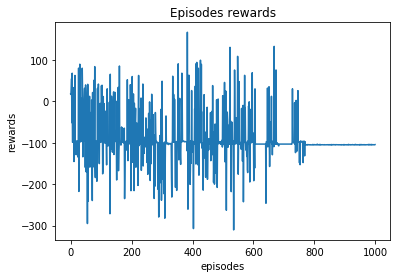

In [41]:
plt.plot(episode_results, label='x')
plt.title('Episodes rewards')
plt.ylabel('rewards') 
plt.xlabel('episodes') 
_ = plt.ylim()  

Mean rewards over the last 10 episodes

In [57]:
print(f'Mean: {np.mean(episode_results[:-10])}')

Mean: -91.82844741419954


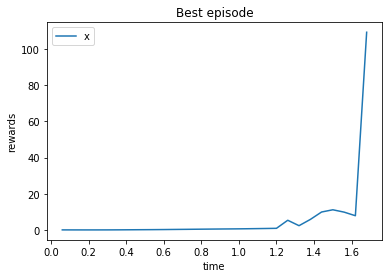

In [33]:
plt.plot(result_plot['time'], result_plot['rewards'], label='x')
plt.legend()
plt.title('Best episode')
plt.ylabel('rewards') 
plt.xlabel('time') 
_ = plt.ylim() 

## Visualization
Best agent performance

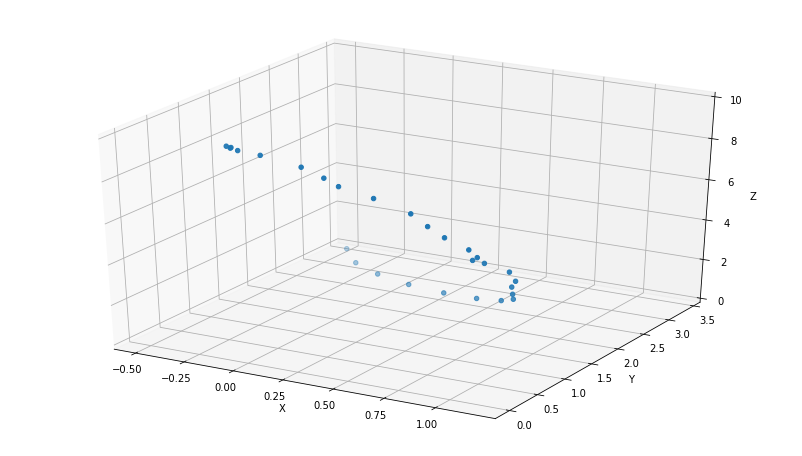

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(result_plot['x'], result_plot['y'], result_plot['z'])
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
ax.set_zlim(0, init_pose[2])

plt.show()

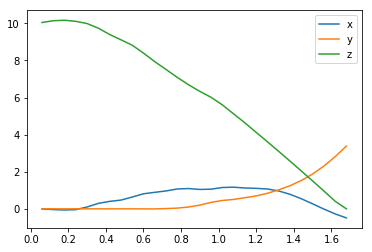

In [35]:
plt.plot(result_plot['time'], result_plot['x'], label='x')
plt.plot(result_plot['time'], result_plot['y'], label='y')
plt.plot(result_plot['time'], result_plot['z'], label='z')
plt.legend()
_ = plt.ylim()

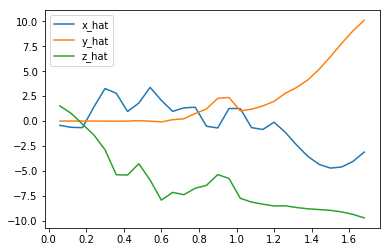

In [36]:
plt.plot(result_plot['time'], result_plot['x_velocity'], label='x_hat')
plt.plot(result_plot['time'], result_plot['y_velocity'], label='y_hat')
plt.plot(result_plot['time'], result_plot['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

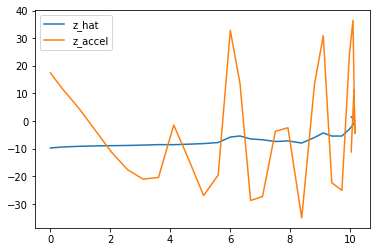

In [37]:
plt.plot(result_plot['z'], result_plot['z_velocity'], label='z_hat')
plt.plot(result_plot['z'], result_plot['x_accel'], label='z_accel')
plt.legend()
_ = plt.ylim()

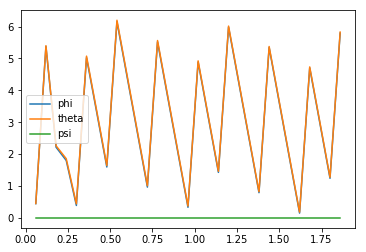

In [38]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

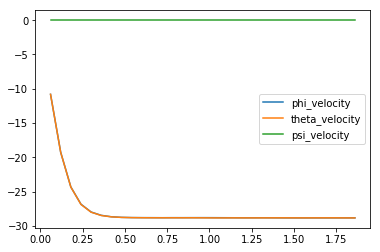

In [39]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

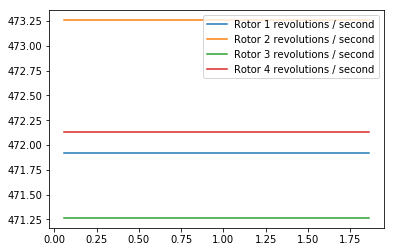

In [40]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I decided to teach the agent how to land the goal is to land softly from some specified height or the default value (0,0,10), the first step it was to define how to increase the reward return as the agent flys towards the goal which is the ground in this specific task, but at the same time it needs to move along a straight line down, so I added a negative terminal if the agent moves to the side over a threshold that returns a high negative reward, the same happens if for some reason the agent goes up in that case we just end the episode and return a high negative reward.
If it's not a terminal stage we keep the returned reward between -1 and 1 until the agent is in the touching surface height which is the value set to train the agent to decrease the acceleration in Z axes when close to the ground to avoid damage the sctructure of the drone.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you? <br>
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc. <br>
**Answer**: <br>
 In the beginning I din't realize this was a continious action space problem, so I started the projeto with the Deep Q Network” (DQN) algorithm which is a great algorithm that solves problems with high-dimensional observation spaces, however it can only handle discrete and low-dimensional action spaces, so later on I switched to the DDPG algorithm a algorithm based on the deterministic policy gradient that can operate over continuous action spaces. I ended up with the hyperparameters of gamma: 0.9 (reward discount), tau: 0.01 (for soft upd), buffer_size: 100000, batch_size: 64, lr: 0.001 (learning rate). I used Dense Neural Network the layers are fully connected by the neurons in a network layer, each neuron in a layer receives an input from all the neurons present in the previous layer. The mode was created with 3 layers with our first layer containing 32 neurons and the sigmoid as the last layer activation function.
 
 Referênces: <br>
 [1] https://arxiv.org/pdf/1509.06461.pdf <br>
 [2] https://heartbeat.fritz.ai/classification-with-tensorflow-and-dense-neural-networks-8299327a818a


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: <br>
The agent performed well despite being a difficult task to learn even more with a relatively small number of episodes (1000) where the reward per episode stabilized around the last 200 episodes. The average reward for the last 10 episodes was -91.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: <br>

The project was quite challenging from the choice of the appropriate algorithm until the results visualization, initially the understanding of the DDPG algorithm used is not trivial then the biggest challenge was to simplify the reward function capable of learning the task in a satisfactory way, since we have a multidimensional continuous action space problem. In general, it was a great experience that forced me to look for several sources of information besides the one available in the course.